# PROJECT 3: COLLABORATIVE FILTERING

## PART 1

In [1]:
# Mount on drive if using colab
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/ECE219/Project_3

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1h2lc5bgLi87LcqxNkMp5cx4RJZ_JRvAc/ECE219/Project_3


In [2]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Movie ratings
dataset = pd.read_csv('ml-latest-small/movies.csv')
ratings_dataset_df = pd.read_csv('ml-latest-small/ratings.csv') # /content/drive/MyDrive/ECE219/Project_3/
print(ratings_dataset_df.shape)

(100836, 4)


In [ ]:
ratings_dataset_df.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [ ]:
ratings_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


### Question 1: Spasity of a matrix

In [ ]:
available_ratings = len(ratings_dataset_df)
users_1 = len(set(ratings_dataset_df['userId'])) #number of users
movies_1 = len(set(ratings_dataset_df['movieId'])) #number of movies
possible_ratings = users_1 * movies_1

In [ ]:
Sparsity = available_ratings/possible_ratings
print(Sparsity)

0.016999683055613623


### Question 2: Histogram of movie ratings

In [ ]:
# Frequency of ratings vs number of entries
print(set(ratings_dataset_df['rating']))
count_ratings = np.zeros(len(set(ratings_dataset_df['rating'])))
print(len(count_ratings))

{0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 4.5, 3.5, 2.5, 1.5}
10


In [ ]:
#extracting the unique number of ratings
unique, counts = np.unique(ratings_dataset_df['rating'], return_counts=True)
#putting them in a dictionary
dict_a = dict(zip(unique, counts))
Ratings_values = unique
Frequency_ratings = counts
print(Ratings_values)
print(Frequency_ratings)

[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
[ 1370  2811  1791  7551  5550 20047 13136 26818  8551 13211]


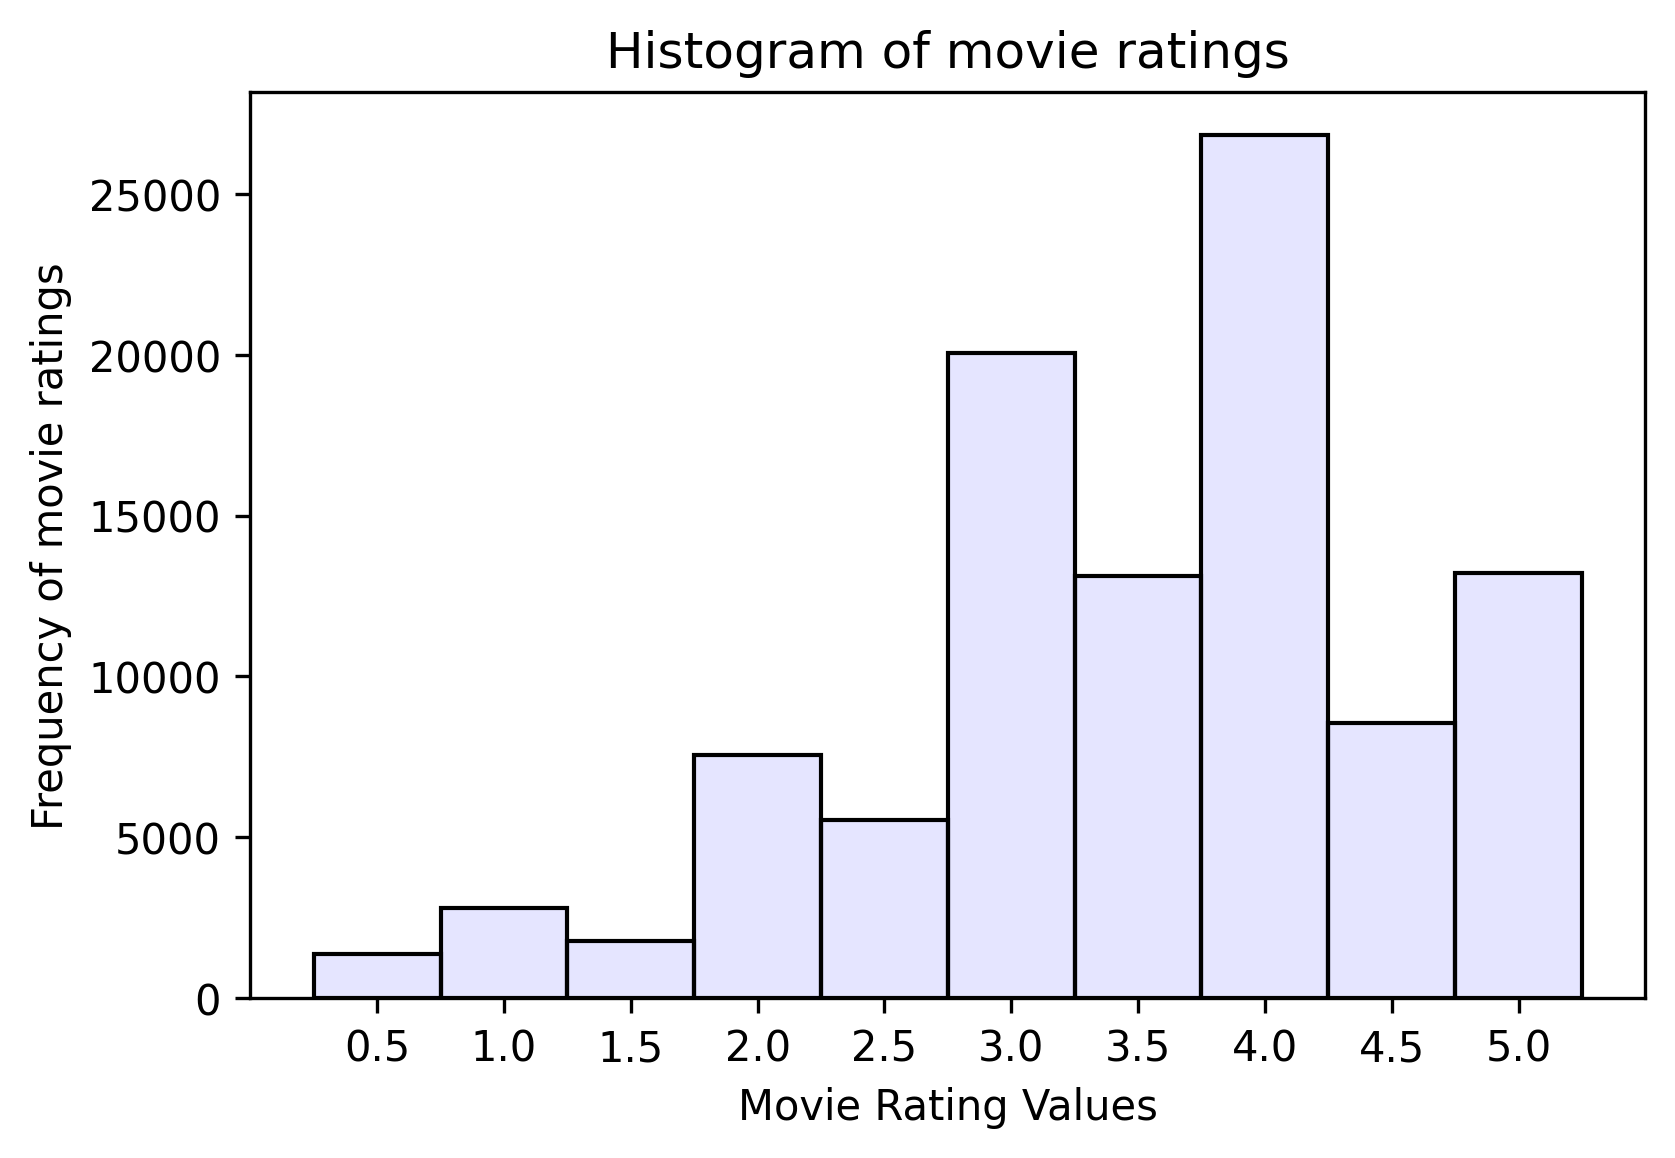

In [ ]:
num_bins = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5]

plt.figure(dpi=300)
plt.hist(ratings_dataset_df['rating'], num_bins, edgecolor='black', facecolor=np.array([0,0,1,0.1]), align='left')
plt.xticks(ticks=np.arange(1,11)/2)
plt.title('Histogram of movie ratings')
plt.xlabel('Movie Rating Values')
plt.ylabel('Frequency of movie ratings')
plt.show()

The histogram shows that this dataset contains movies popular with the audience as it majorly contains ratings ranging from 3-5 with 3-4 having a major share in that and more movies received ratings in the range of 4-5 than in 0-3

### Question 3: Movies rated by the user in decreasing order of ratings received by movies

In [ ]:
import operator
#extracting the unique number of movies
unique_3, counts_3 = np.unique(ratings_dataset_df['movieId'], return_counts=True)
#putting them in a dictionary
dict_3 = dict(zip(unique_3, counts_3))
#sorting them in descending order
dict_3 = sorted(dict_3.items(), key=operator.itemgetter(1), reverse=True)
dict_3 = np.array(dict_3)
movie_idx = dict_3[:,0]
movie_idx_ratings = dict_3[:,1]
len_3 = len(movie_idx_ratings)
print(len(unique_3))

9724


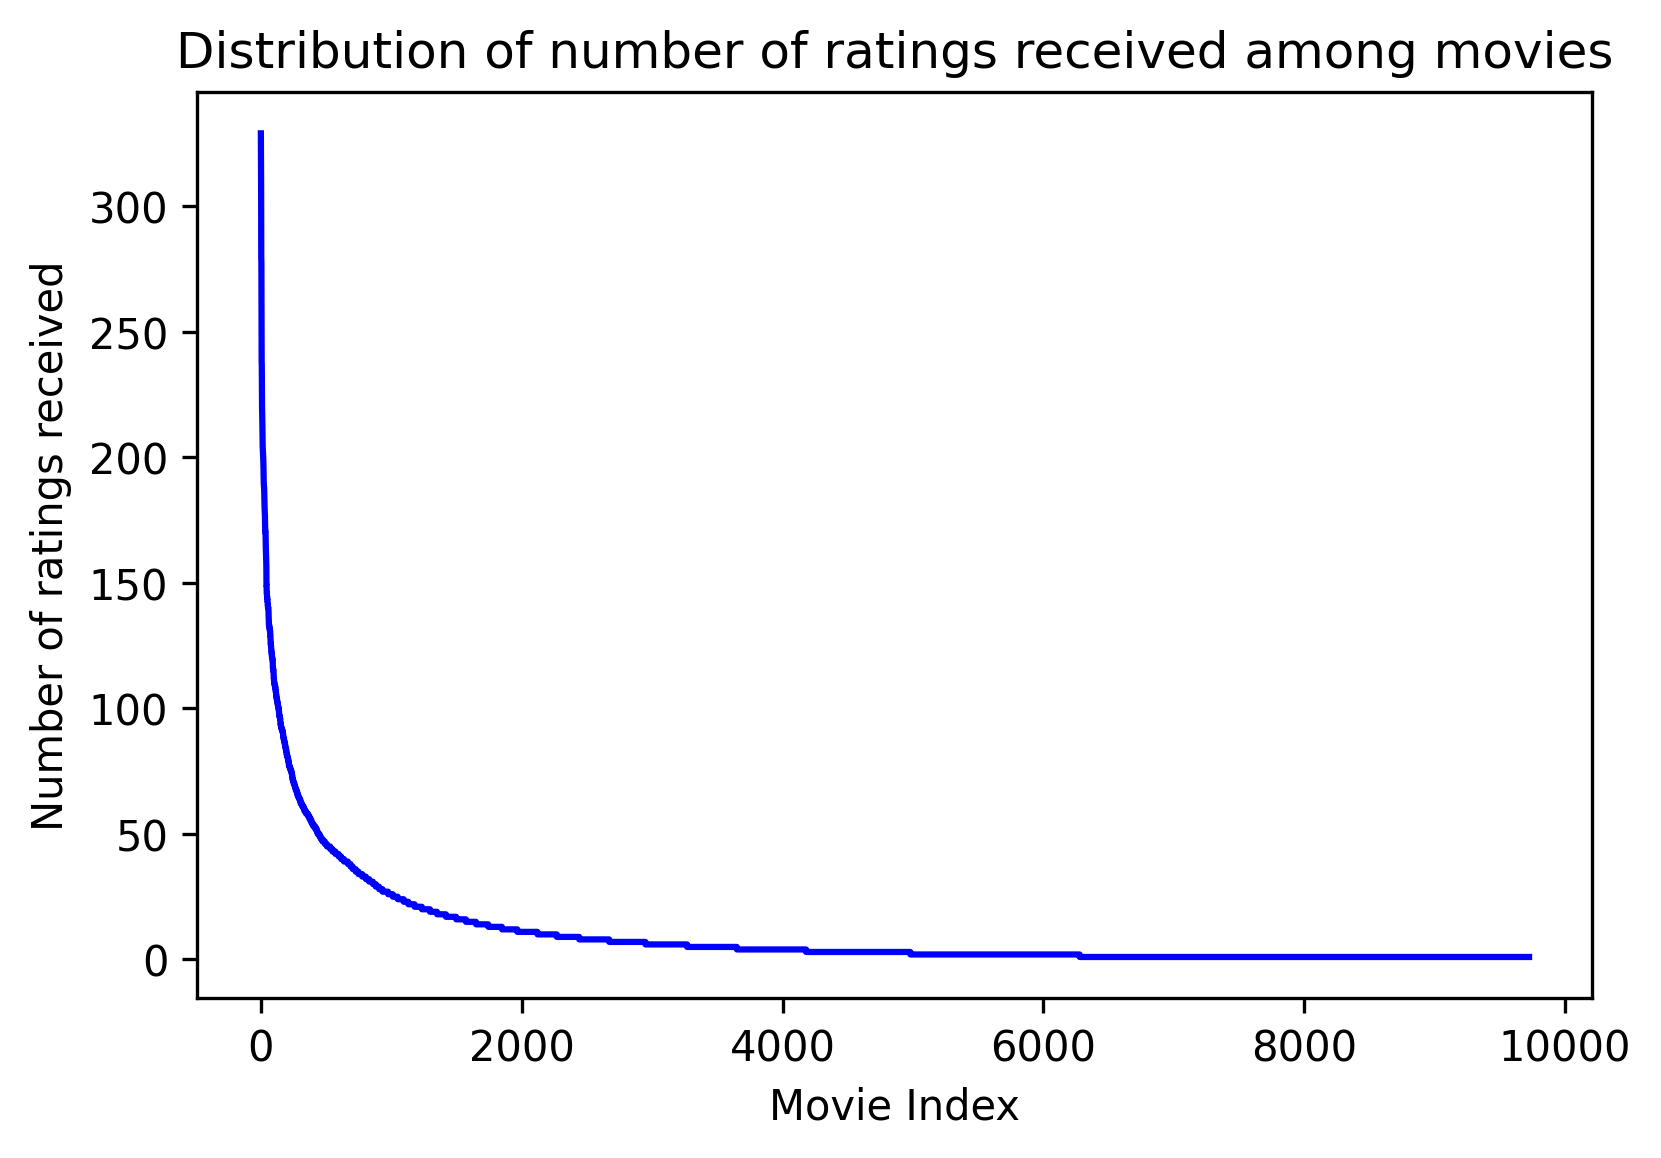

In [ ]:
plt.figure(dpi=300)
plt.plot(np.arange(len_3), movie_idx_ratings, c='b')
plt.ylabel('Number of ratings received')
plt.xlabel('Movie Index')
plt.title('Distribution of number of ratings received among movies')
plt.show()

### Question 4: Movies rated by the user in decreasing order of ratings given by users

In [ ]:
#extracting the unique number of users
unique_4, counts_4 = np.unique(ratings_dataset_df['userId'], return_counts=True)
#putting them in a dictionary
dict_4 = dict(zip(unique_4, counts_4))
#sorting them in a descending order
dict_4 = sorted(dict_4.items(), key=operator.itemgetter(1), reverse=True)
dict_4 = np.array(dict_4)
Users = dict_4[:,0]
Movies_rated = dict_4[:,1]
len_4 = len(unique_4)
print(len(unique_4))

610


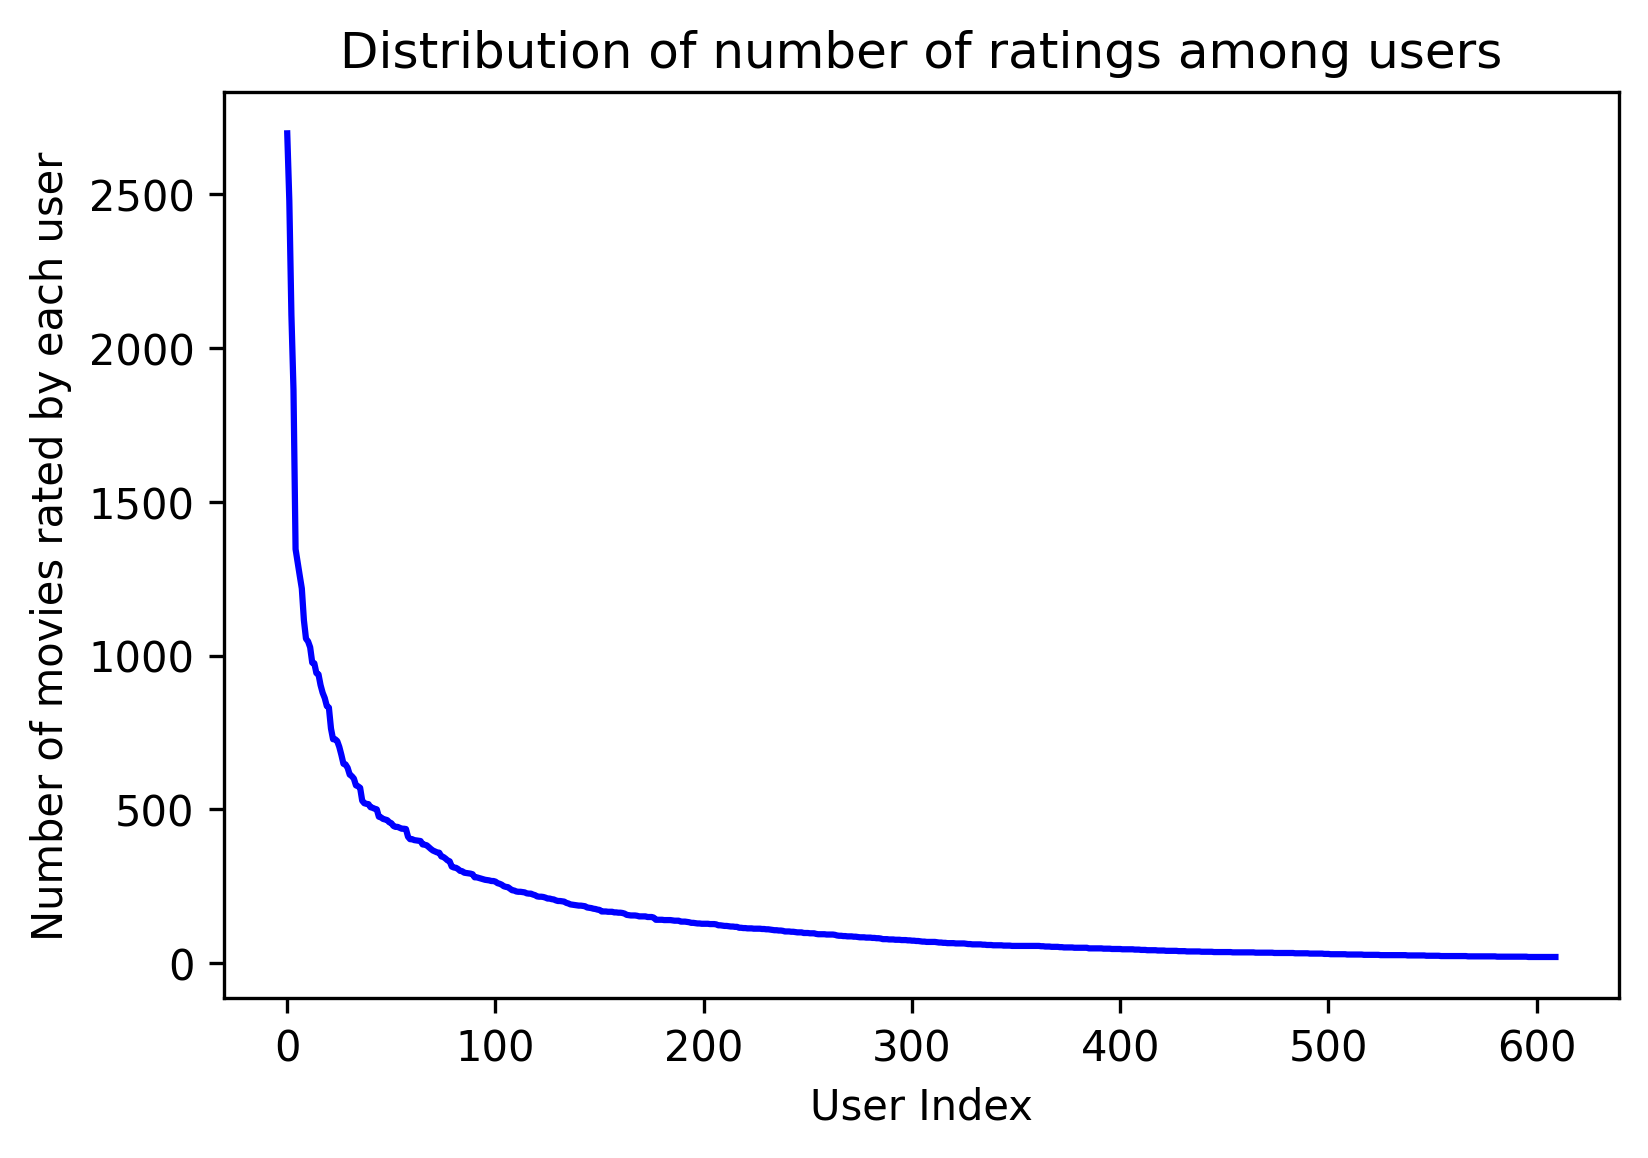

In [ ]:
plt.figure(dpi=300)
plt.plot(np.arange(len_4), Movies_rated, c='b')
plt.ylabel('Number of movies rated by each user')
plt.xlabel('User Index')
plt.title('Distribution of number of ratings among users')
plt.show()

### Question 5: Implication of distribution in Qs. 3

#### Answer:
The implication of this graph is that it shows us which movies received the highest ratings. Consequently, it will make an individual user pick movies that have received the maximum ratings, thereby letting them make an informed choice

### Question 6: Variance of movie ratings vs the movie ids




In [4]:
#extracting the unique number of movies
unique_5, counts_5 = np.unique(ratings_dataset_df.iloc[:,1], return_counts=True)
movie_ids = np.array(unique_5)
movie_ids

array([     1,      2,      3, ..., 193585, 193587, 193609])

In [5]:
len(movie_ids)

9724

In [6]:
list_5 = [] #list of all movies
list_var = [] #list of all movies with at least 5 ratings and a variance of at least 2
list_pop = [] #list of all movies with more than 2 ratings
list_unpop = [] #list of all movies with at most 2 ratings
dataset_ratings_array = np.array(ratings_dataset_df)
for i in np.arange(9724):
    list_tmp = dataset_ratings_array[:,2][dataset_ratings_array[:,1] == movie_ids[i]]
    var_val = np.var(list_tmp)
    list_5.append(var_val)
    if len(list_tmp)>2:
        list_pop.append(movie_ids[i])
    else:
        list_unpop.append(movie_ids[i])
    if len(list_tmp)>=5 and var_val>=2:
        list_var.append(movie_ids[i])

In [ ]:
print(len(list_pop))
print(len(list_unpop))
print(len(list_var))

4980
4744
40


In [ ]:
print(len(list_5))

9724


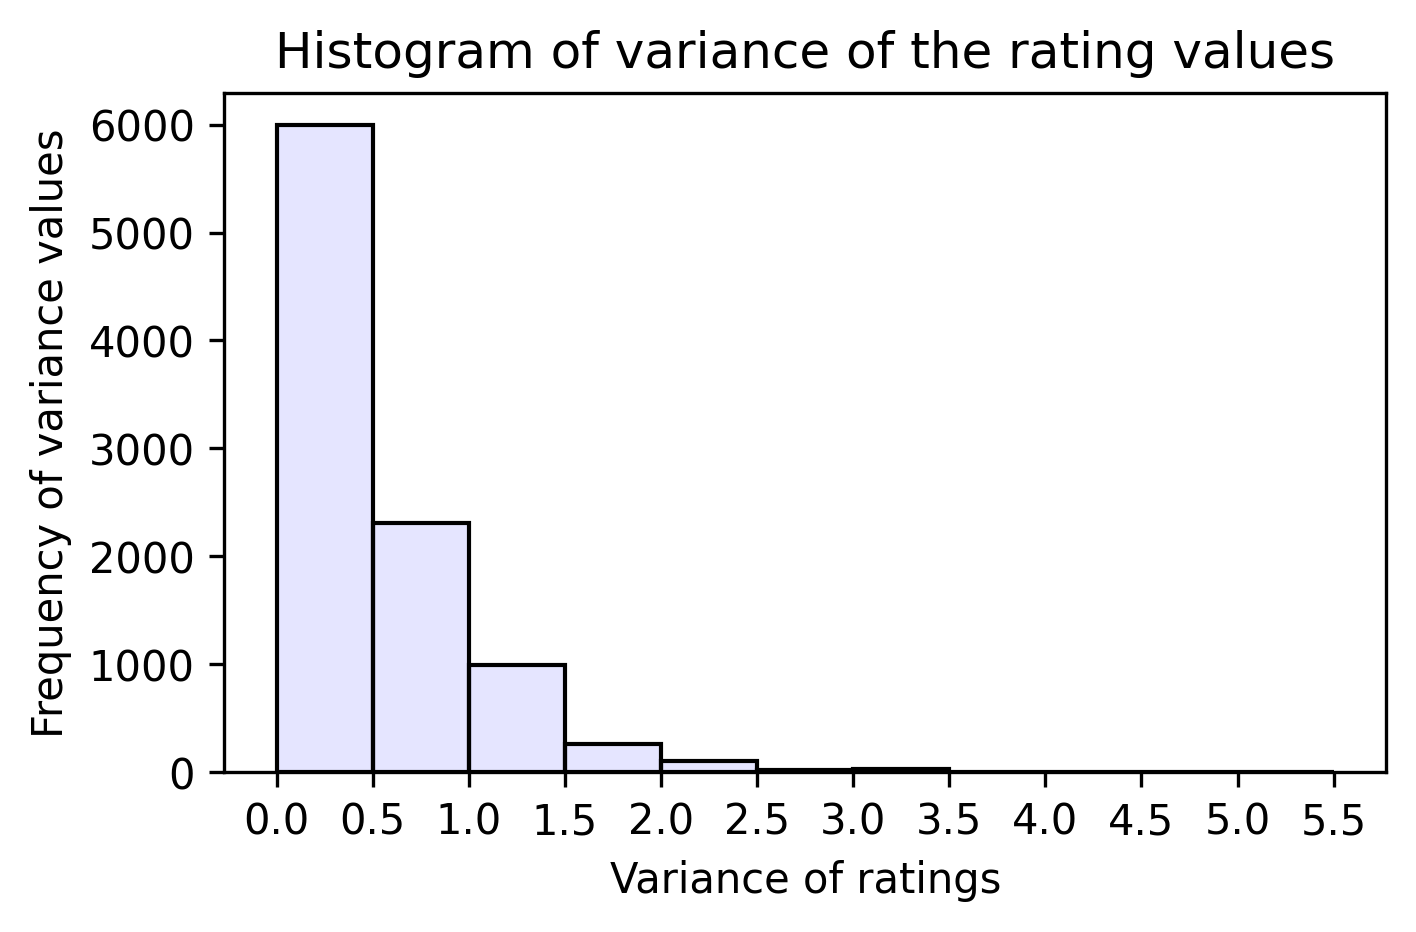

In [ ]:
plt.figure(figsize=(5,3), dpi=300)
plt.hist(list_5, np.linspace(0,5.5,12), edgecolor='black', facecolor=np.array([0,0,1,0.1]))
plt.xticks(ticks=np.linspace(0,5.5,12))
plt.xlabel('Variance of ratings')
plt.ylabel('Frequency of variance values')
plt.title('Histogram of variance of the rating values')
plt.show()

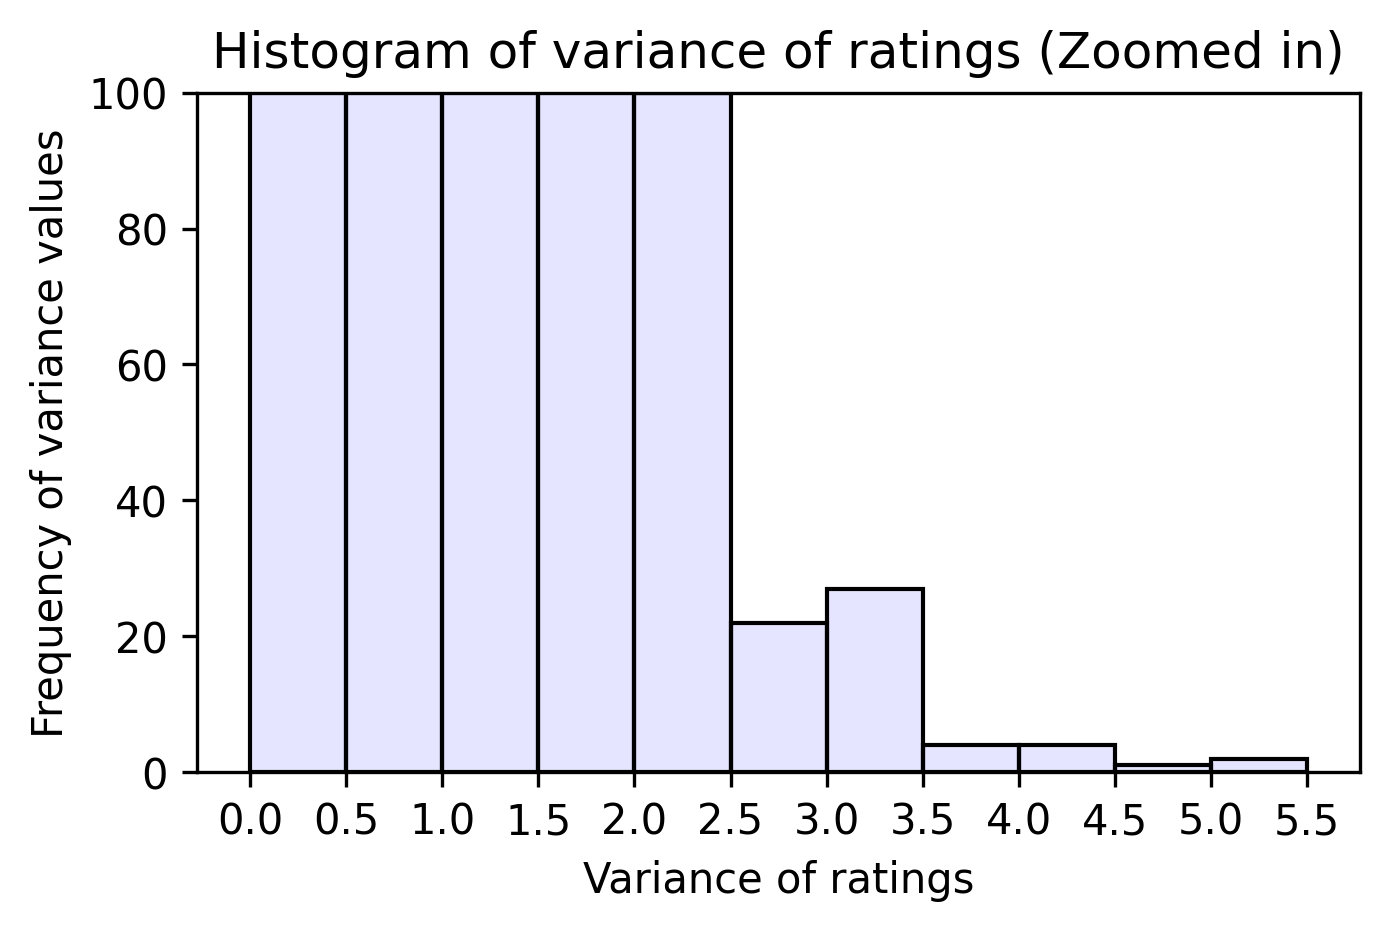

In [ ]:
# Zoomed in plot
plt.figure(figsize=(5,3), dpi=300)
plt.hist(list_5, np.linspace(0,5.5,12), edgecolor='black', facecolor=np.array([0,0,1,0.1]))
plt.xticks(ticks=np.linspace(0,5.5,12))
plt.ylim([0,100])
plt.xlabel('Variance of ratings')
plt.ylabel('Frequency of variance values')
plt.title('Histogram of variance of ratings (Zoomed in)')
plt.show()

### Question 10

In [7]:
#installing surprise package
!pip install surprise

     |████████████████████████████████| 11.8MB 22.9MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617561 sha256=18dbd07e83f1a69073774e6770b8f22825d3db421542833a552a9e463d557c03
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [8]:
from collections import defaultdict

from surprise import Dataset, Reader, accuracy
from surprise.prediction_algorithms.knns import KNNBasic, KNNWithMeans
from surprise.model_selection import train_test_split, KFold
from surprise.model_selection.validation import cross_validate

from sklearn.metrics import roc_curve, RocCurveDisplay, auc

In [10]:
#plot function to plot graphs
def plot_k(data, label, k_max, dpi=300):
    fig = plt.figure(figsize=(15, 5), dpi=dpi)
    ax = fig.add_subplot(111)
    ax.plot(range(len(data)), data)
    ax.set_ylabel(label)
    ax.set_xlabel('$k$')
    ax.set_xticks(range(len(data)))
    ax.set_xticklabels(range(2, k_max+1, 2))
    plt.show()

In [11]:
from surprise import SVD, NMF
#collaborative filter function that would be used for NNMF, MF and SVD
def collaborative_filtering(method, k_max, data, num_folds=10, sim_options={'name': 'pearson'}, trim=None):
    rmse = []
    mae = []

    for k in range(2, k_max+1, 2):
        kf = KFold(num_folds)
        #K-Nearest Neighbours
        if method == 'KNN':
            algo = KNNWithMeans(k, sim_options=sim_options, verbose=False)
        #Non-Negative Matrix Factorization
        if method =='NMF':
            algo = NMF(n_factors = k)
        #Support Vector Decomposition
        if method =='SVD':
            algo = SVD(n_factors = k)
        kf_rmse = []
        kf_mae = []
        for train, test in kf.split(data):
            if trim is not None:
                test = filter(trim, test)
            algo.fit(train)
            predictions = algo.test(test)
            kf_rmse.append(accuracy.rmse(predictions, verbose=False))
            kf_mae.append(accuracy.mae(predictions, verbose=False))
        rmse.append(np.mean(kf_rmse))
        mae.append(np.mean(kf_mae))
        if k % 10 == 0:
            print(k)
    plot_k(mae, 'Mean Absolute Error', k_max)
    plot_k(rmse, 'Root Mean Square Error', k_max)
    print('min mae=', np.min(mae), 'at k=', np.argmin(mae)*2+2)
    print('min rmse=', np.min(rmse), 'at k=', np.argmin(rmse)*2+2)
    return mae, rmse


In [12]:
#sim options with rating scale
sim_options = {'name': 'pearson'}
reader = Reader(rating_scale=(0.5,5))
ratings_dataset = Dataset.load_from_df(ratings_dataset_df[['userId', 'movieId', 'rating']], reader=reader)

10
20
30
40
50
60
70
80
90
100


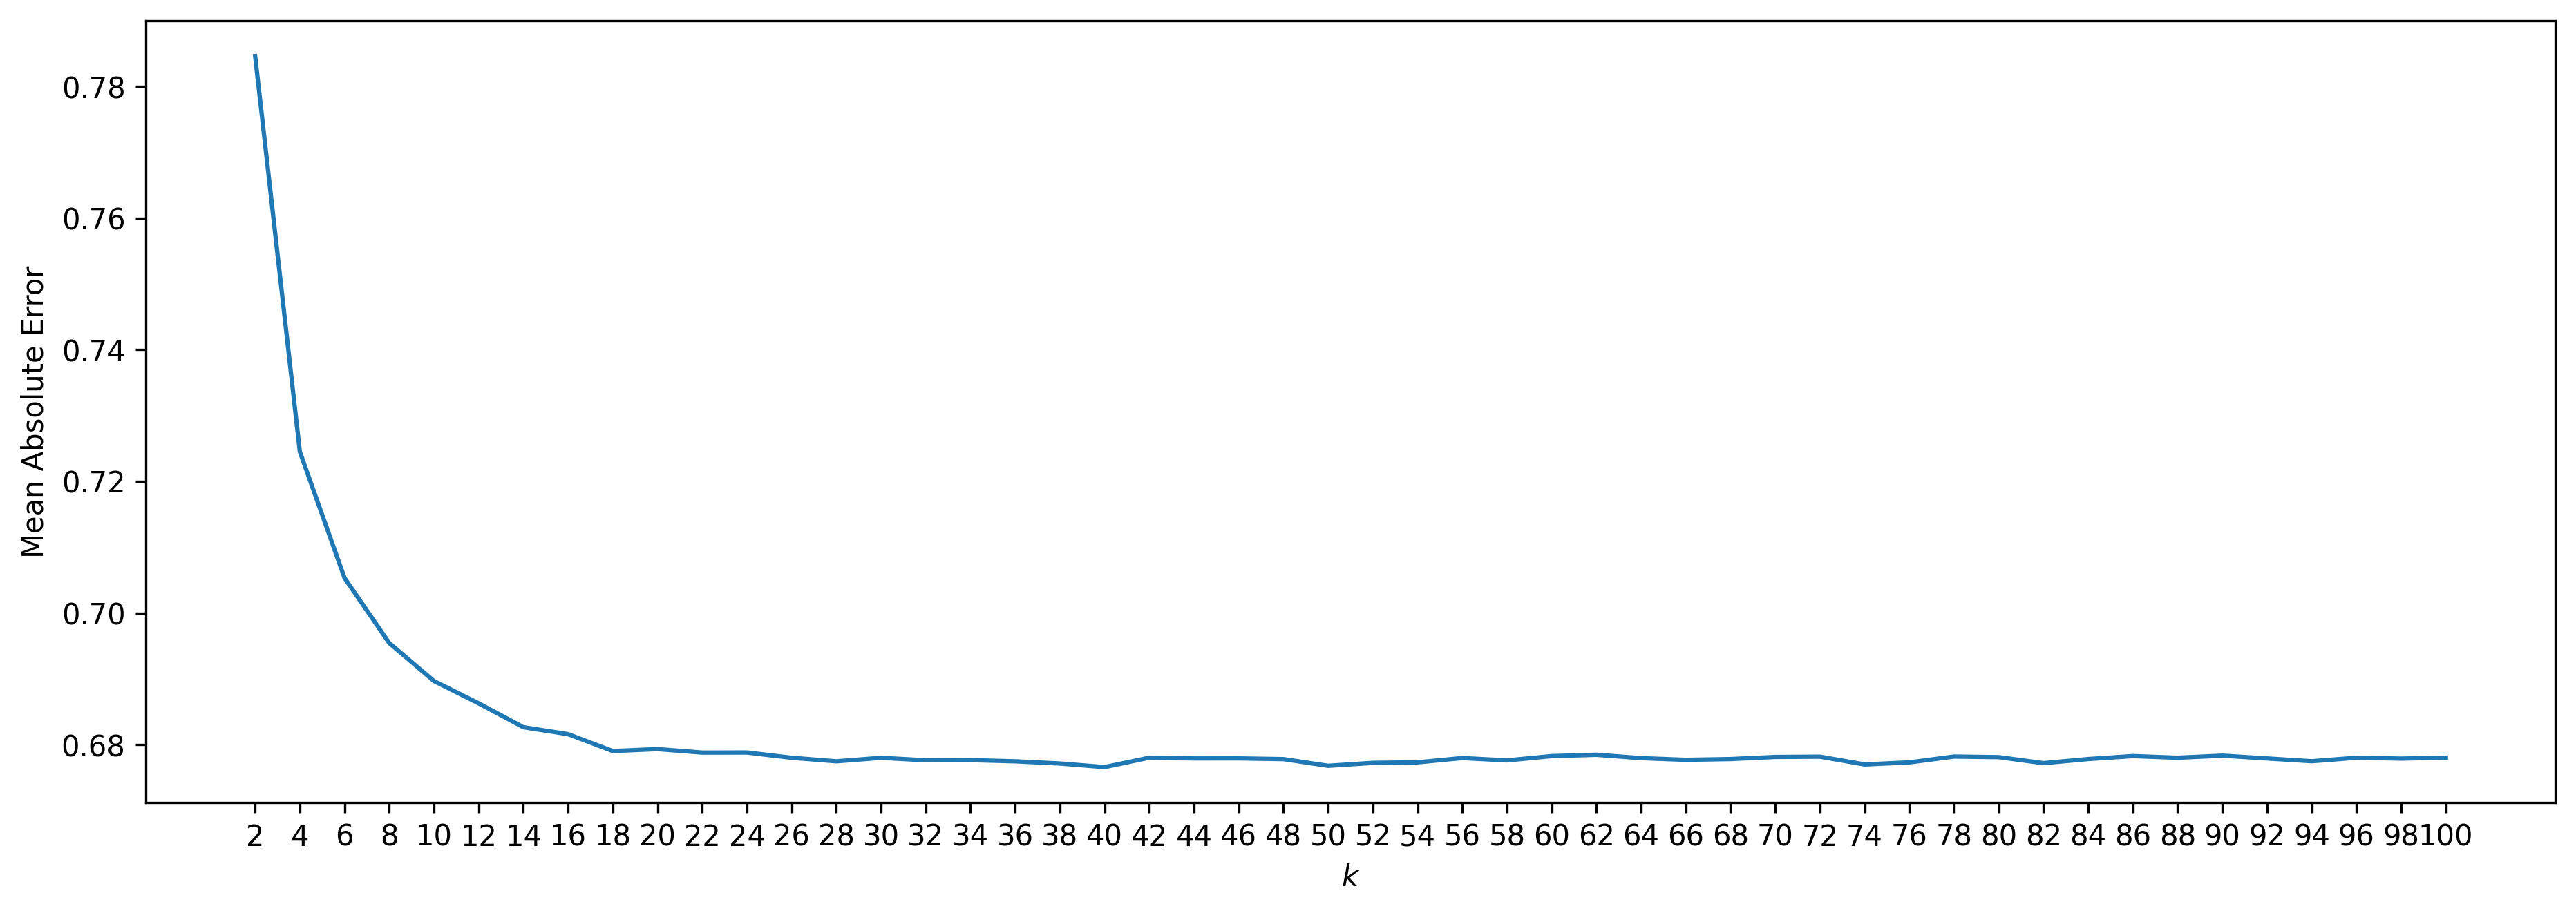

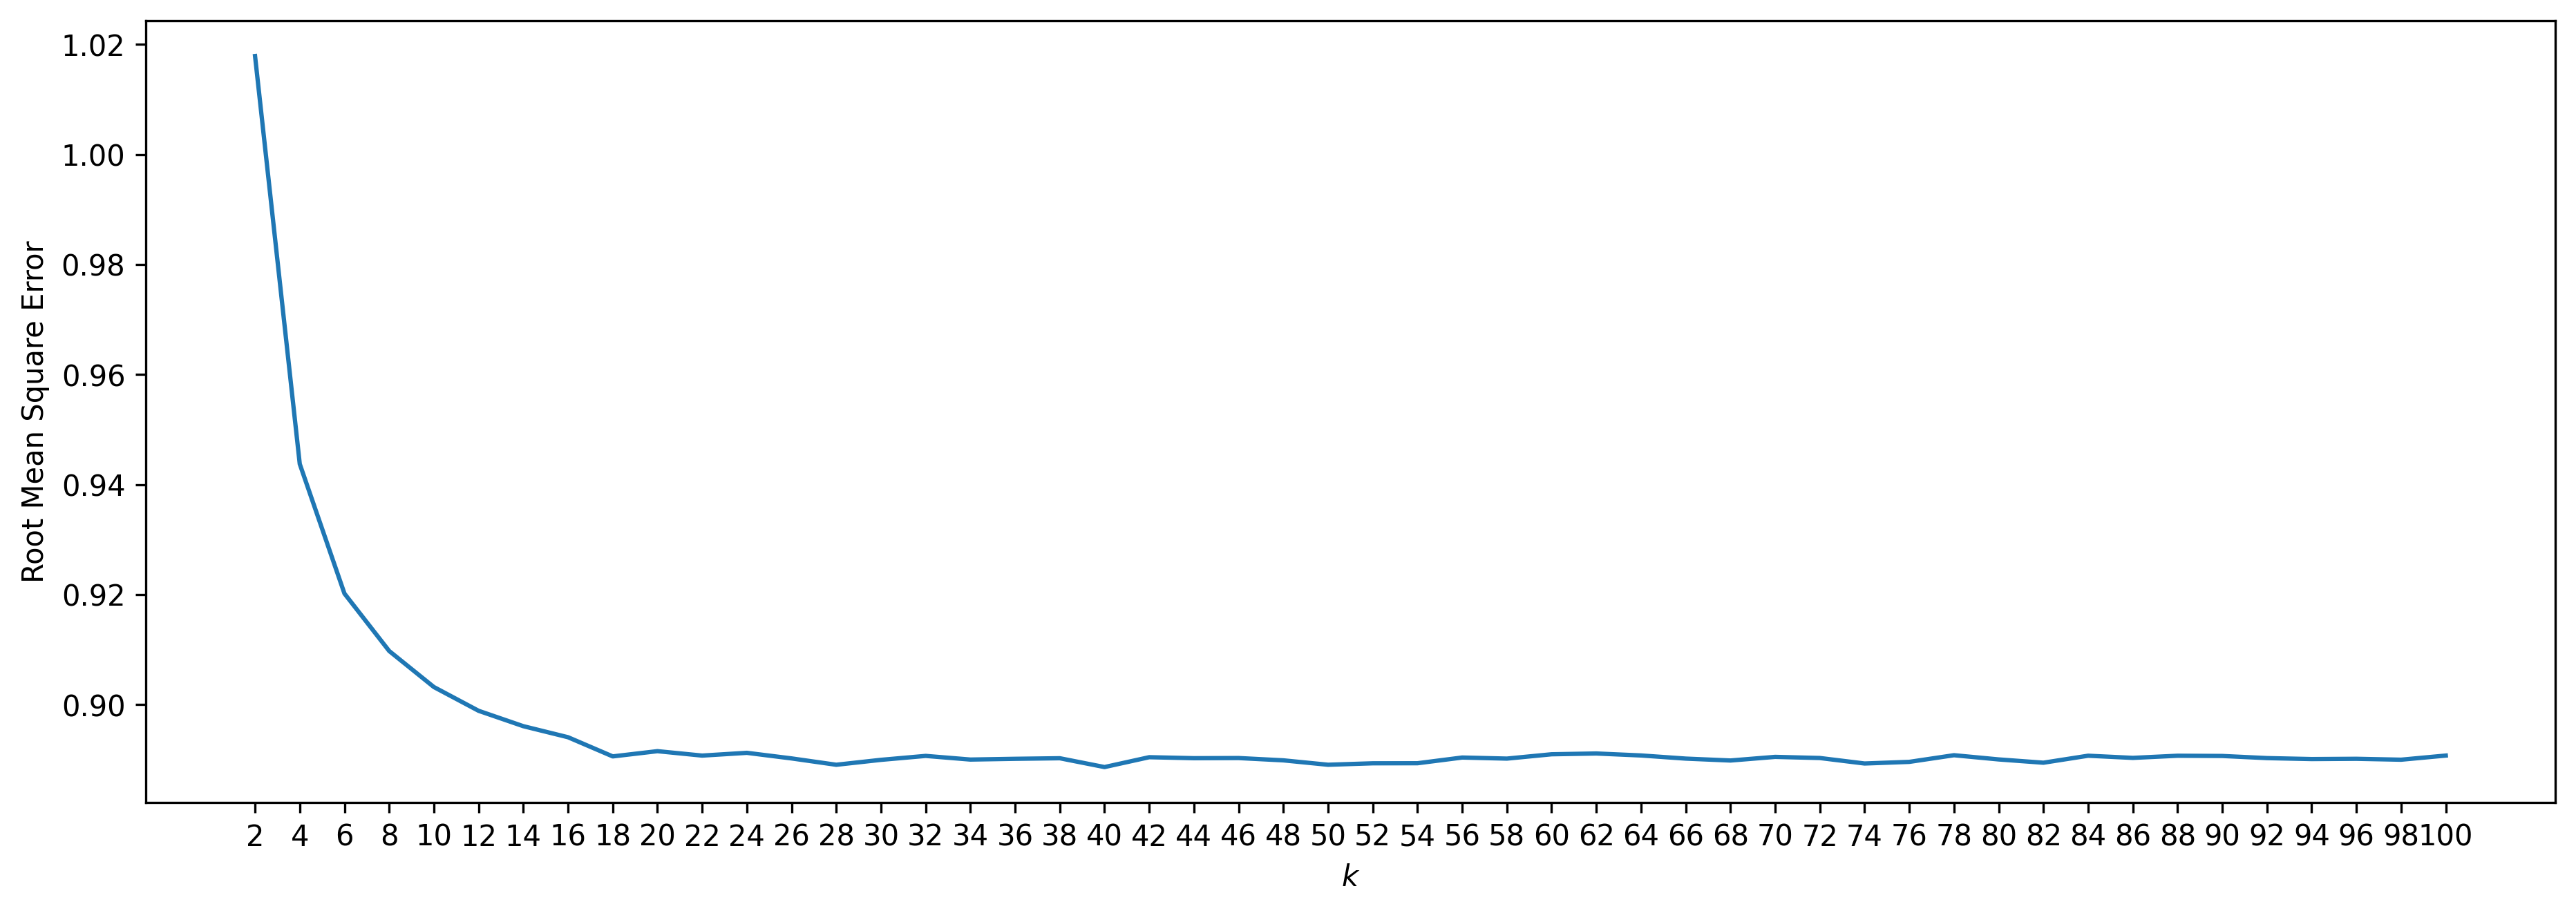

min mae= 0.676592281151619 at k= 40
min rmse= 0.8886435765111479 at k= 40


In [ ]:
#KNN on ratings dataset
mae, rmse = collaborative_filtering('KNN', 100, ratings_dataset)

### Question 11

Steady state behavior for MAE and RMSE was achieved at k= 20. The steady state values for MAE and RMSE are 0.746 and 0.967 respectively.

In [ ]:
#Minimum Values of MAE and RMSE
print(mae[9])
print(rmse[9])

0.679325147626006
0.8915336518314882


### Question 12

In [ ]:
#Popular trimming of ratings dataset
def popular(test):
    return True if test[1] in list_pop else False

10
20
30
40
50
60
70
80
90
100


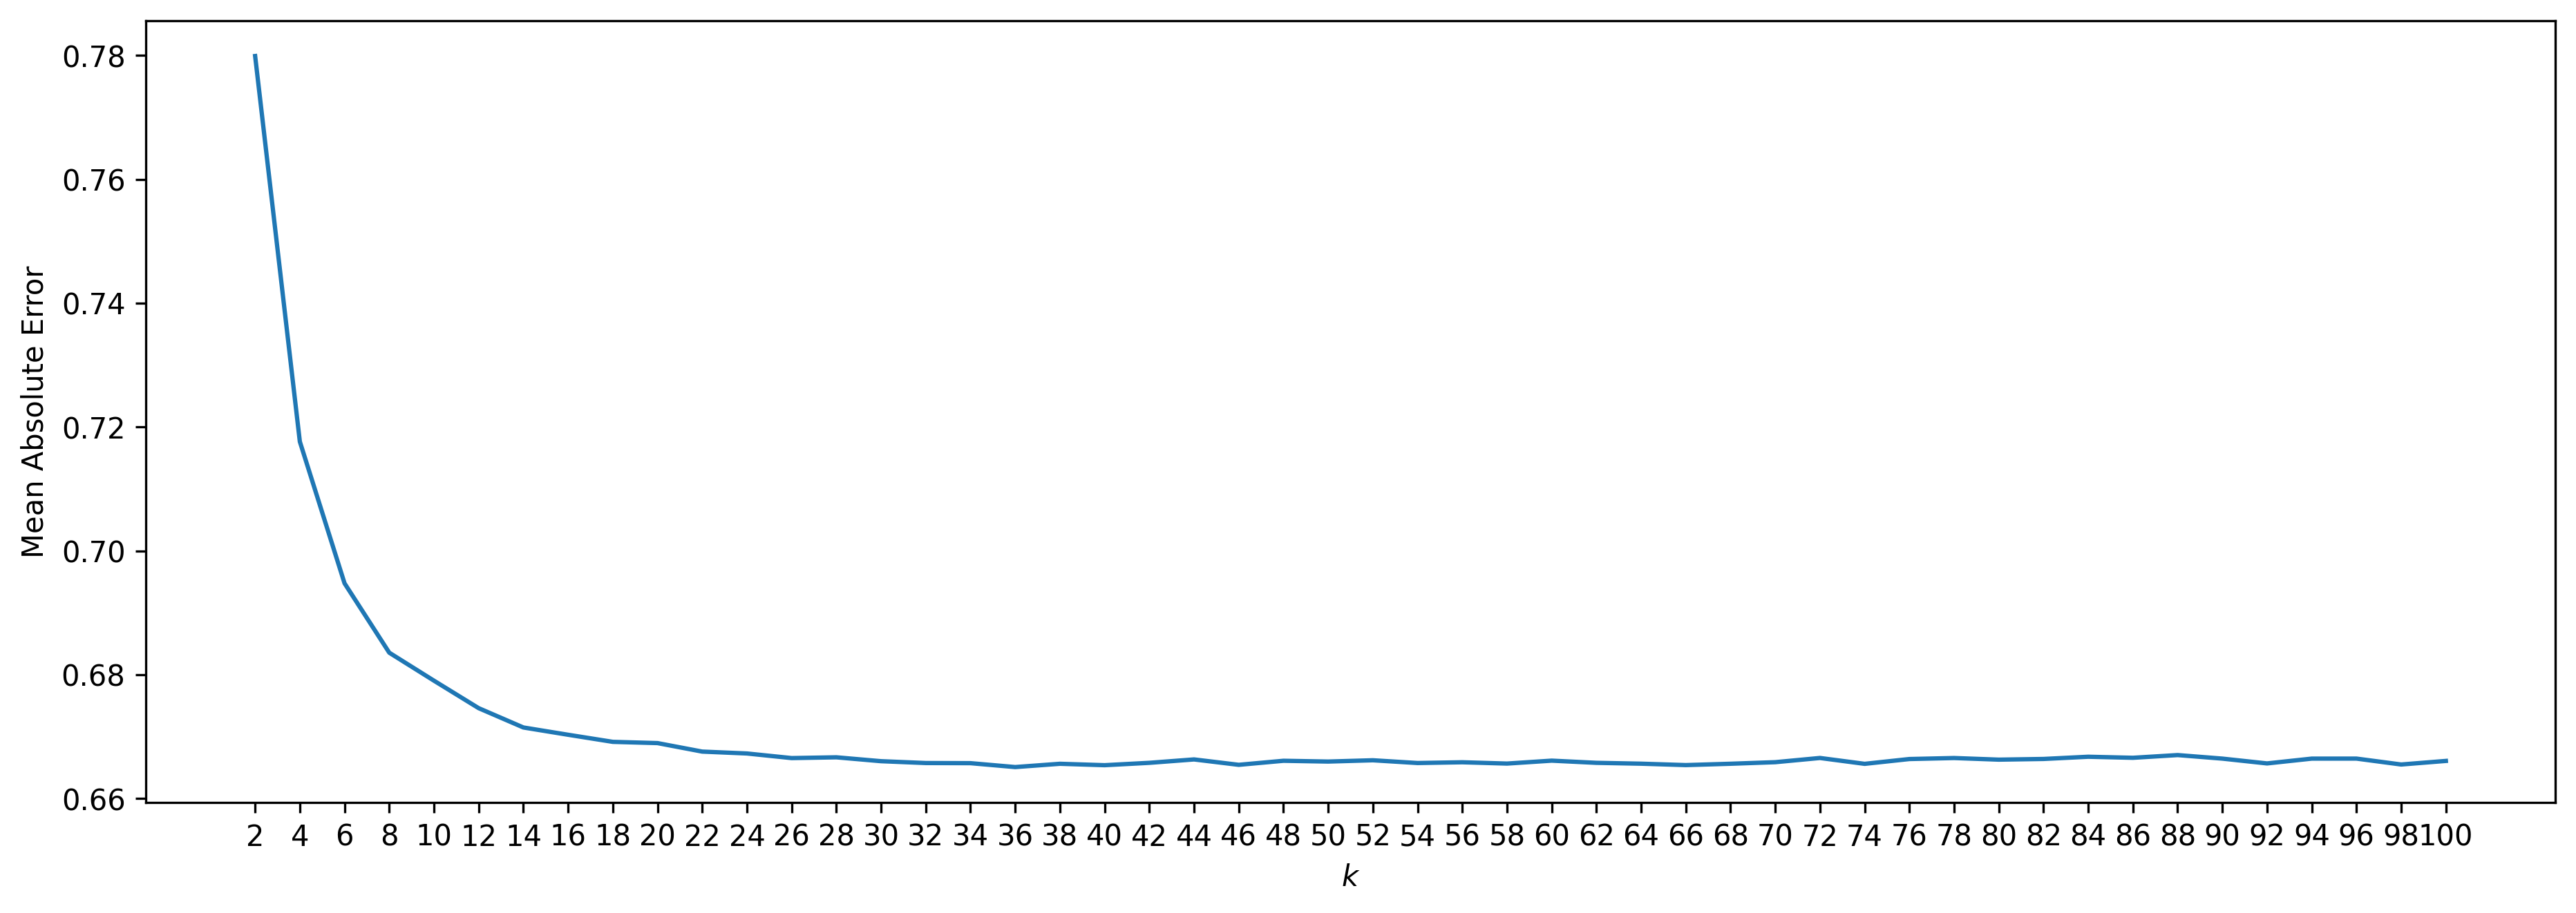

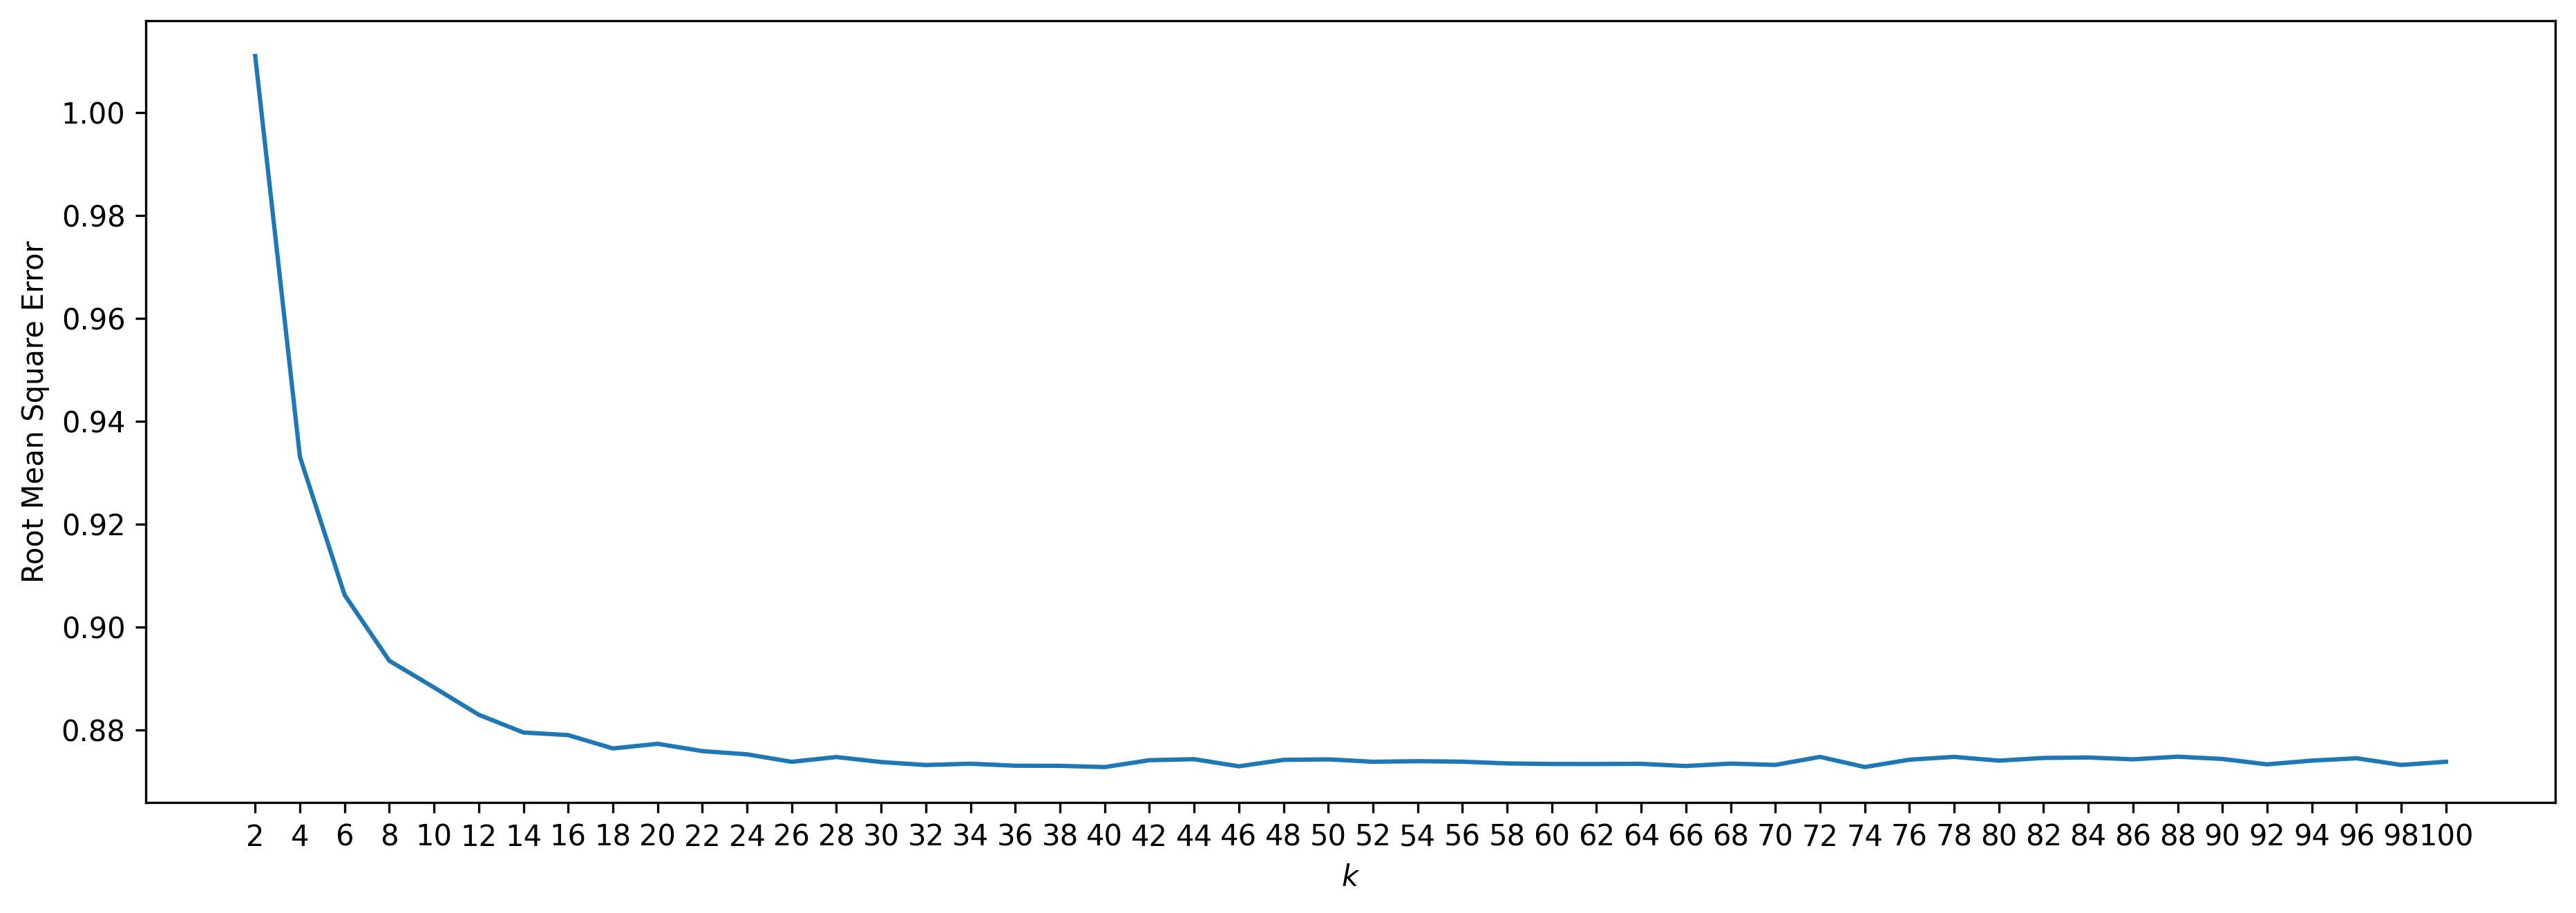

min mae= 0.665075753995117 at k= 36
min rmse= 0.8727392422564186 at k= 40


In [ ]:
#KNN on ratings dataset with popular trim
mae_pop, rmse_pop = collaborative_filtering('KNN', 100, ratings_dataset, trim=popular)

In [ ]:
#Minimum values of RMSE for popular dataset
print(min(rmse_pop))
print(np.argmin(rmse_pop)*2+2)

0.8727392422564186
40


### Question 13

In [16]:
#Unpopular trimming of ratings dataset
def unpopular(test):
    return True if test[1] in list_unpop else False

10
20
30
40
50
60
70
80
90
100


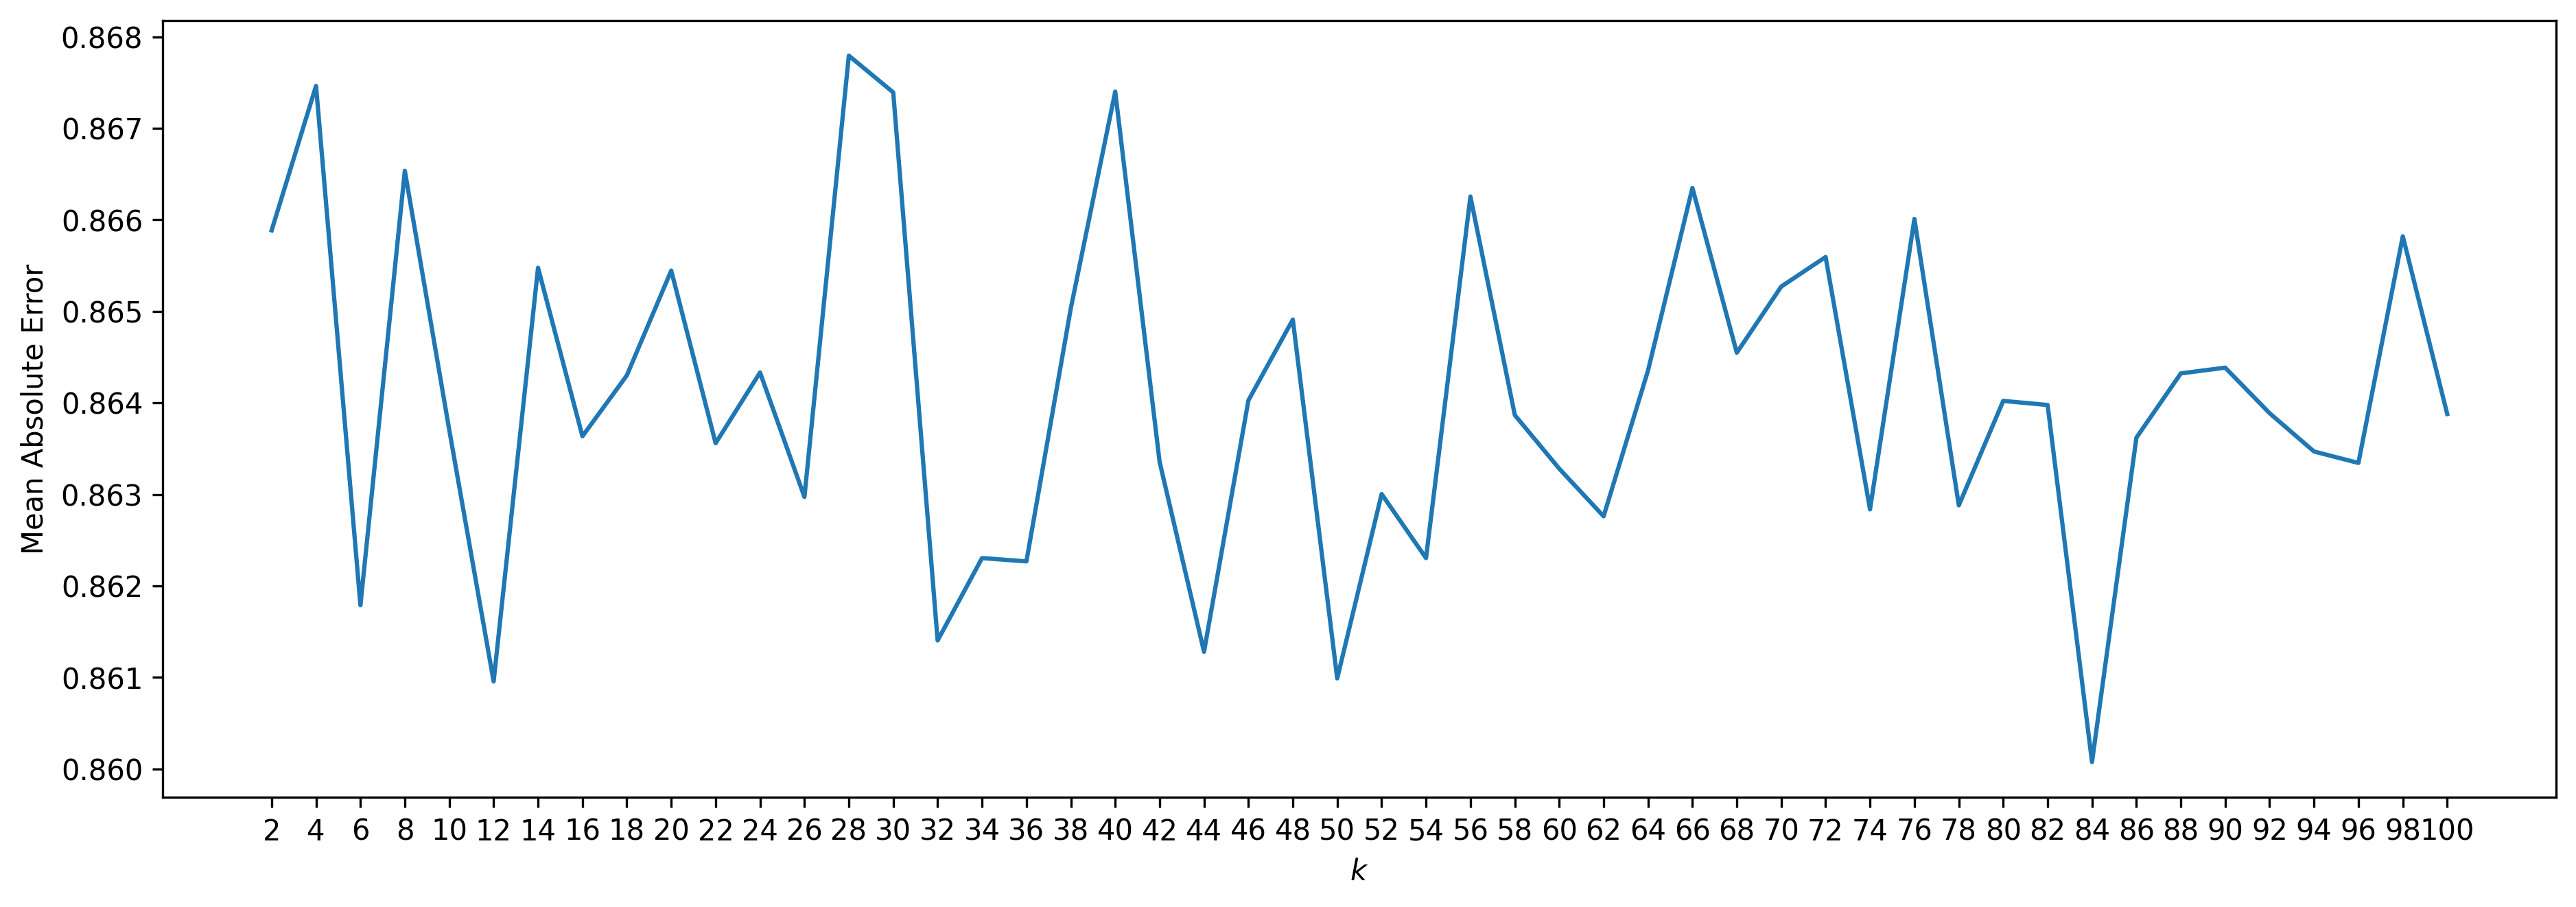

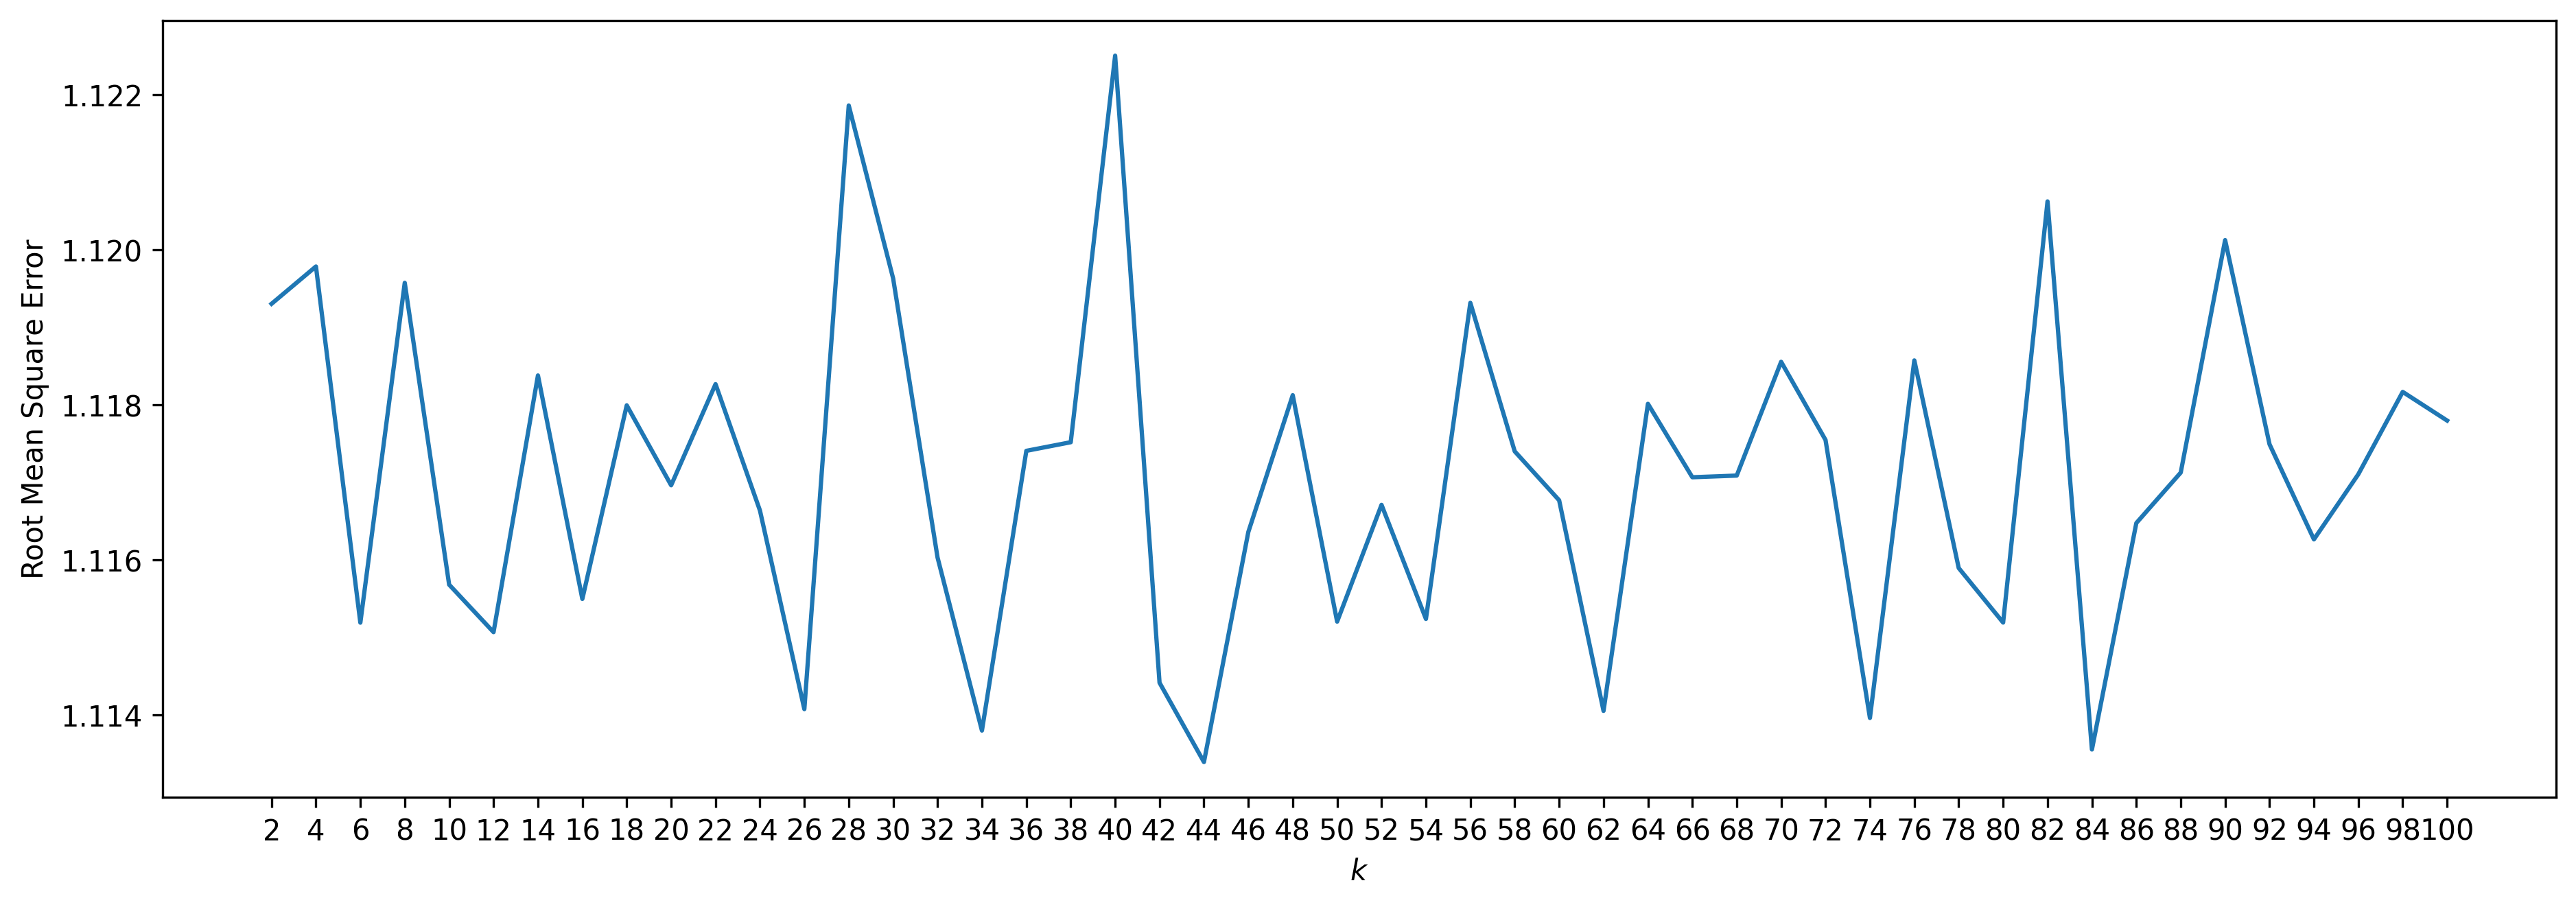

min mae= 0.8600749454242587 at k= 84
min rmse= 1.1133953922539601 at k= 44


In [ ]:
#KNN on ratings dataset with unpopular trim
mae_unpop, rmse_unpop = collaborative_filtering('KNN', 100, ratings_dataset, trim=unpopular)

In [ ]:
#Minimum RMSE values for ratings dataset with unpopular trim
print(min(rmse_unpop))
print(np.argmin(rmse_unpop)*2+2)

1.1133953922539601
44


### Question 14

In [17]:
#High-Variance trimming of ratings dataset
def high_variance(test):
    return True if test[1] in list_var else False

10
20
30
40
50
60
70
80
90
100


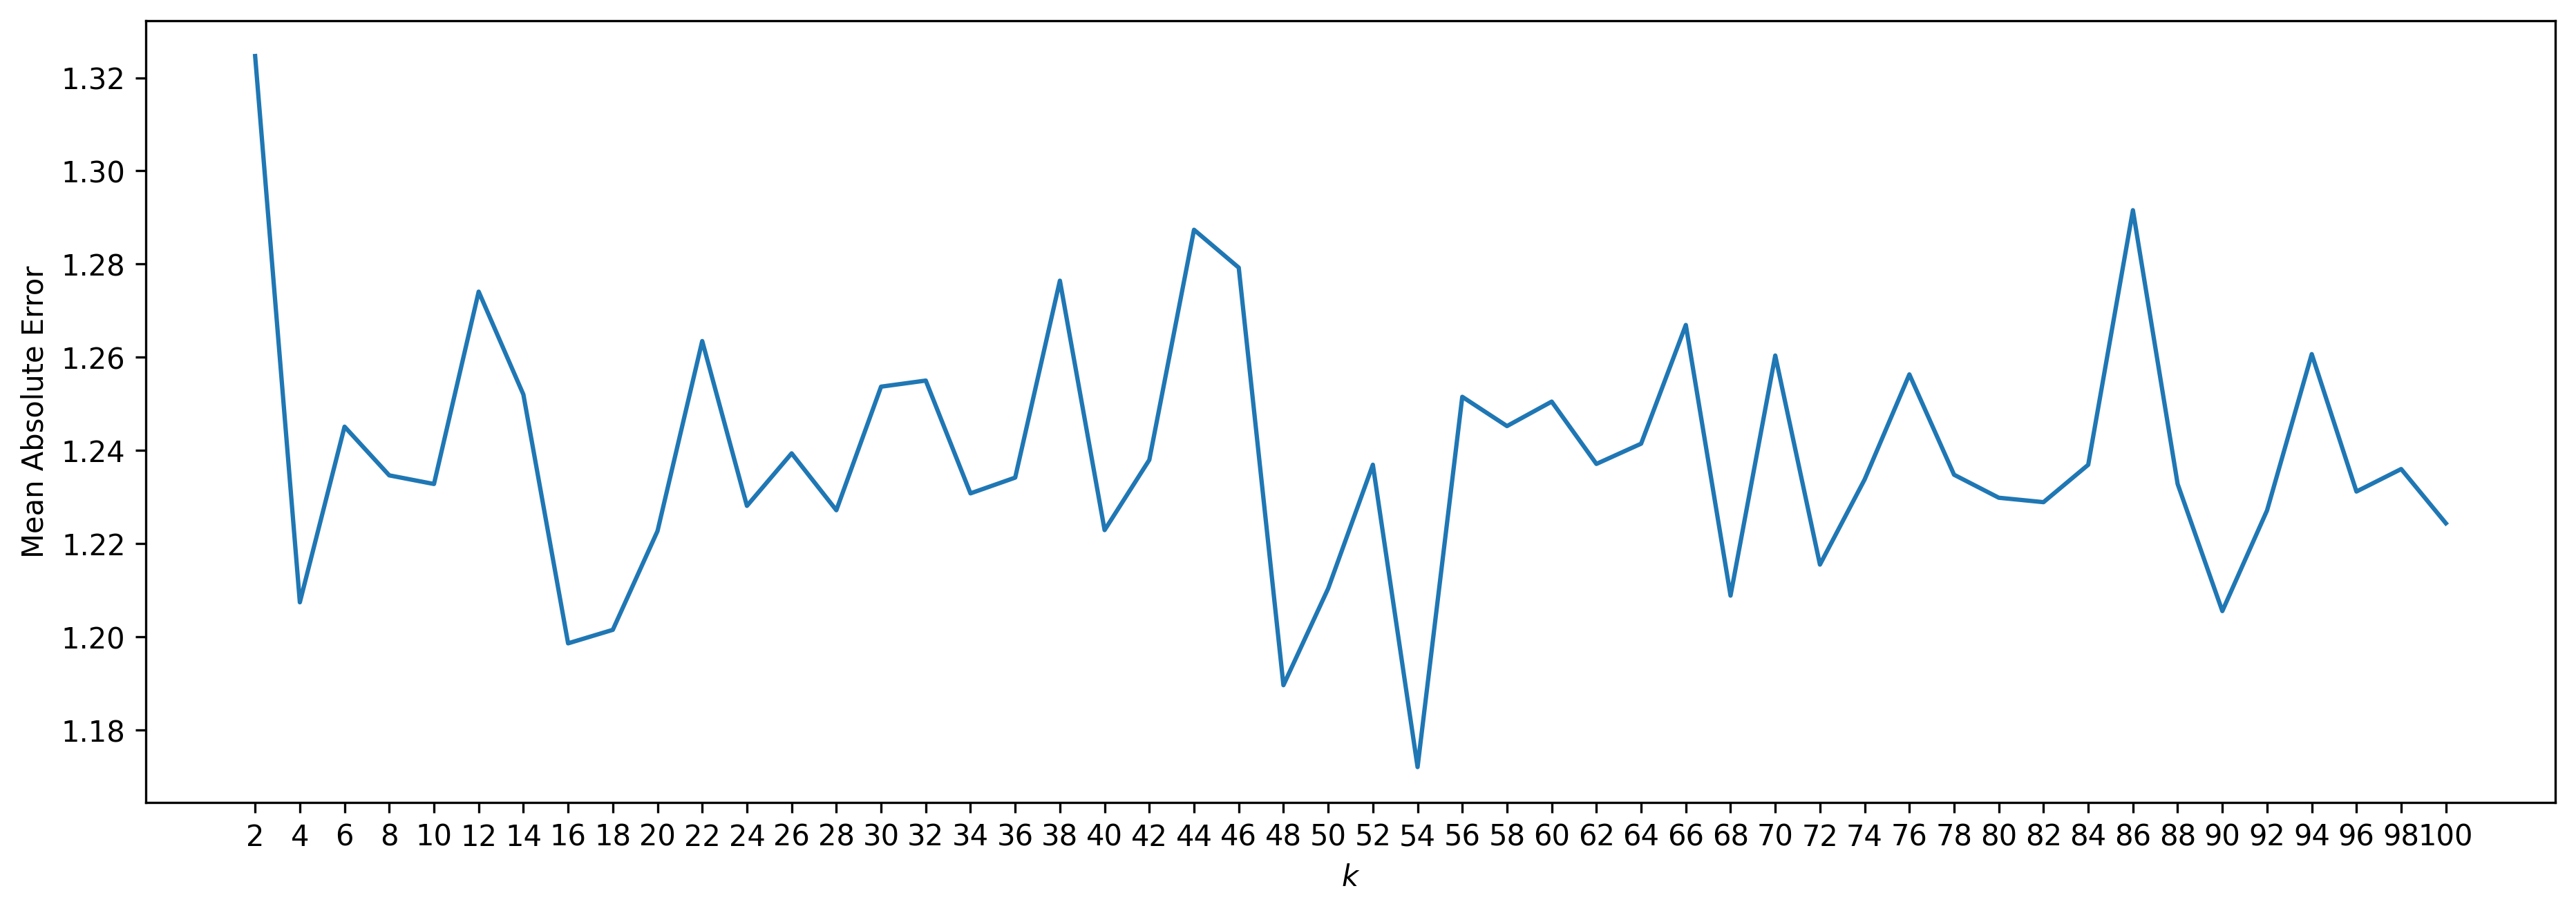

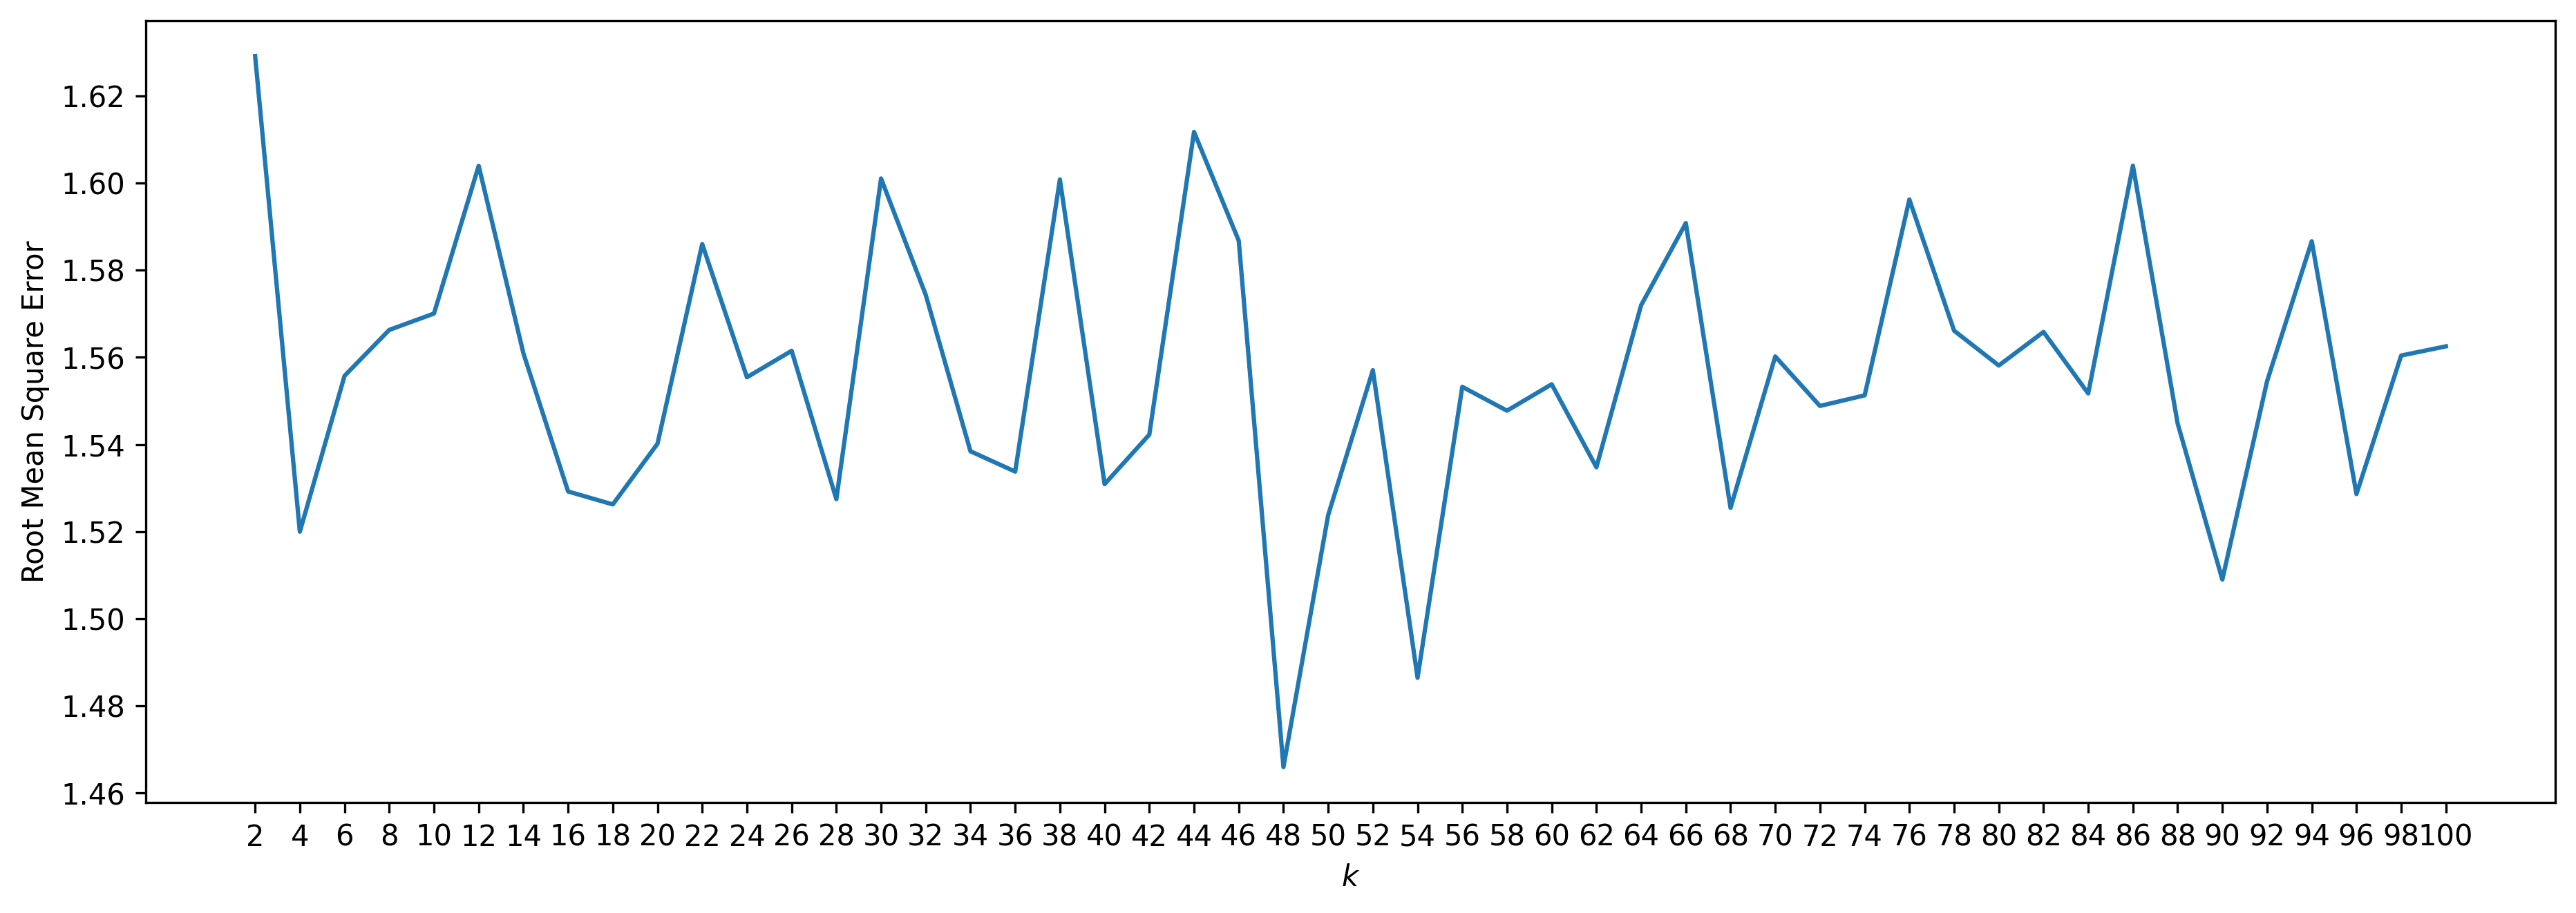

min mae= 1.17208462872127 at k= 54
min rmse= 1.4659642701965077 at k= 48


In [ ]:
#KNN on ratings dataset with high-variance trim
mae_var, rmse_var = collaborative_filtering('KNN', 100, ratings_dataset, trim=high_variance)

In [ ]:
#Minimum values of RMSE for ratings dataset with high-variance trim
print(min(rmse_var))
print(np.argmin(rmse_var)*2+2)

1.4659642701965077
48


### Question 15

In [15]:
#AUC Curves for KNN
def plot_roc(method, dataset, title):
    plt.figure(dpi=300)

    for val in [2.5, 3, 3.5, 4]:
        dataset_load = Dataset.load_from_df(dataset[['userId', 'movieId', 'rating']], reader=reader)
        train, test = train_test_split(dataset_load, test_size=0.1, random_state=42)
        model = method.fit(train)
        res = model.test(test)
        y_true = [pred.r_ui for pred in res]
        y_true = [1 if y>val else 0 for y in y_true]
        y_score = [pred.est for pred in res]
        fpr, tpr, thresholds = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label='Threshold:%.1f, AUC:%.3f' % (val, roc_auc))

    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC curve for ' + title)
    plt.show()

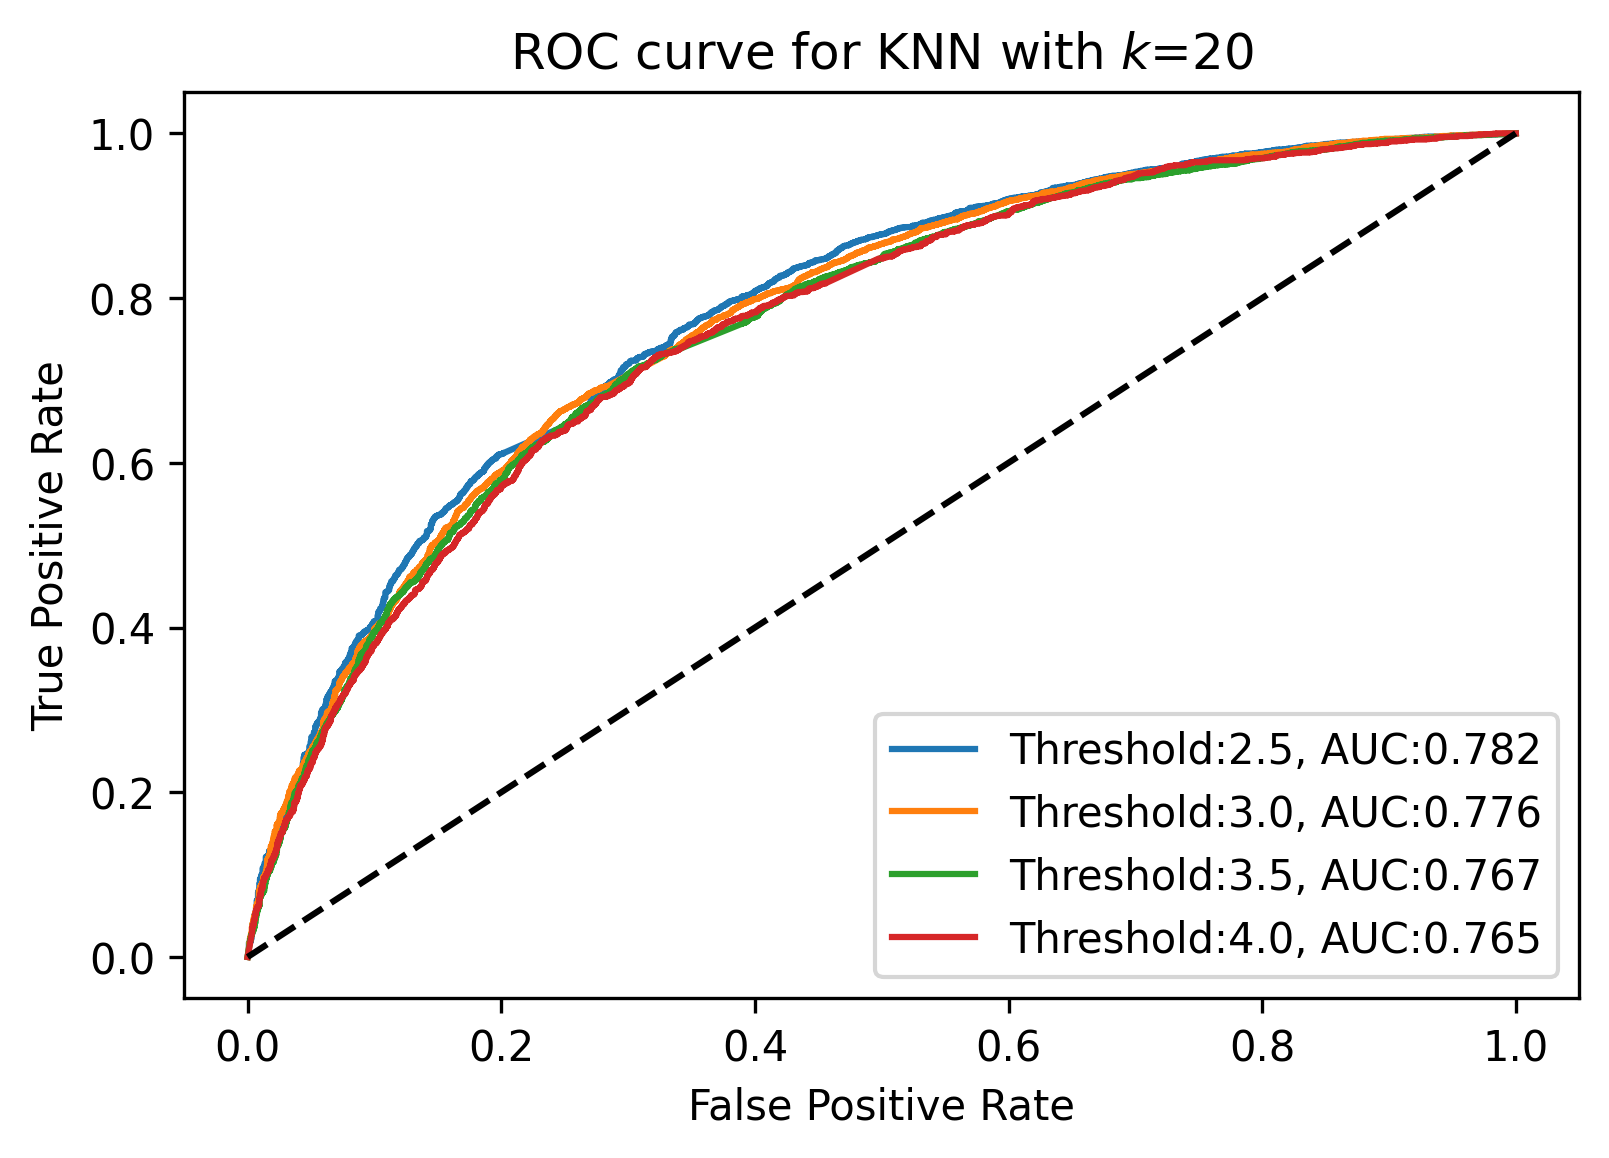

In [ ]:
knn = KNNWithMeans(k=20, sim_options=sim_options, verbose=False)
plot_roc(knn, ratings_dataset_df, 'KNN with $k$=20')

## NNMF: Non-Negative Matrix Factorization


### Question 17


10
20
30
40
50


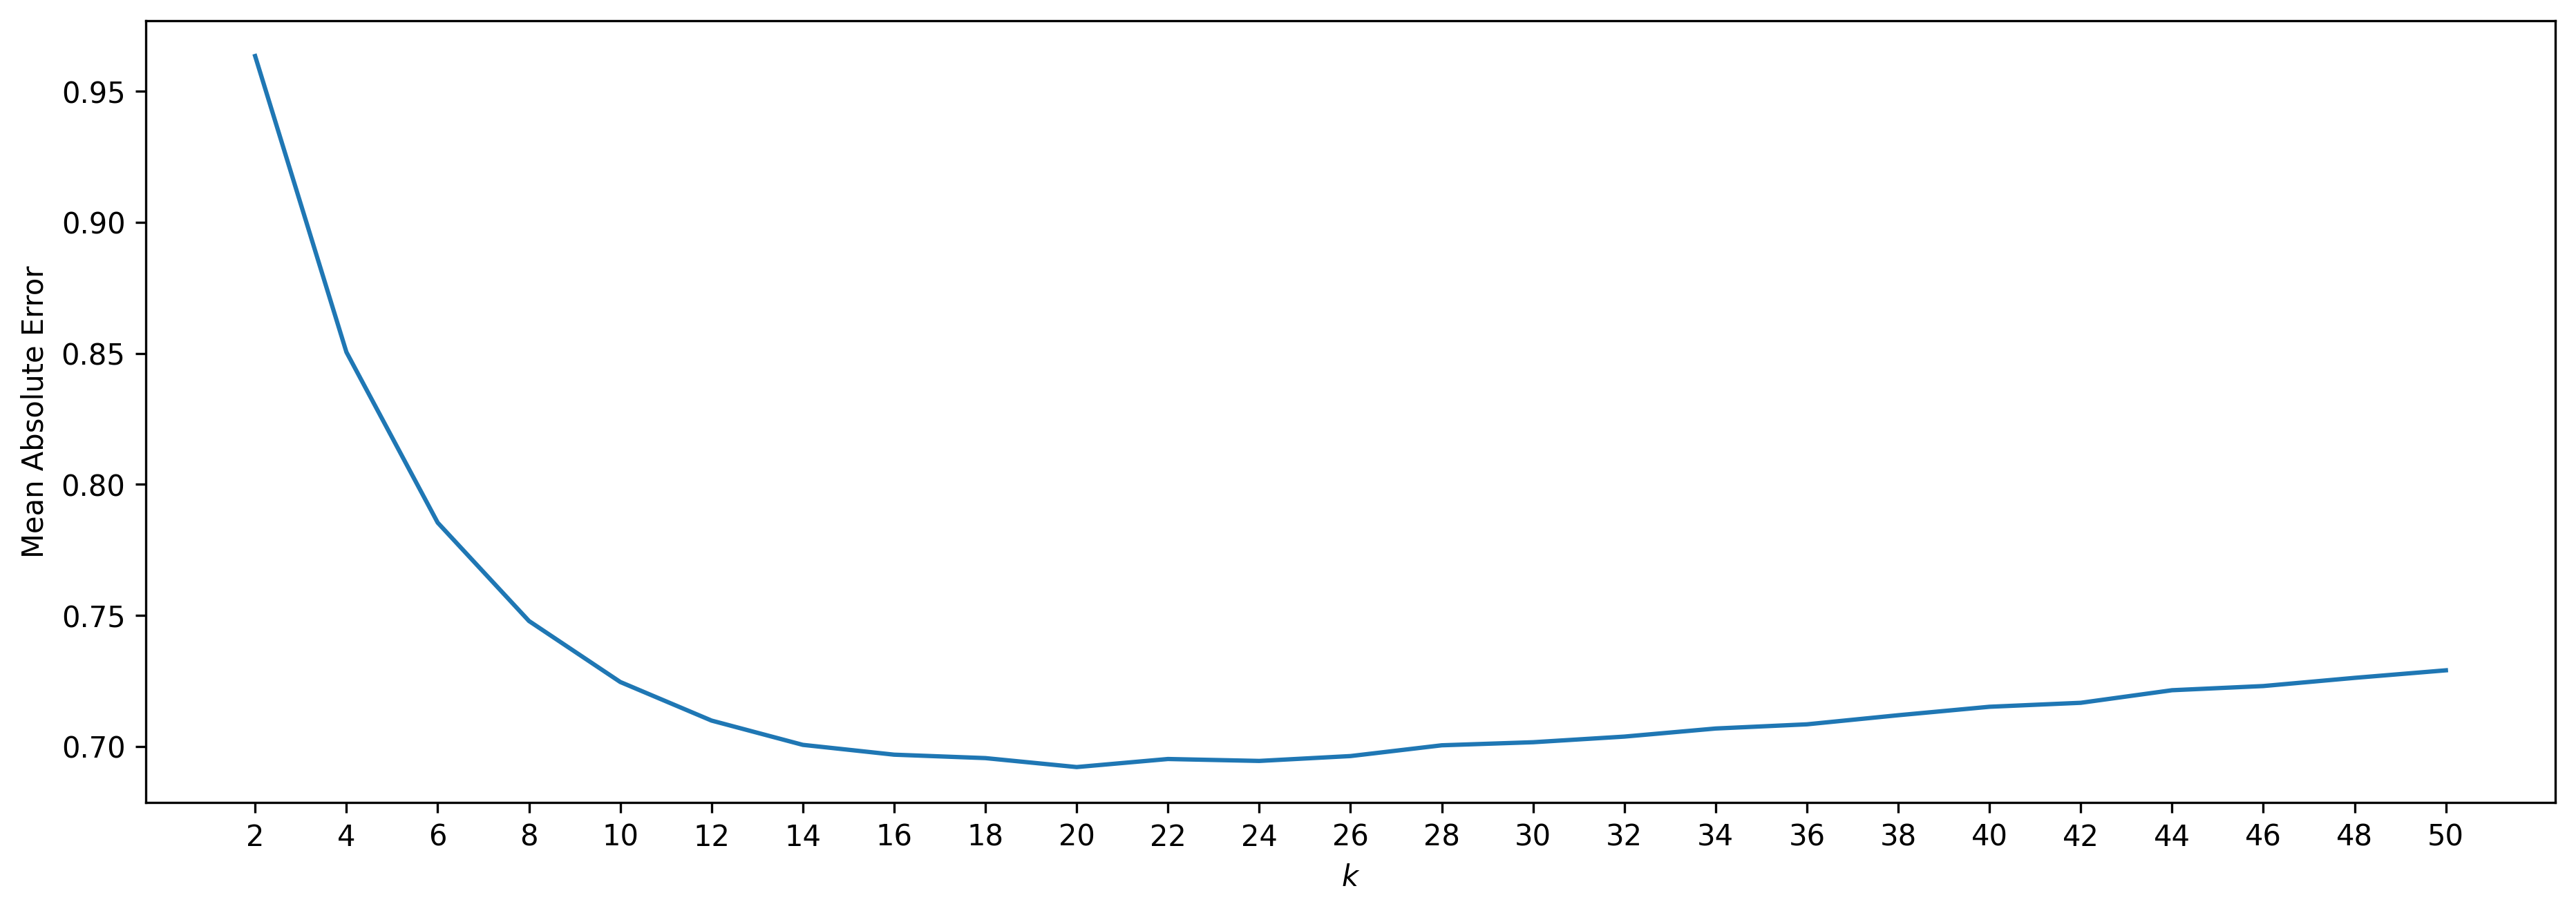

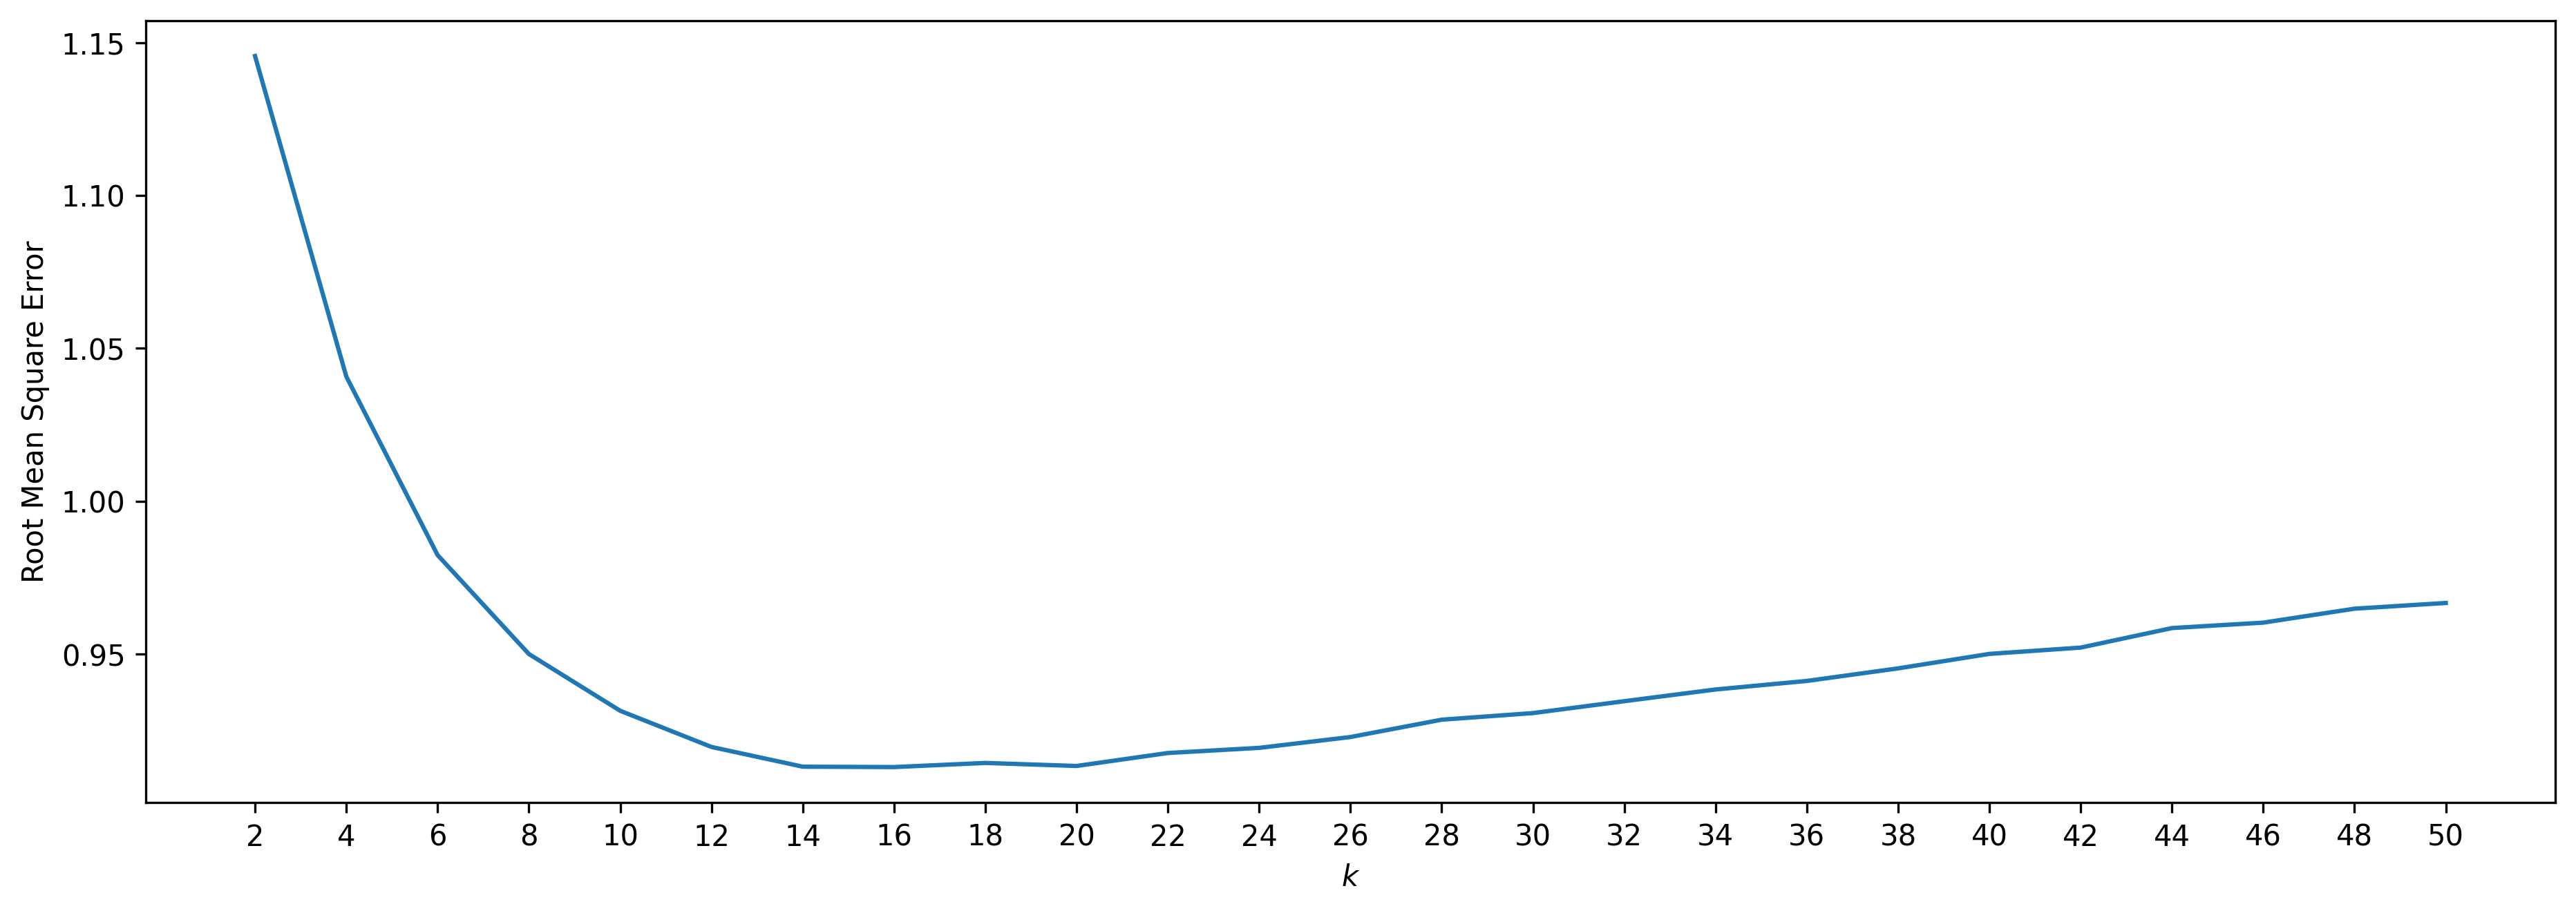

min mae= 0.6921519752087266 at k= 20
min rmse= 0.9130981031317471 at k= 16


In [ ]:
#NNMF on ratings dataset 
mae_17, rmse_17 = collaborative_filtering('NMF', 50, ratings_dataset)

### Question 18

In [ ]:
# Extracting minimum values for NNMF on ratings dataset
print('min mae=', np.min(mae_17), ' at index =', np.argmin(mae_17), ', so value of k =', (np.argmin(mae_17)+1)*2)
print('min rmse=', np.min(rmse_17), ' at index =', np.argmin(rmse_17), ', so value of k =', (np.argmin(rmse_17)+1)*2)

min mae= 0.6921519752087266  at index = 9 , so value of k = 20
min rmse= 0.9130981031317471  at index = 7 , so value of k = 16


### Question 19

10
20
30
40
50


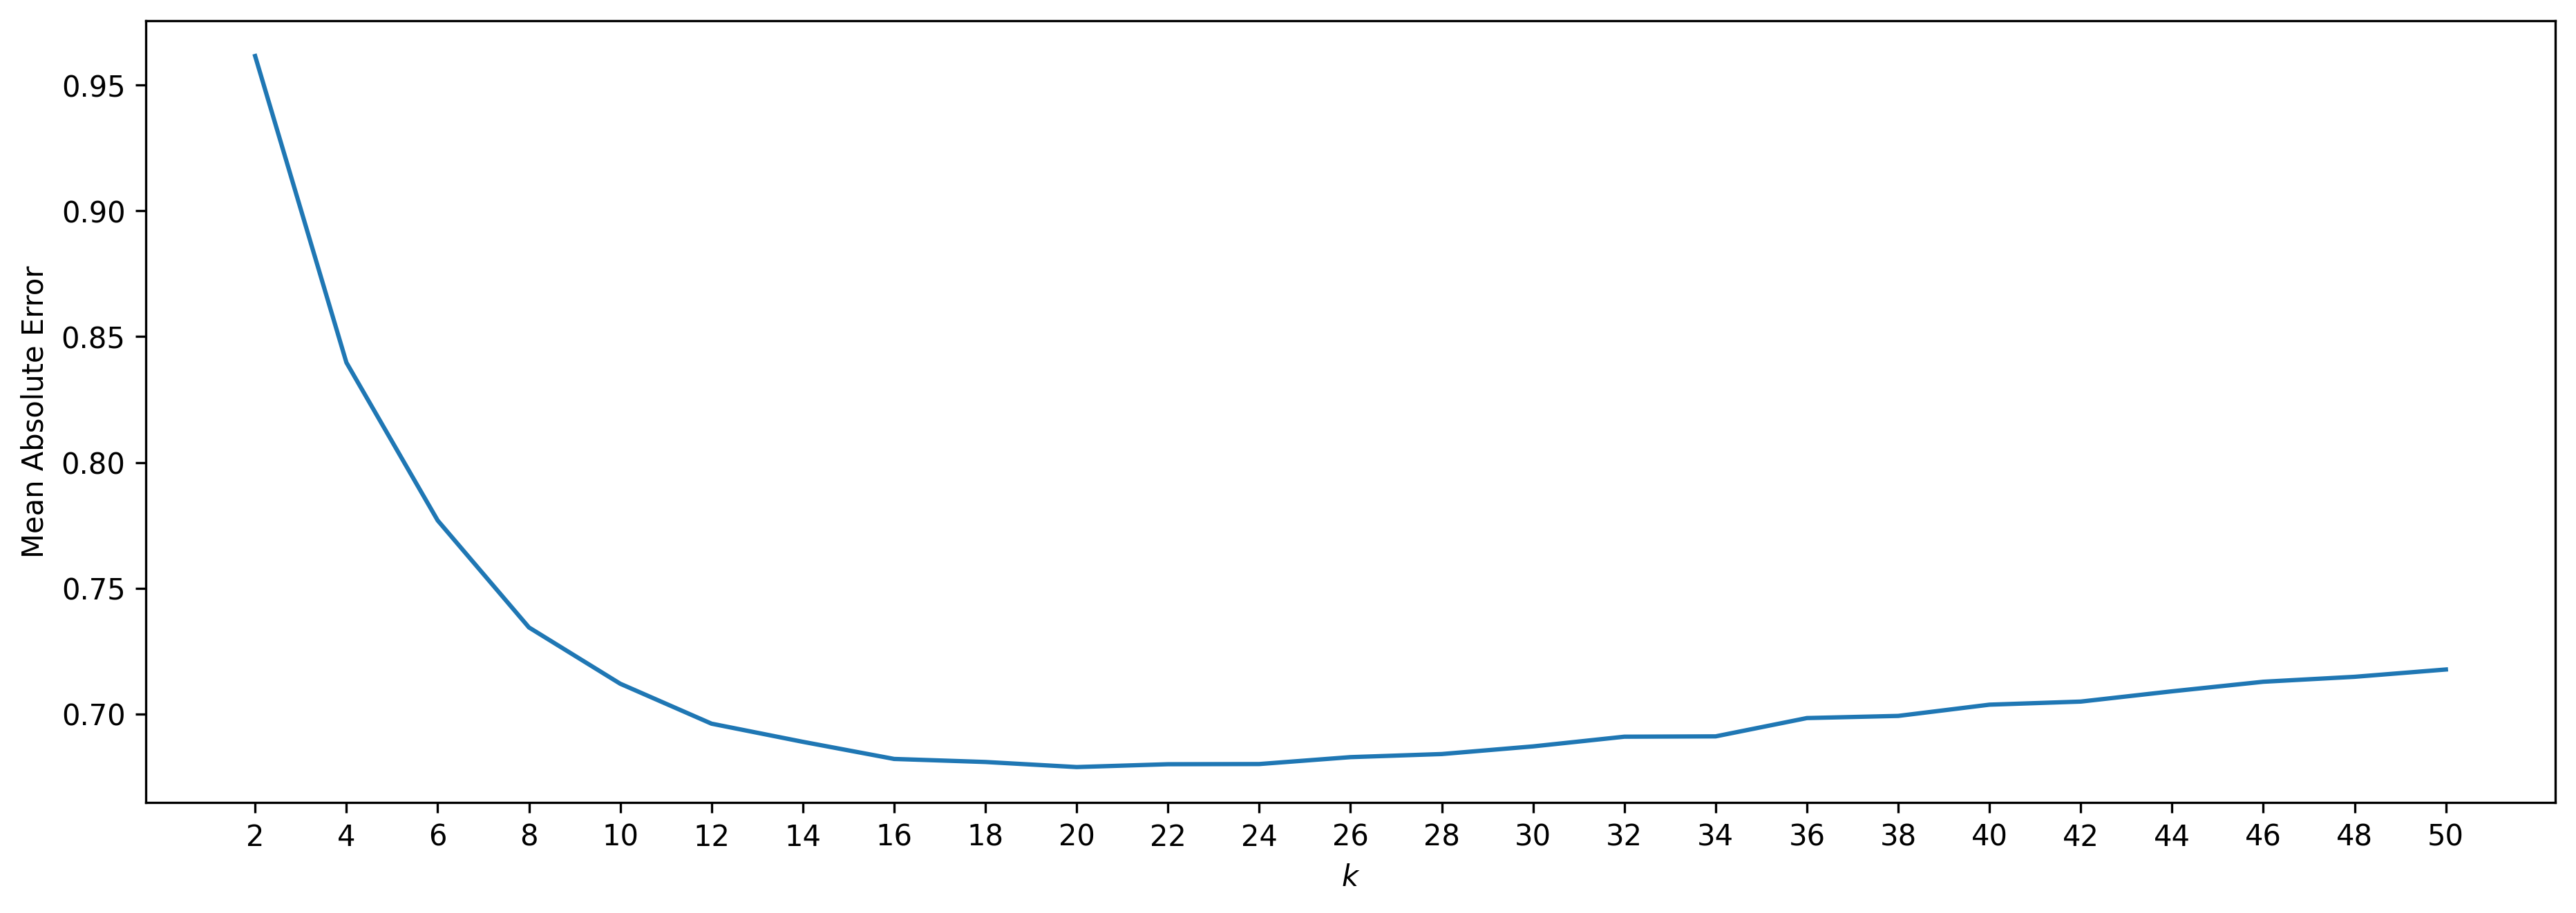

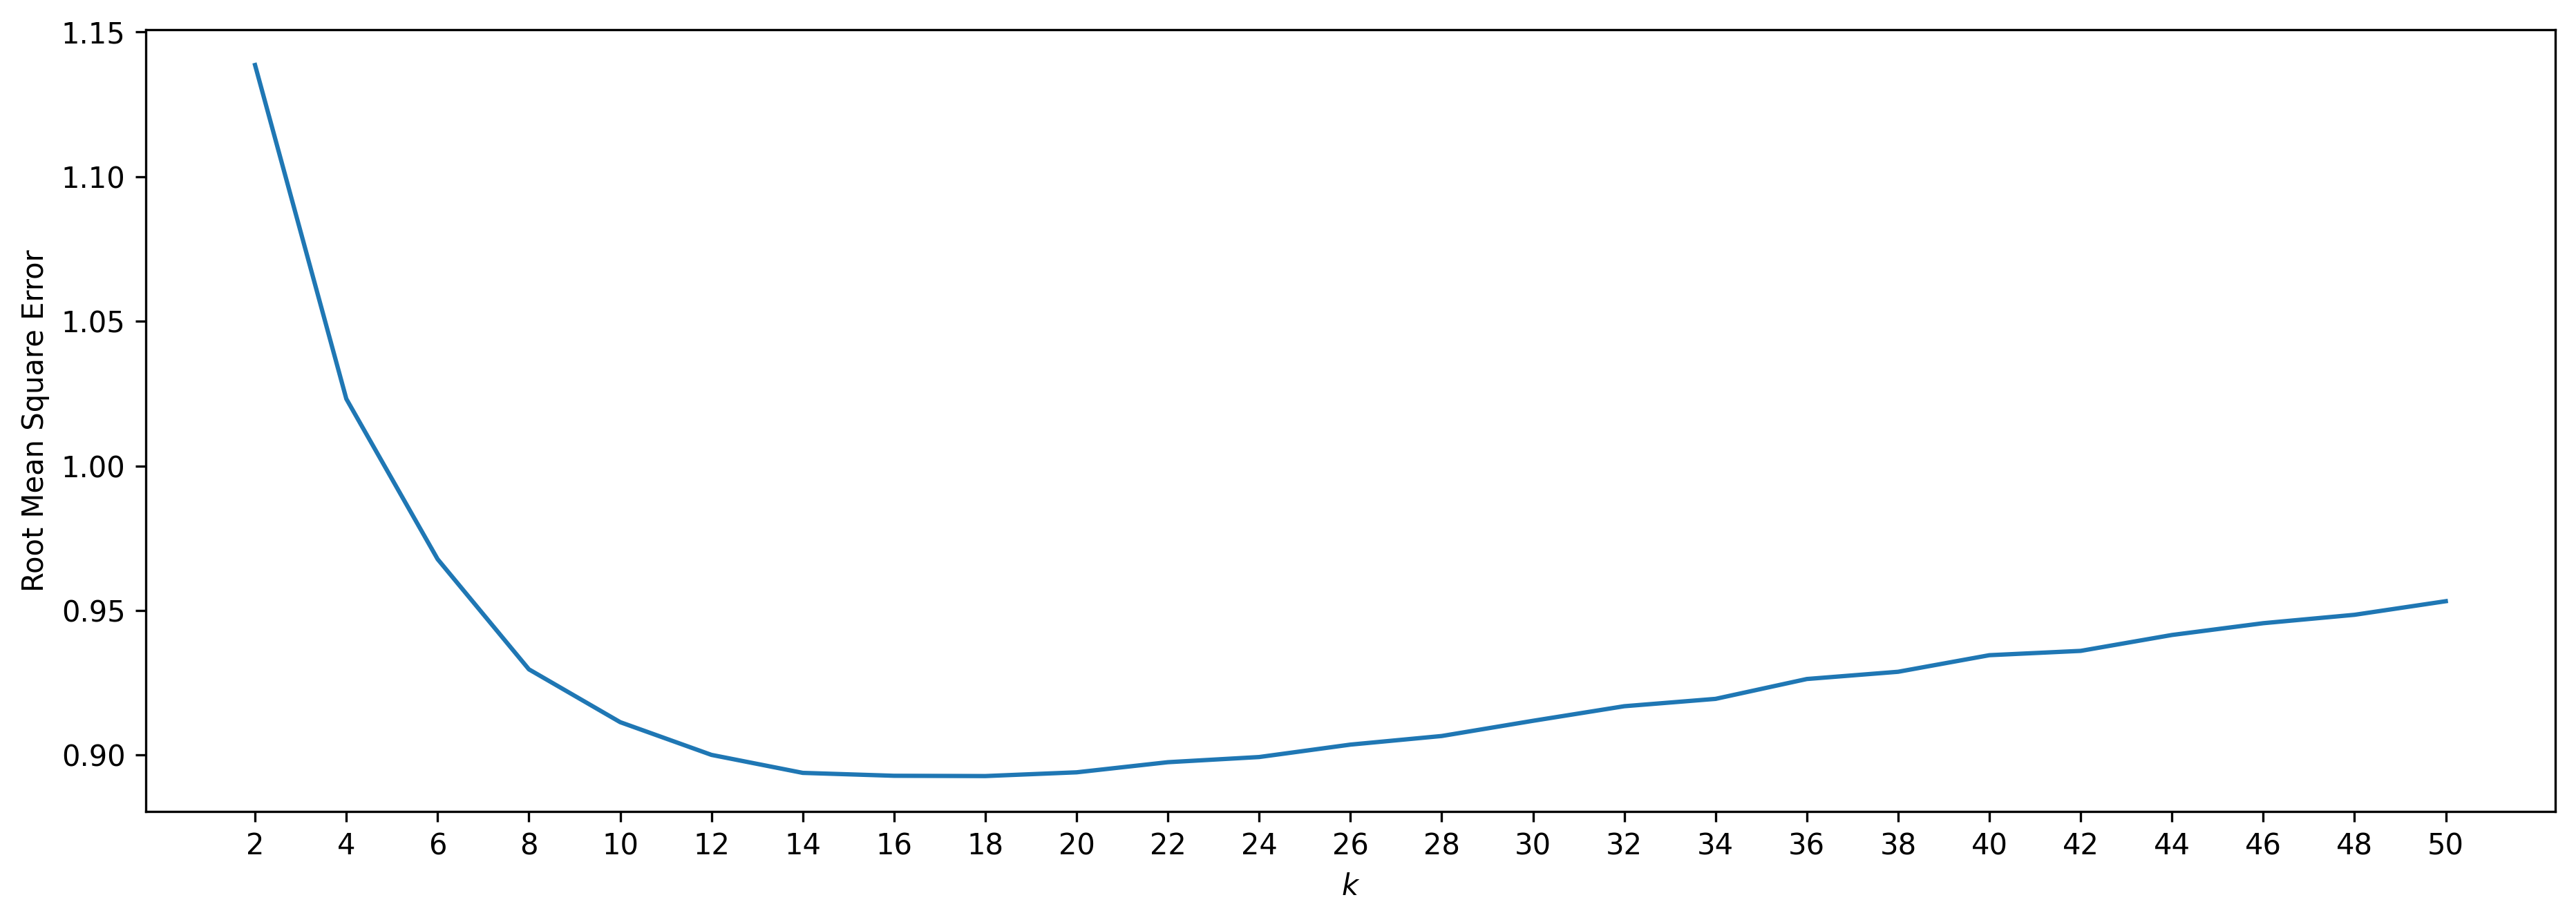

min mae= 0.678885182153541 at k= 20
min rmse= 0.8927592424488859 at k= 18


In [ ]:
#NNMF on ratings dataset with popular trim
mae_19, rmse_19 = collaborative_filtering('NMF', 50, ratings_dataset, trim=popular)

### Question 20

10
20
30
40
50


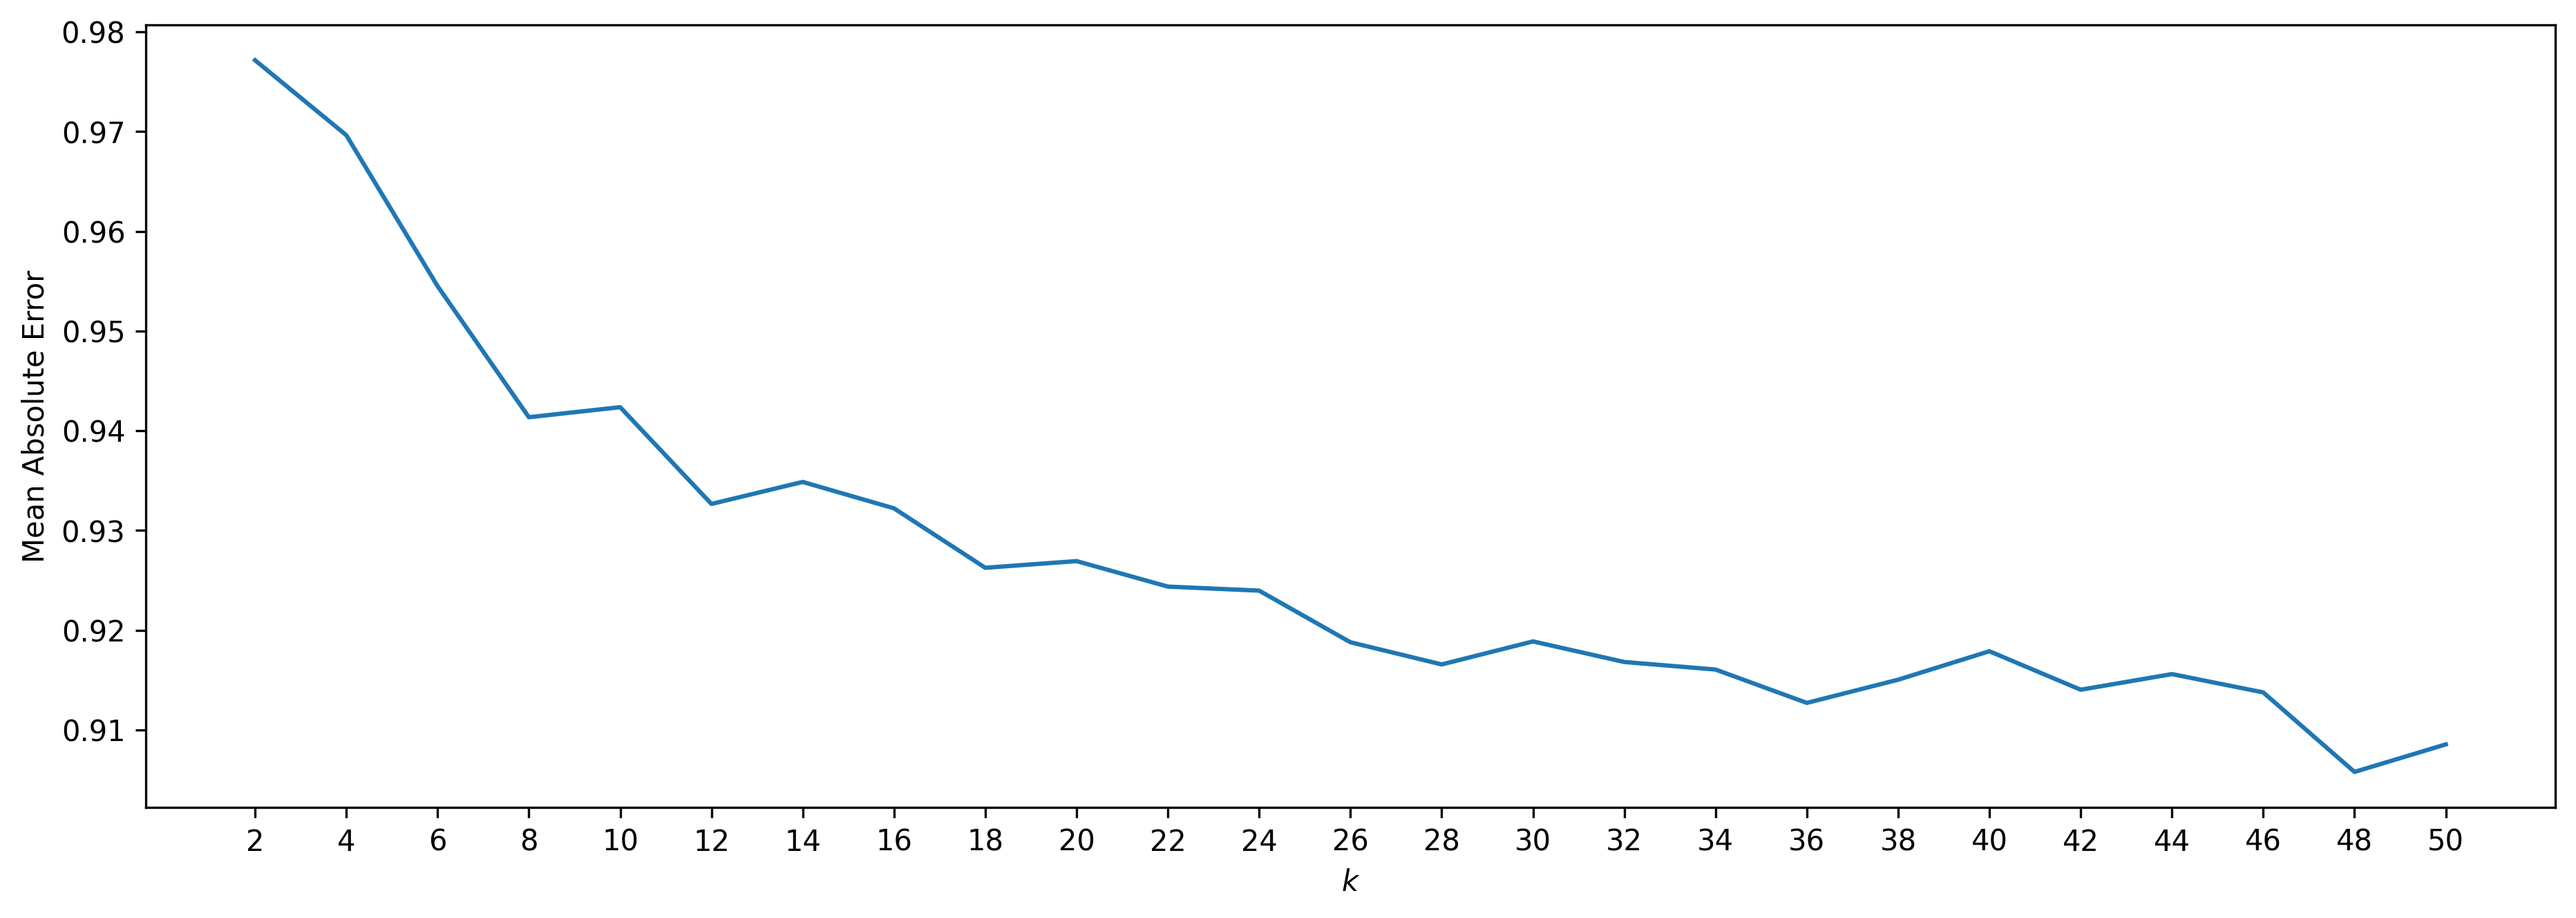

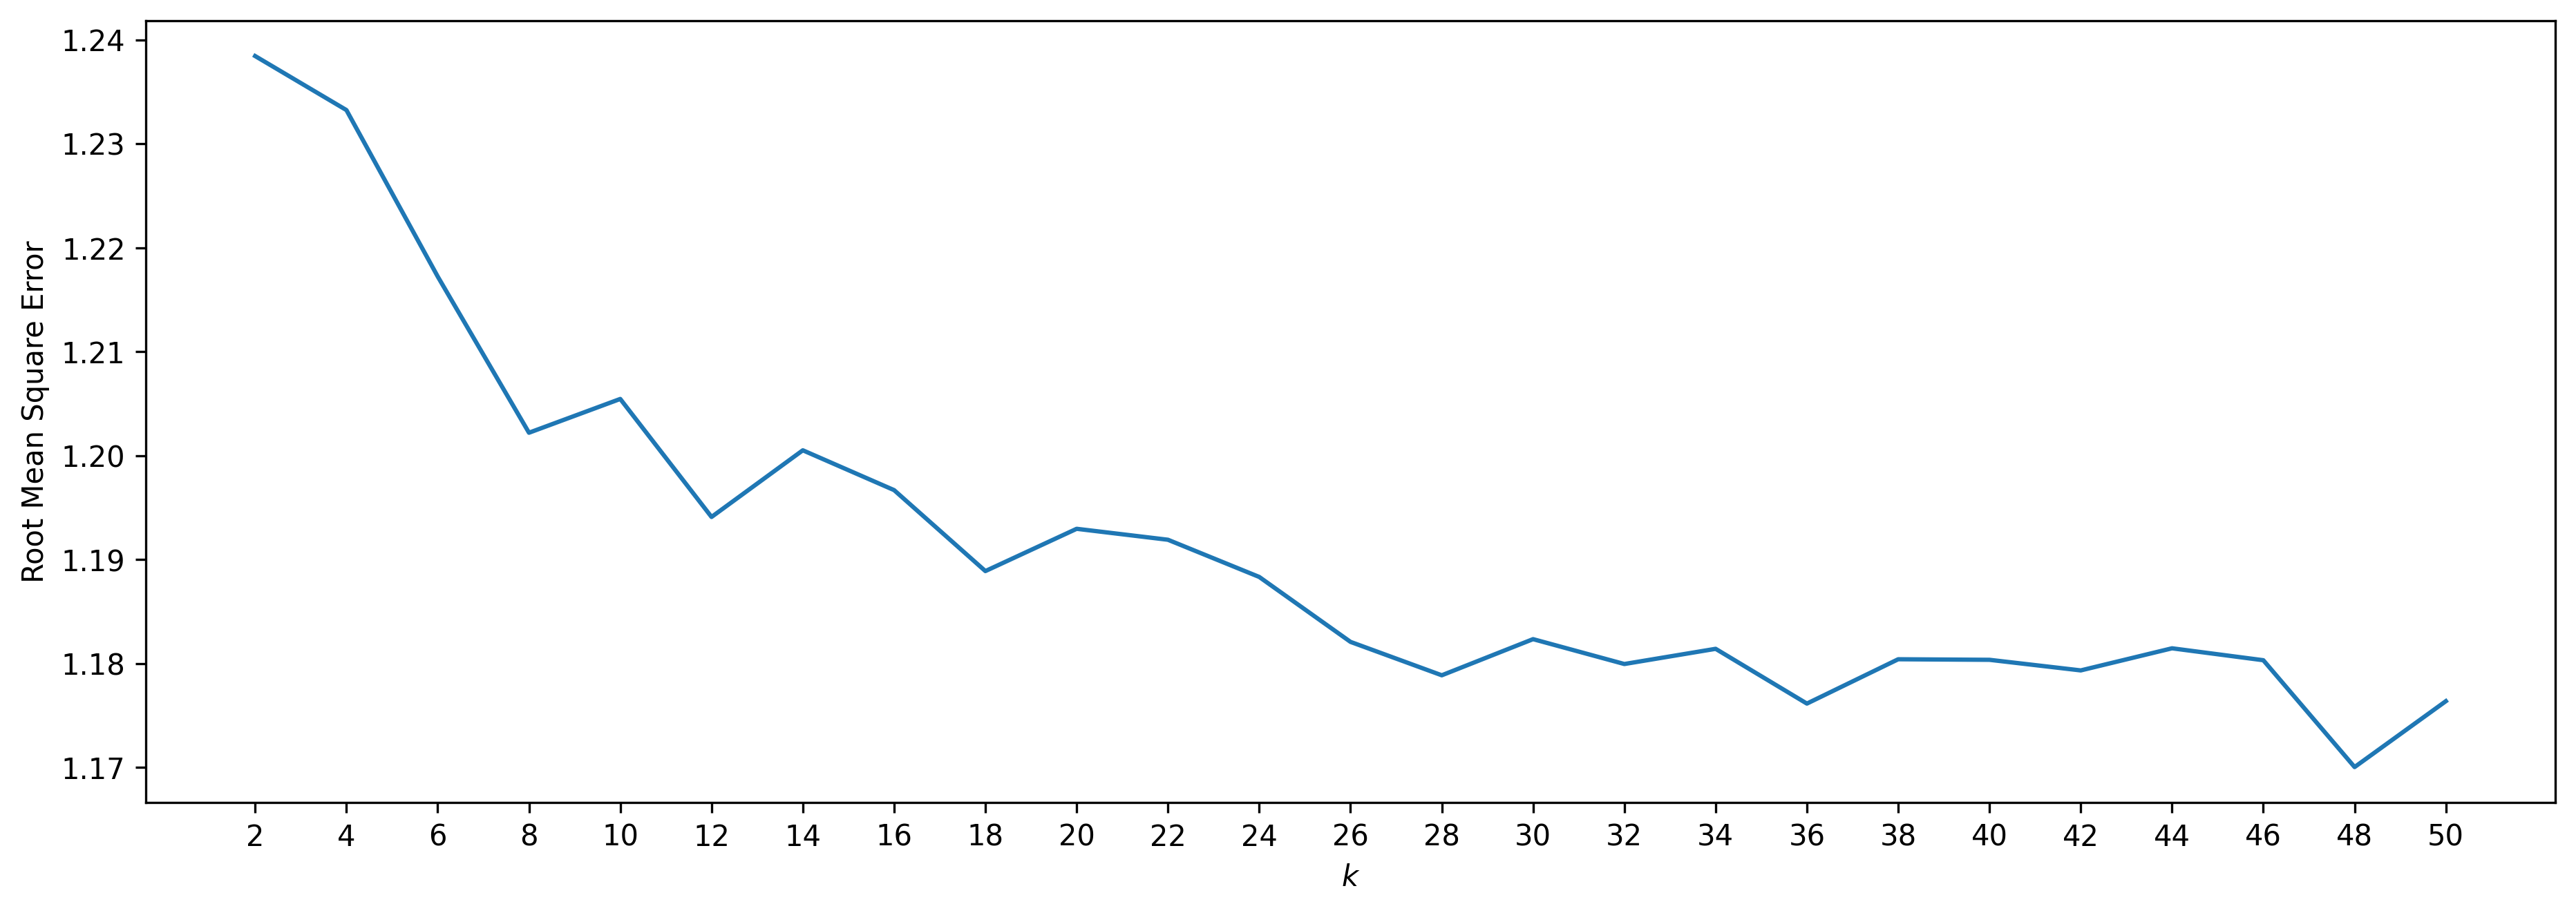

min mae= 0.9057787549260048 at k= 48
min rmse= 1.1700497285364428 at k= 48


In [ ]:
#NNMF on ratings dataset with unpopular trim
mae_20, rmse_20 = collaborative_filtering('NMF', 50, ratings_dataset, trim=unpopular)

### Question 21

10
20
30
40
50


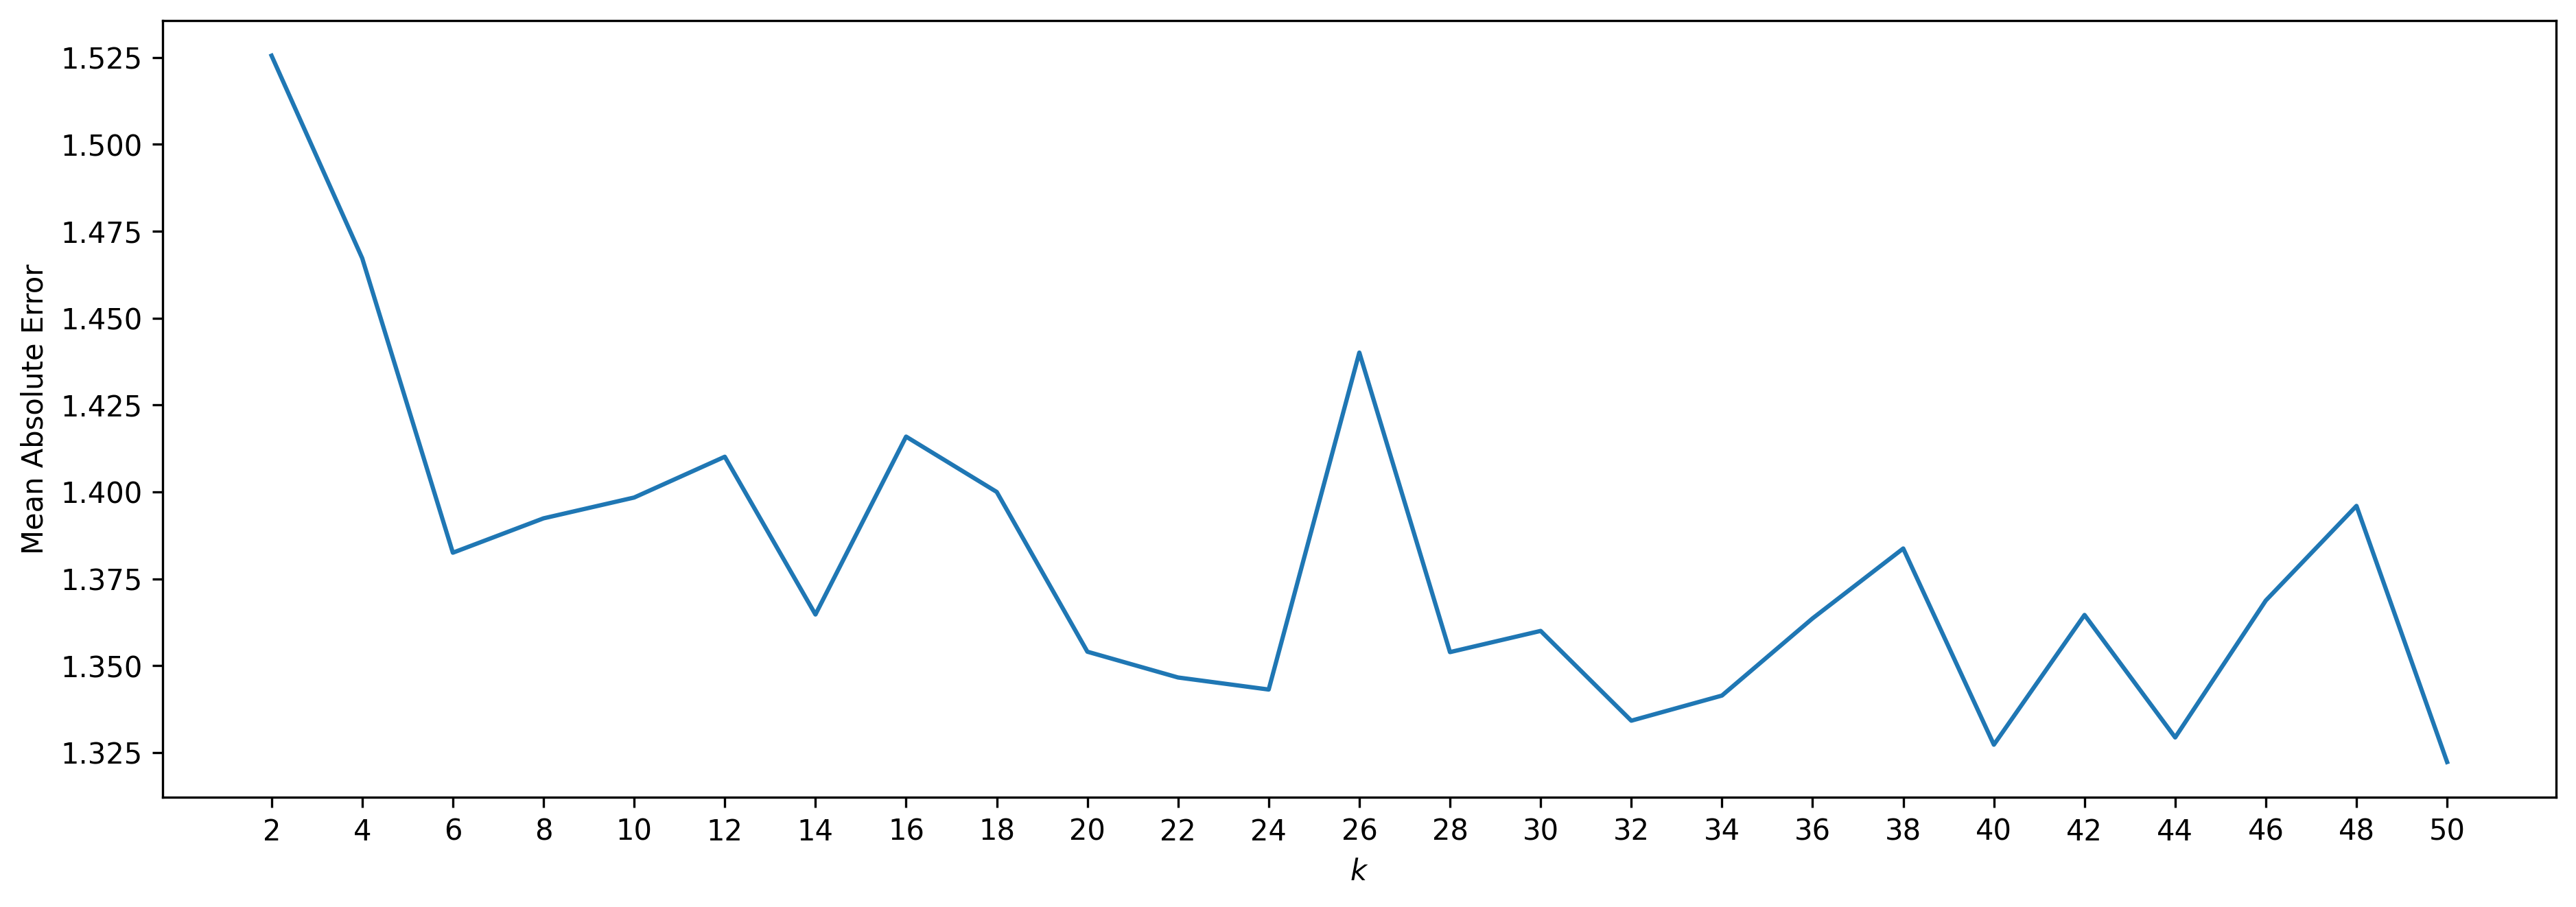

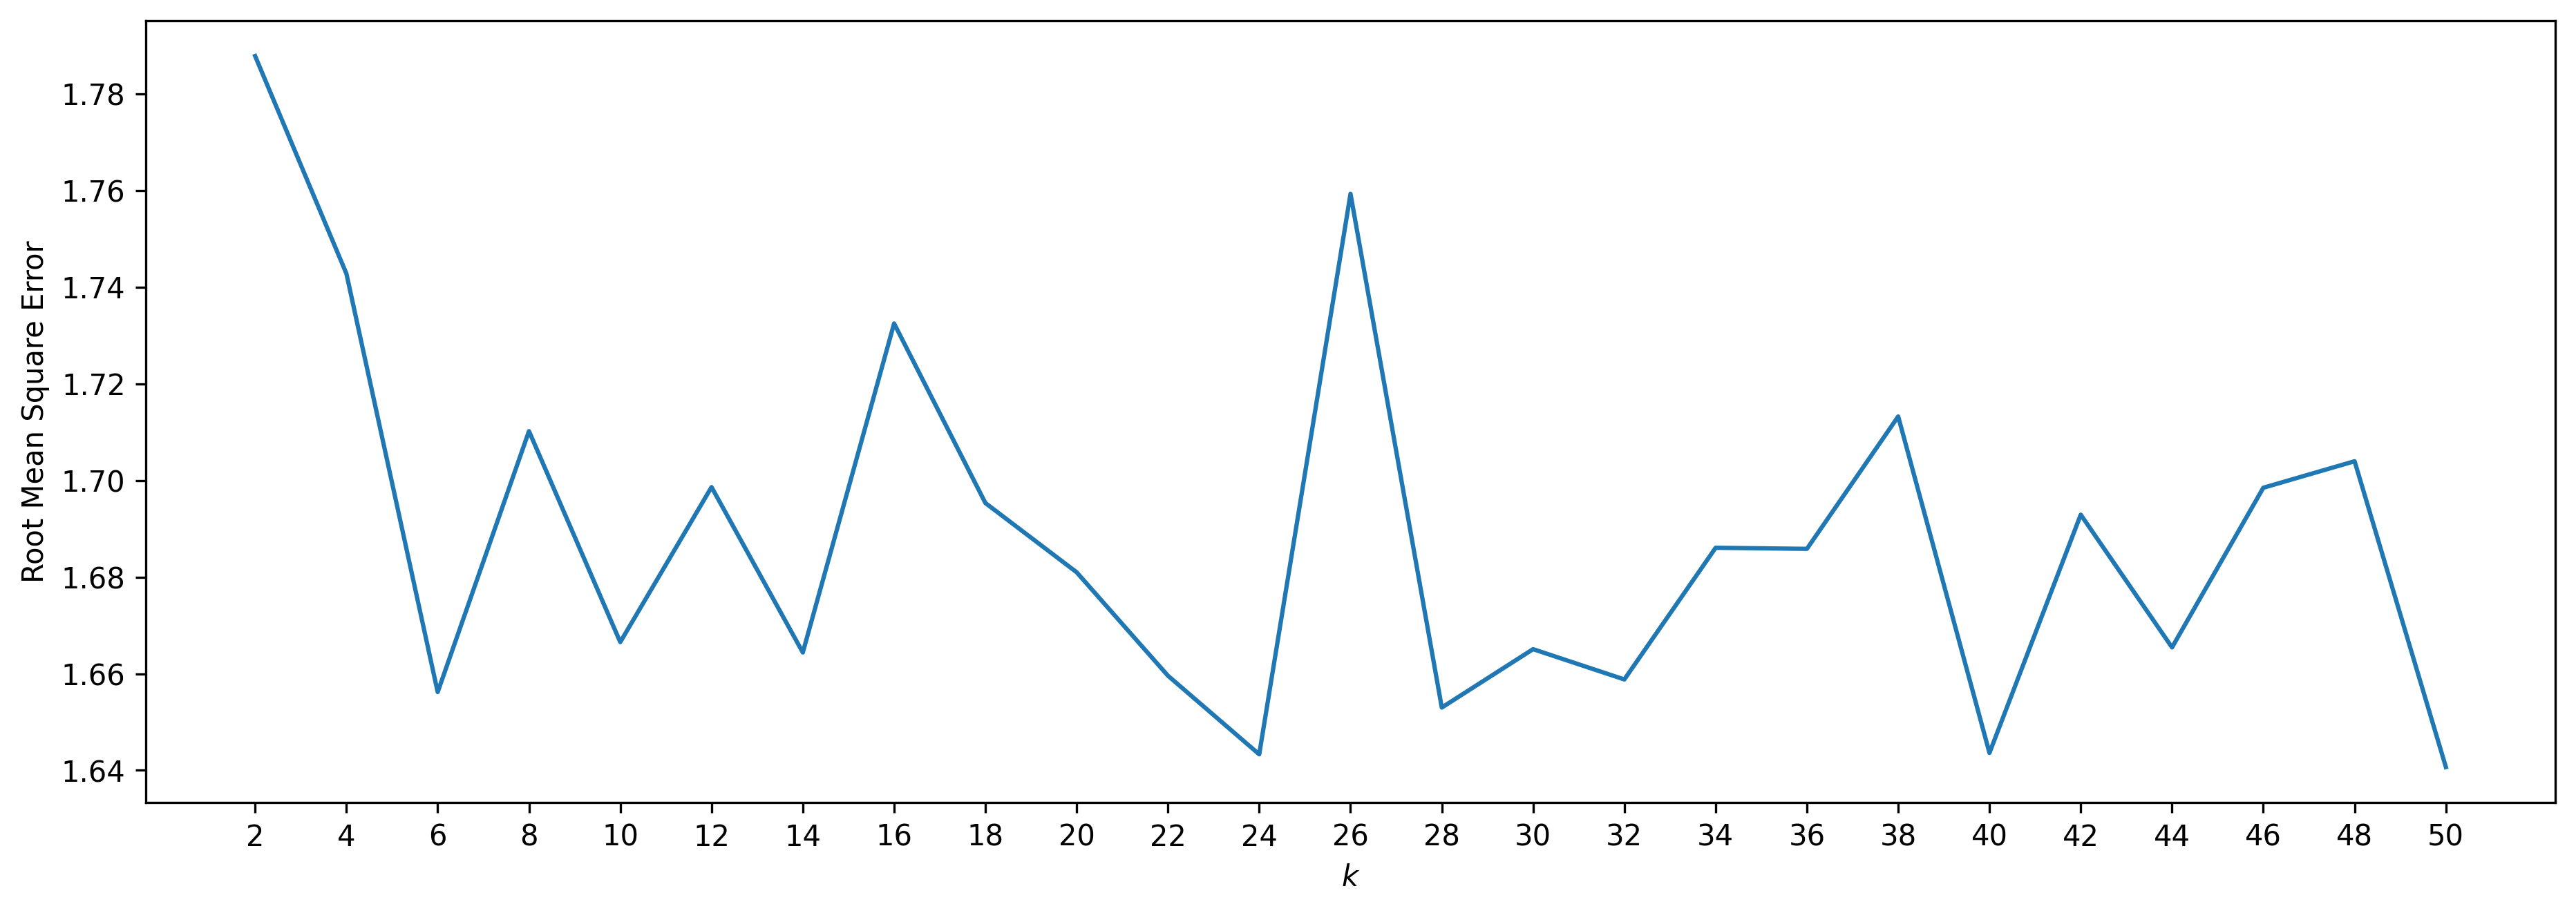

min mae= 1.3223100611729686 at k= 50
min rmse= 1.6406864819589657 at k= 50


In [ ]:
#NNMF on ratings dataset with high-variance trim
mae_21, rmse_21 = collaborative_filtering('NMF', 50, ratings_dataset, trim=high_variance)

### Question 22

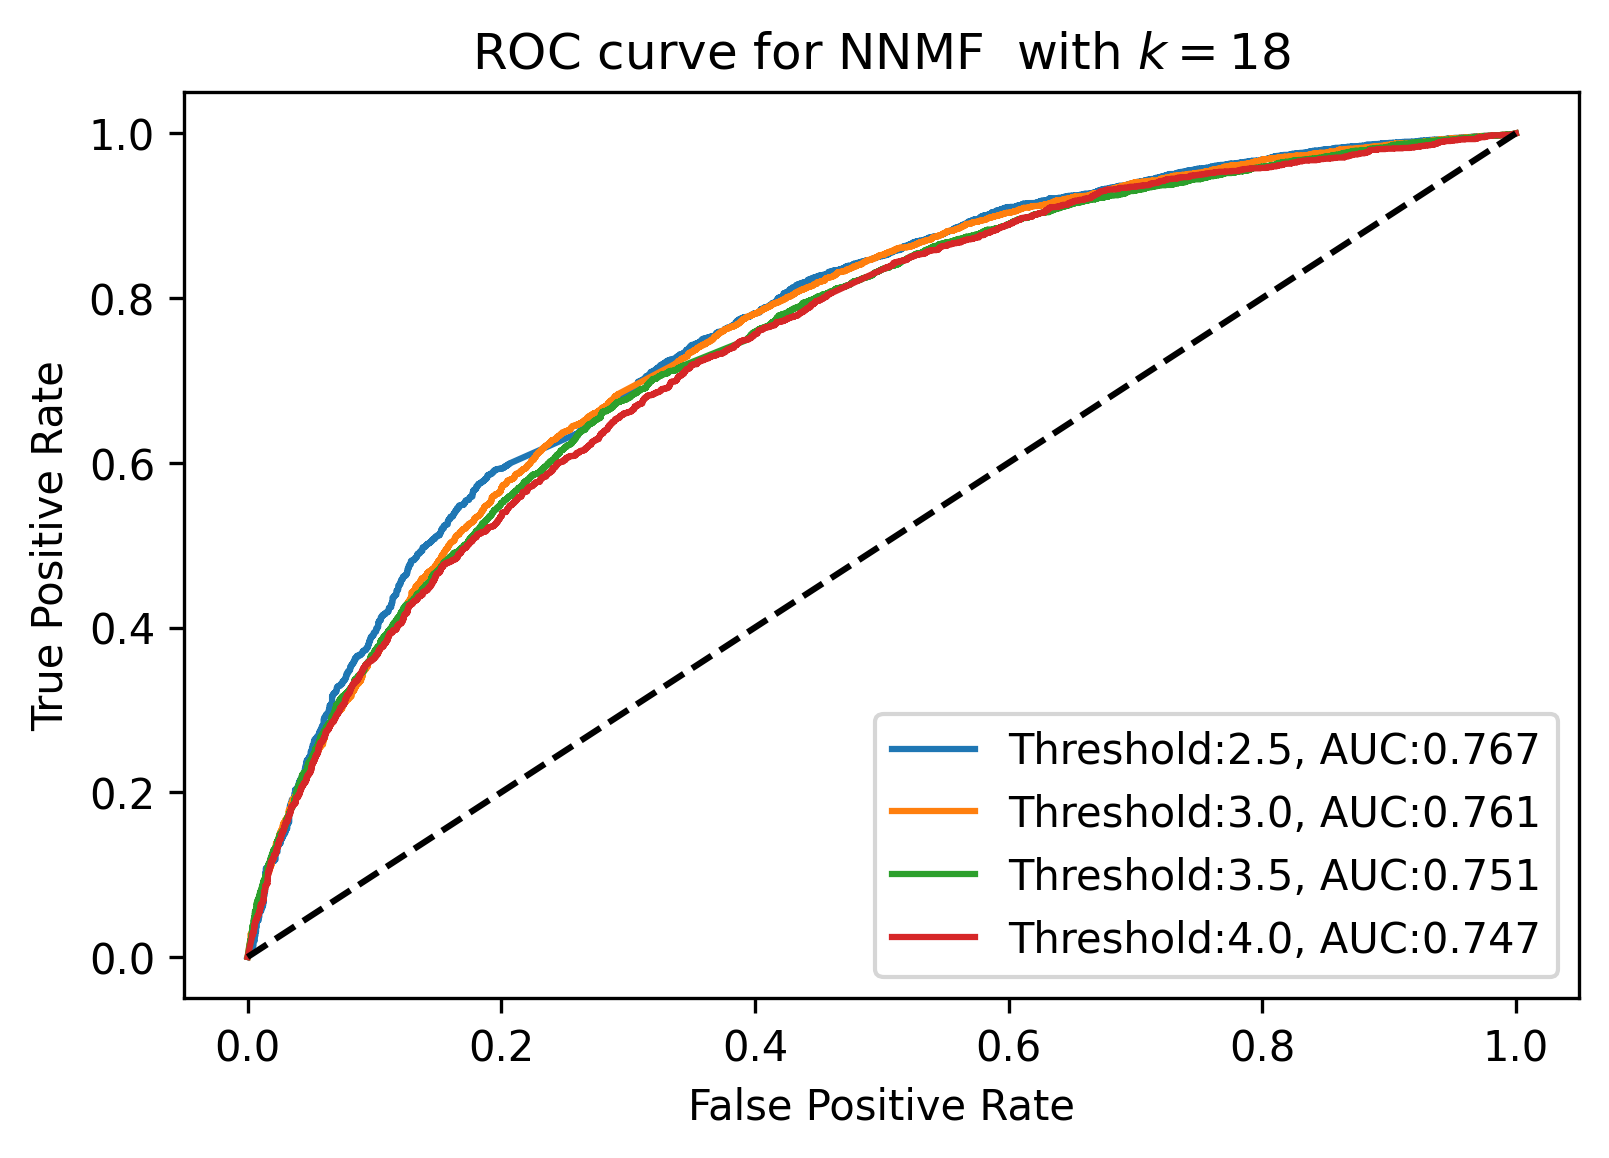

In [ ]:
#AUC curves for NNMF on ratings dataset
nmf = NMF(n_factors = 18)
plot_roc(nmf, ratings_dataset_df, 'NNMF  with $k=18$')

### Question 23

In [ ]:
#Creating a ratings array that would contain the ratings of 610 users fir 9724 movies
ratings_array = np.array(ratings_dataset_df)
R = np.empty((len(np.unique(ratings_dataset_df.userId)), len(np.unique(ratings_dataset_df.movieId))))
unique_23 = np.unique(ratings_dataset_df.movieId)
for i in np.arange(len(ratings_array)):
    uidx = int(ratings_array[i,0])
    midx1 = int(ratings_array[i,1])
    midx = list(unique_23).index(midx1)
    R[uidx-1,midx] = ratings_array[i,2]

In [ ]:
from sklearn.decomposition import NMF

#performing NNMF on R matrix to get matrices U and V'
model = NMF(n_components=20, init='random', random_state=0)
U = model.fit_transform(R)
V = model.components_

G:\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [ ]:
#doing a genre analysis for latent factors
def genre_analyse(column_index):
    R_index = np.argsort(V[column_index,:])[::-1]

    genre_str = ''
    for i in np.arange(10):
        genre_str_tmp = str(dataset.genres[dataset.movieId==unique_23[R_index[i]]]).strip('Name: genres, dtype: object').strip('\n').split(' ')[-1]
        title = str(dataset.title[dataset.movieId==unique_23[R_index[i]]]).strip('Name: title, dtype: object').strip('\n')
        print(title)
        print(genre_str_tmp)
        genre_str += '|'+genre_str_tmp
    
    genres_list = genre_str[1:].split('|')
    unique, count = np.unique(genres_list, return_counts=True)
    print(dict(zip(unique, count)))

In [ ]:
#Genre analysis for latent factor 1
genre_analyse(0)

7859    Cabin in the Woods, The (2012)
Comedy|Horror|Sci-Fi|Thriller
902    Aliens (1986)
Action|Adventure|Horror|Sci-Fi
1261    Starship Troopers (1997)
Action|Sci-Fi
8681    Mad Max: Fury Road (2015)
Action|Adventure|Sci-Fi|Thriller
6330    Children of Men (2006)
Action|Adventure|Drama|Sci-Fi|Thriller
4927    Dawn of the Dead (1978)
Action|Drama|Horror
6422    Hot Fuzz (2007)
Action|Comedy|Crime|Mystery
8322    Snowpiercer (2013)
Action|Drama|Sci-Fi
6827    Let the Right One In (Låt den rätte komma in) ...
Drama|Fantasy|Horror|Romance
4408    28 Days Later (2002)
Action|Horror|Sci-Fi
{'Action': 8, 'Adventure': 3, 'Comedy': 2, 'Crime': 1, 'Drama': 4, 'Fantasy': 1, 'Horror': 5, 'Mystery': 1, 'Romance': 1, 'Sci-Fi': 7, 'Thriller': 3}


In [ ]:
#Genre analysis for latent factor 2
genre_analyse(1)

3565    Man Who Wasn't There, The (2001)
Crime|Drama
2515    American Graffiti (1973)
Comedy|Drama
3958    Igby Goes Down (2002)
Comedy|Drama
83    Beautiful Girls (1996)
Comedy|Drama|Romance
2458    Of Mice and Men (1992)
Drama
942    Rosencrantz and Guildenstern Are Dead (1990)
Comedy|Drama
1671    Say Anything... (1989)
Comedy|Drama|Romance
585    Wallace & Gromit: The Best of Aardman Animatio...
Adventure|Animation|Comedy
413    In the Name of the Father (1993)
Drama
1946    Go (1999)
Comedy|Crime
{'Adventure': 1, 'Animation': 1, 'Comedy': 7, 'Crime': 2, 'Drama': 8, 'Romance': 2}


In [ ]:
#Genre analysis for latent factor 3
genre_analyse(2)

4800    Lord of the Rings: The Return of the King, The...
Action|Adventure|Drama|Fantasy
3638    Lord of the Rings: The Fellowship of the Ring,...
Adventure|Fantasy
4137    Lord of the Rings: The Two Towers, The (2002)
Adventure|Fantasy
6743    Iron Man (2008)
Action|Adventure|Sci-Fi
6772    WALL·E (2008)
Adventure|Animation|Children|Romance|Sci-Fi
224    Star Wars: Episode IV - A New Hope (1977)
Action|Adventure|Sci-Fi
7693    Avengers, The (2012)
Action|Adventure|Sci-Fi|IMAX
7039    Up (2009)
Adventure|Animation|Children|Drama
6710    Dark Knight, The (2008)
Action|Crime|Drama|IMAX
1939    Matrix, The (1999)
Action|Sci-Fi|Thriller
{'Action': 6, 'Adventure': 8, 'Animation': 2, 'Children': 2, 'Crime': 1, 'Drama': 3, 'Fantasy': 3, 'IMAX': 2, 'Romance': 1, 'Sci-Fi': 5, 'Thriller': 1}


### Question 24, 25


10
20
30
40
50


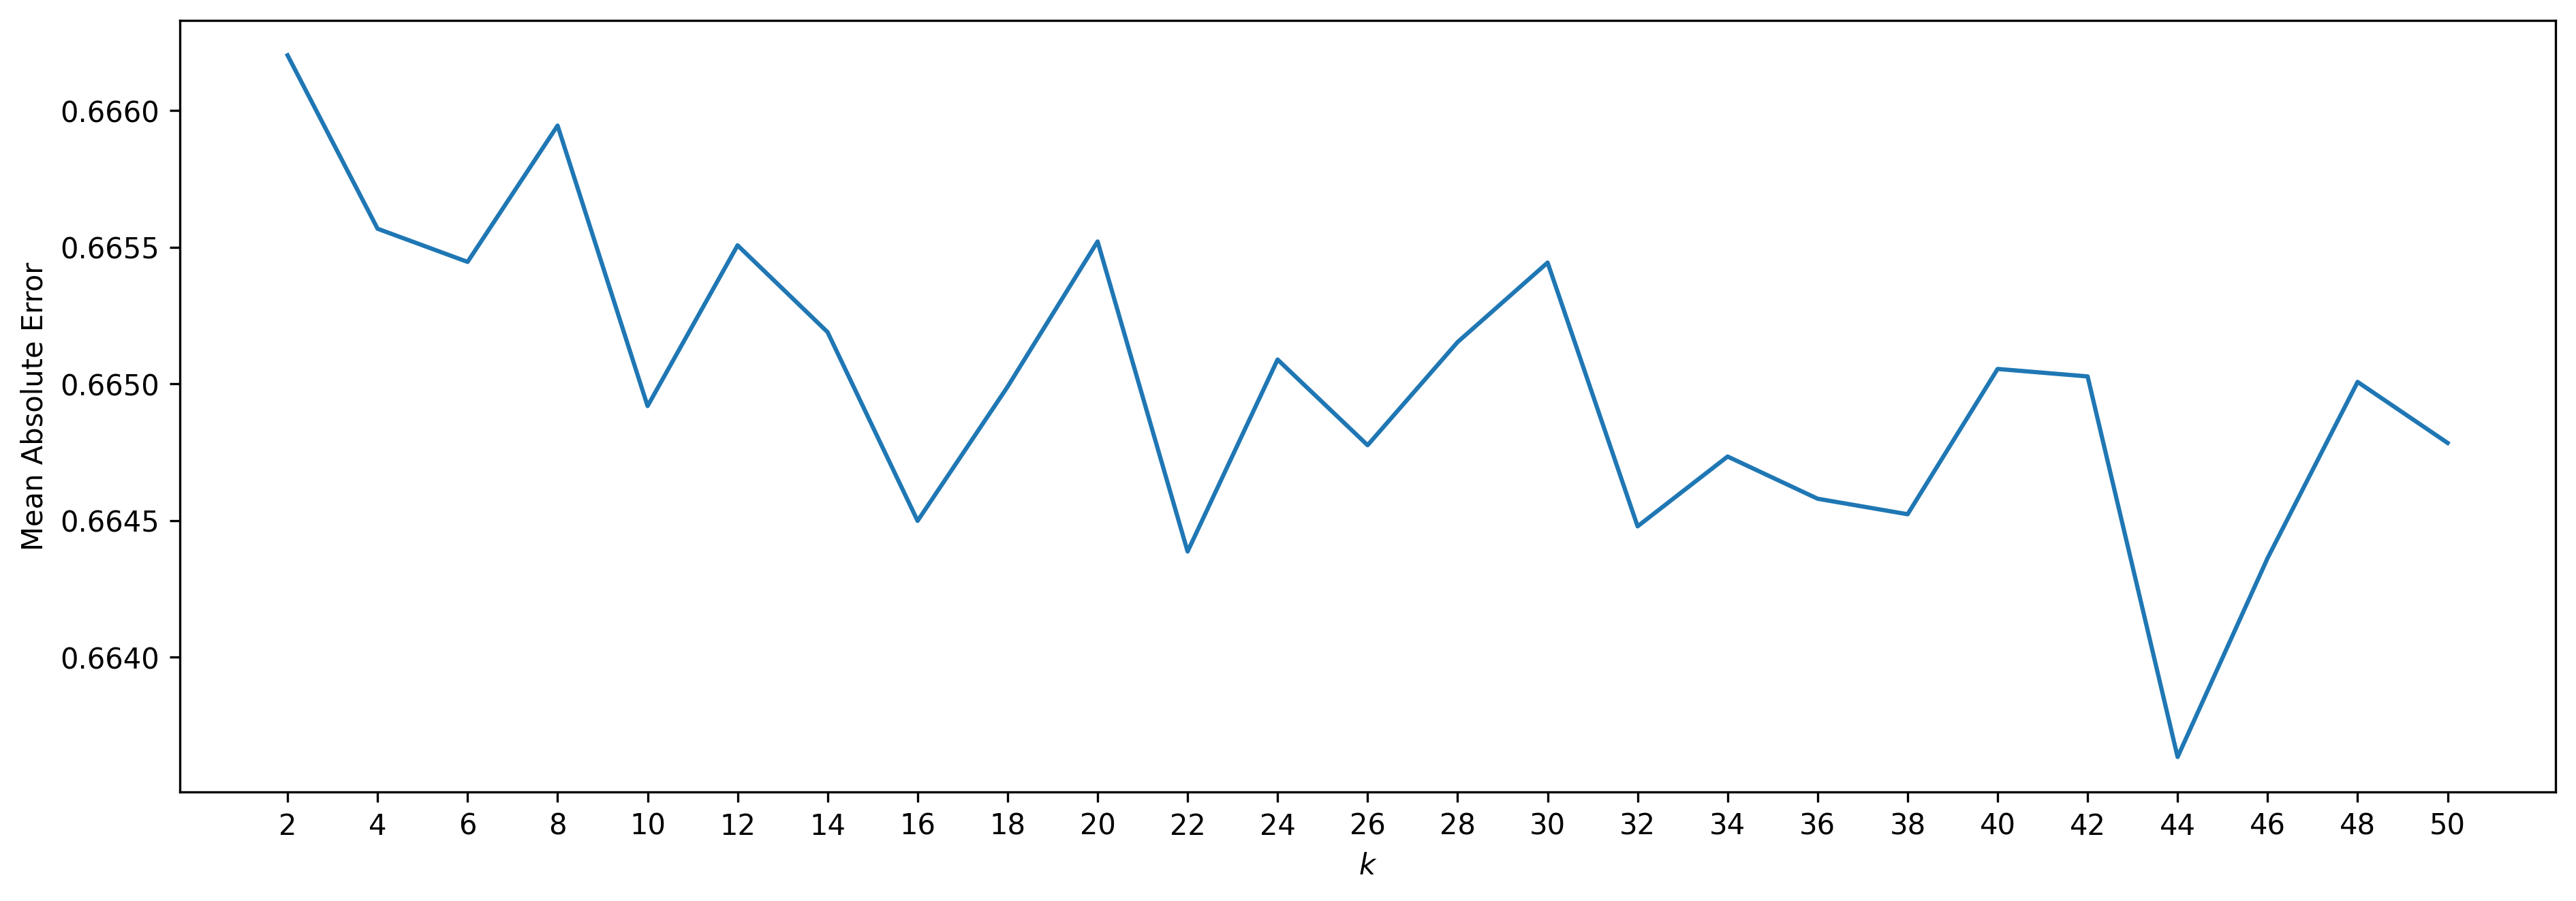

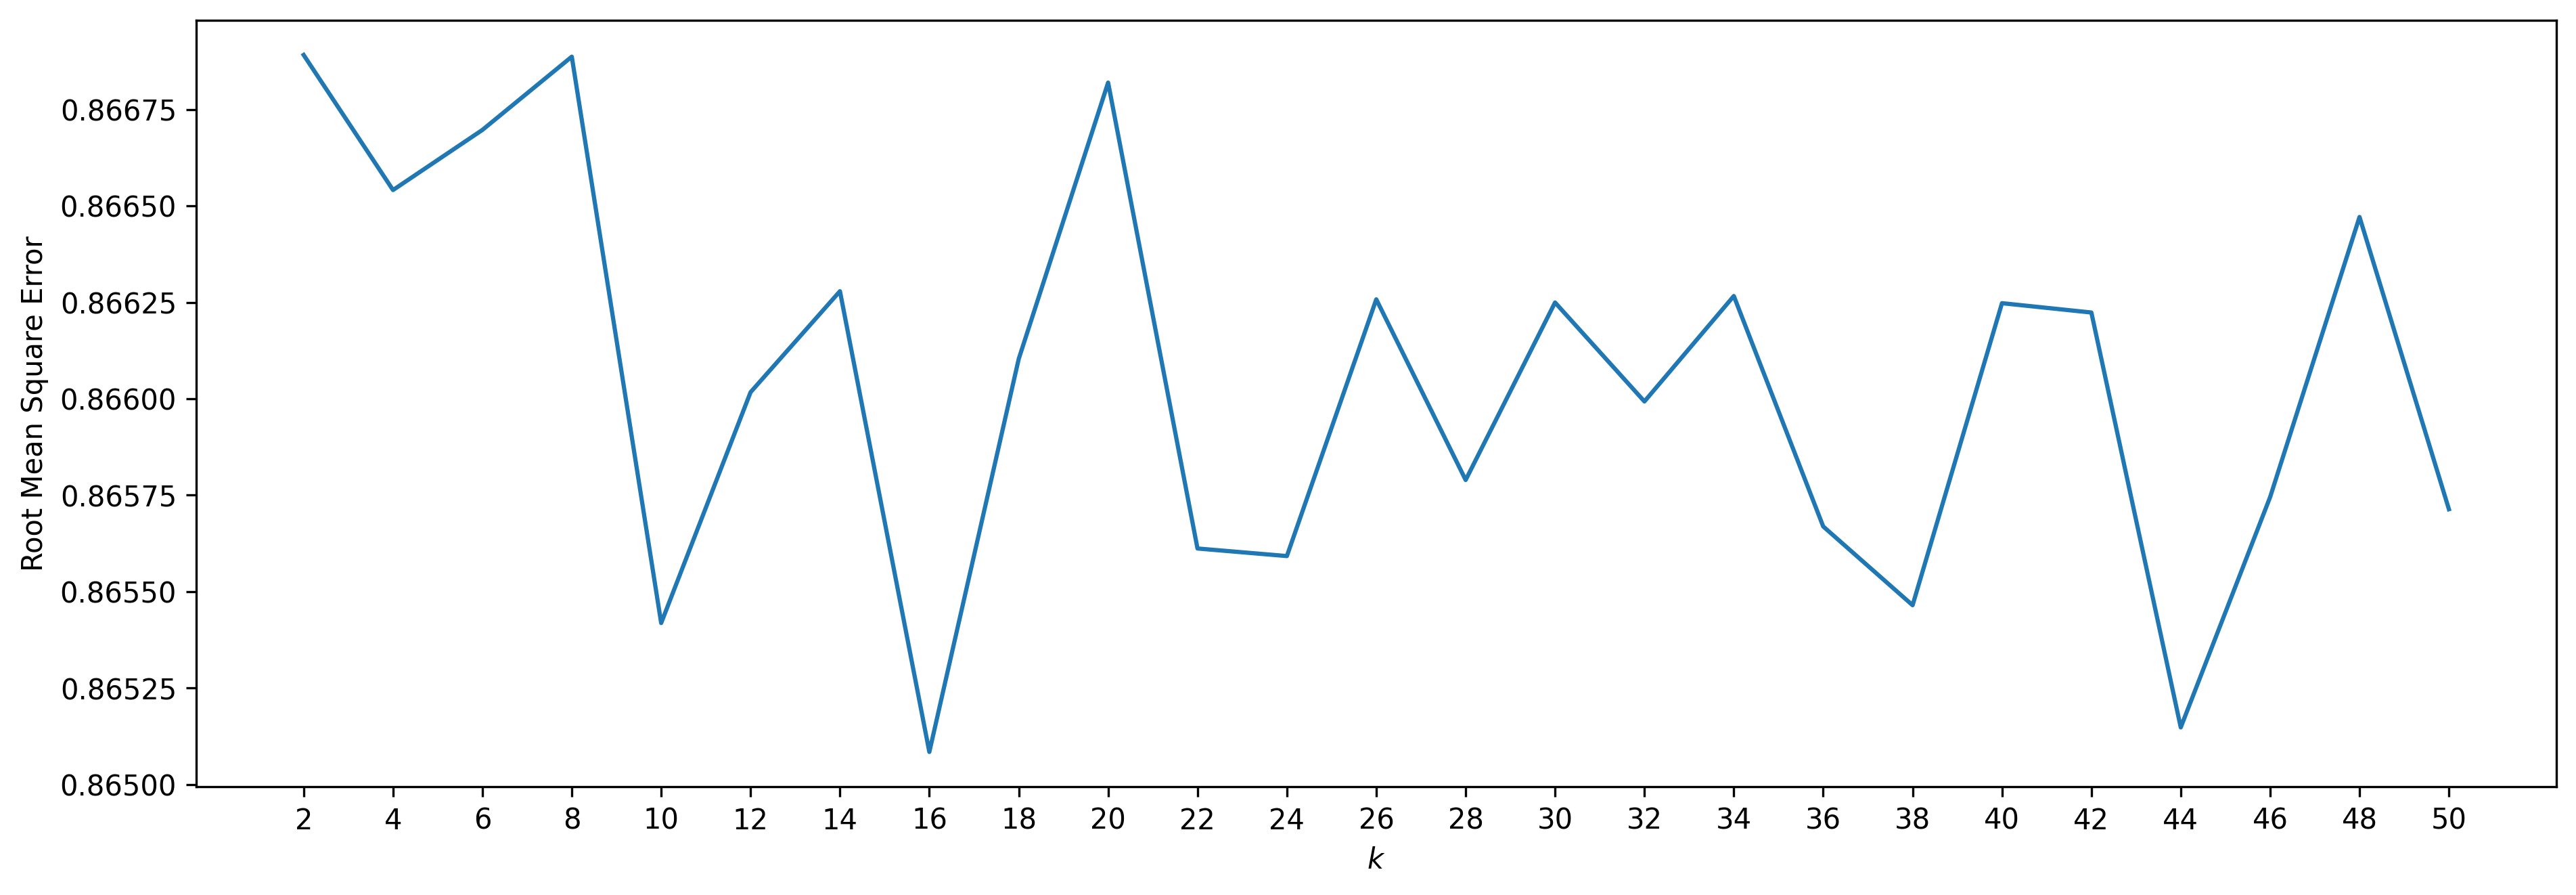

min mae= 0.6636348910410614 at k= 44
min rmse= 0.8650842406618571 at k= 16


In [13]:
from surprise import SVD

#MF with SVD on ratings dataset
mae_24, rmse_24 = collaborative_filtering('SVD', 50, ratings_dataset)


### QUESTION 26

10
20
30
40
50


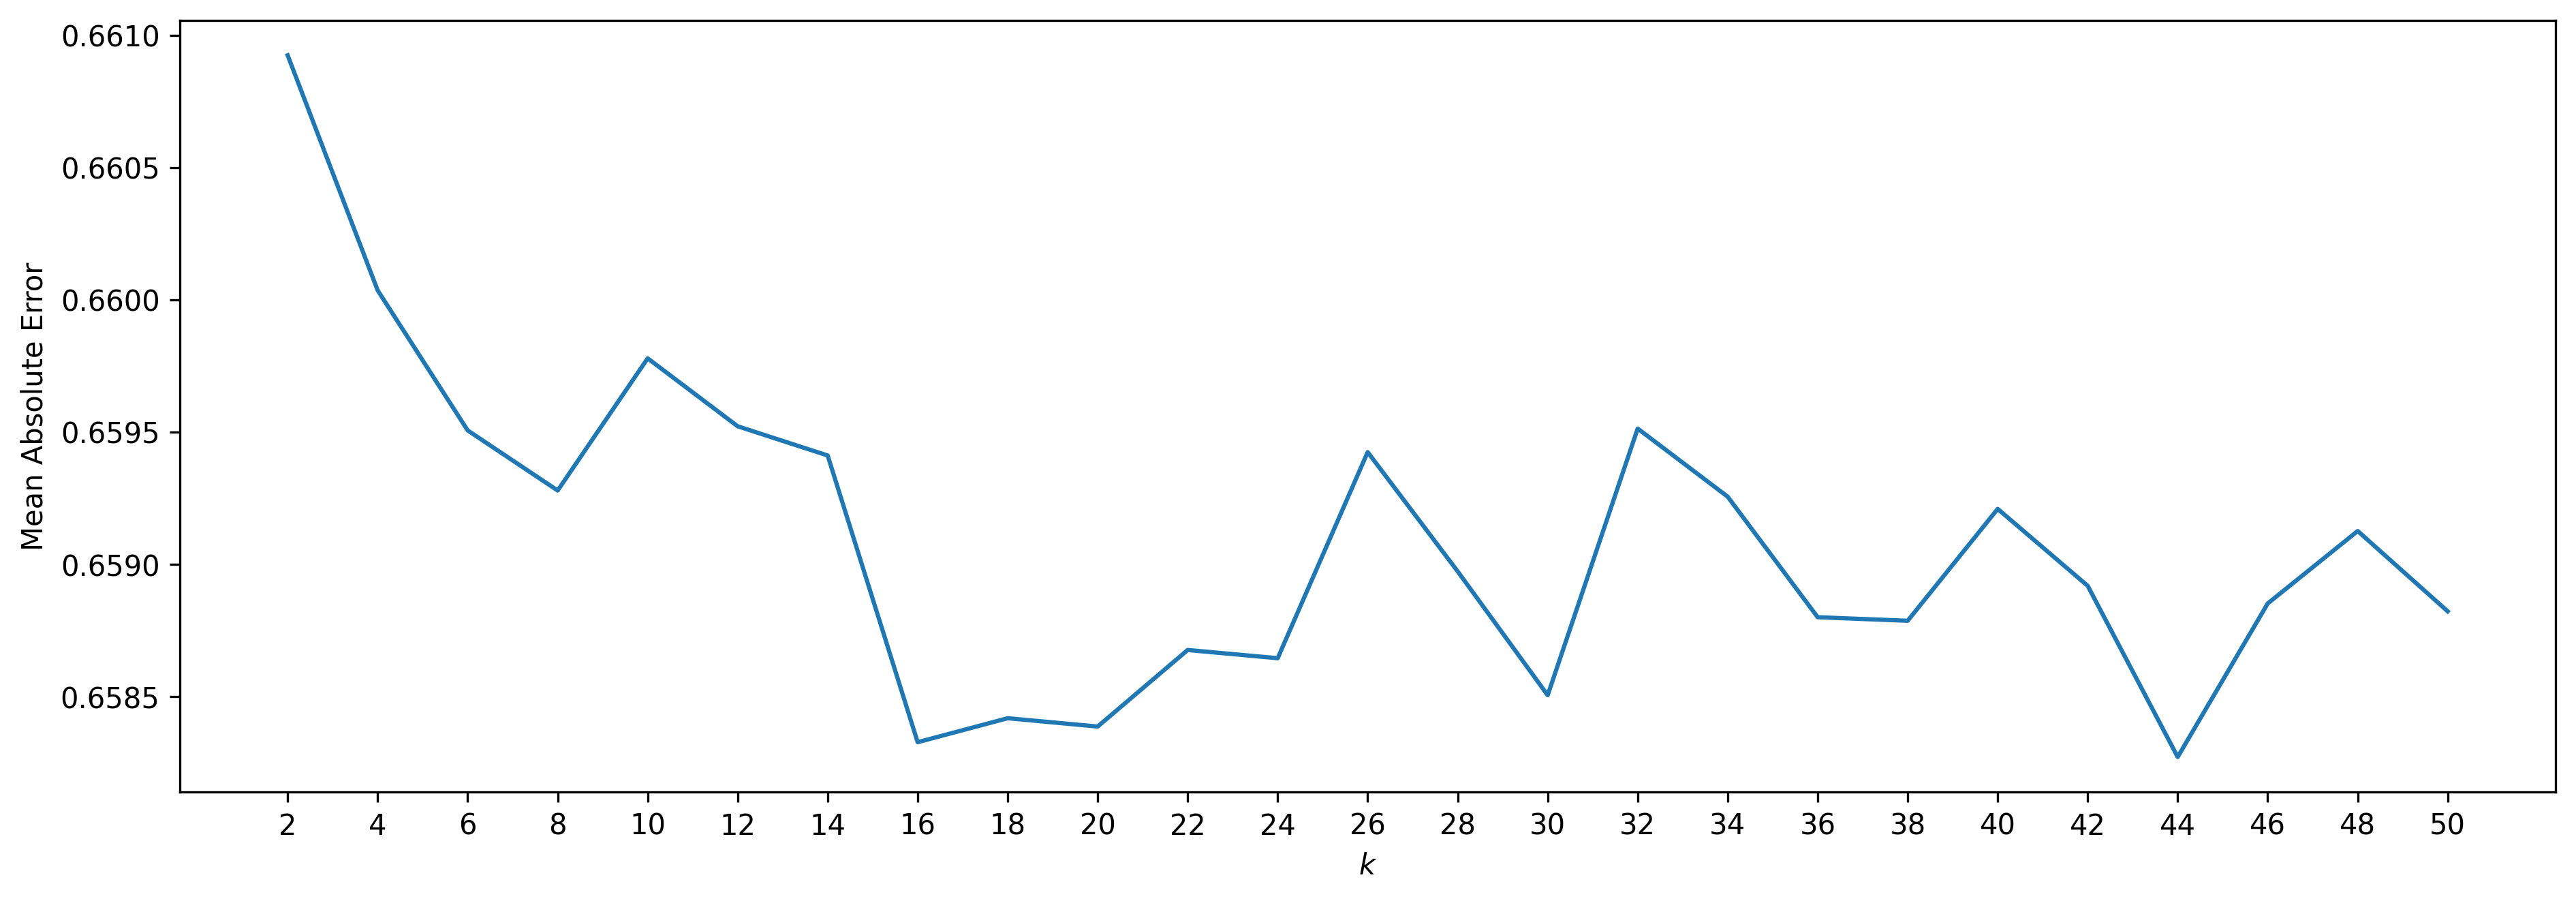

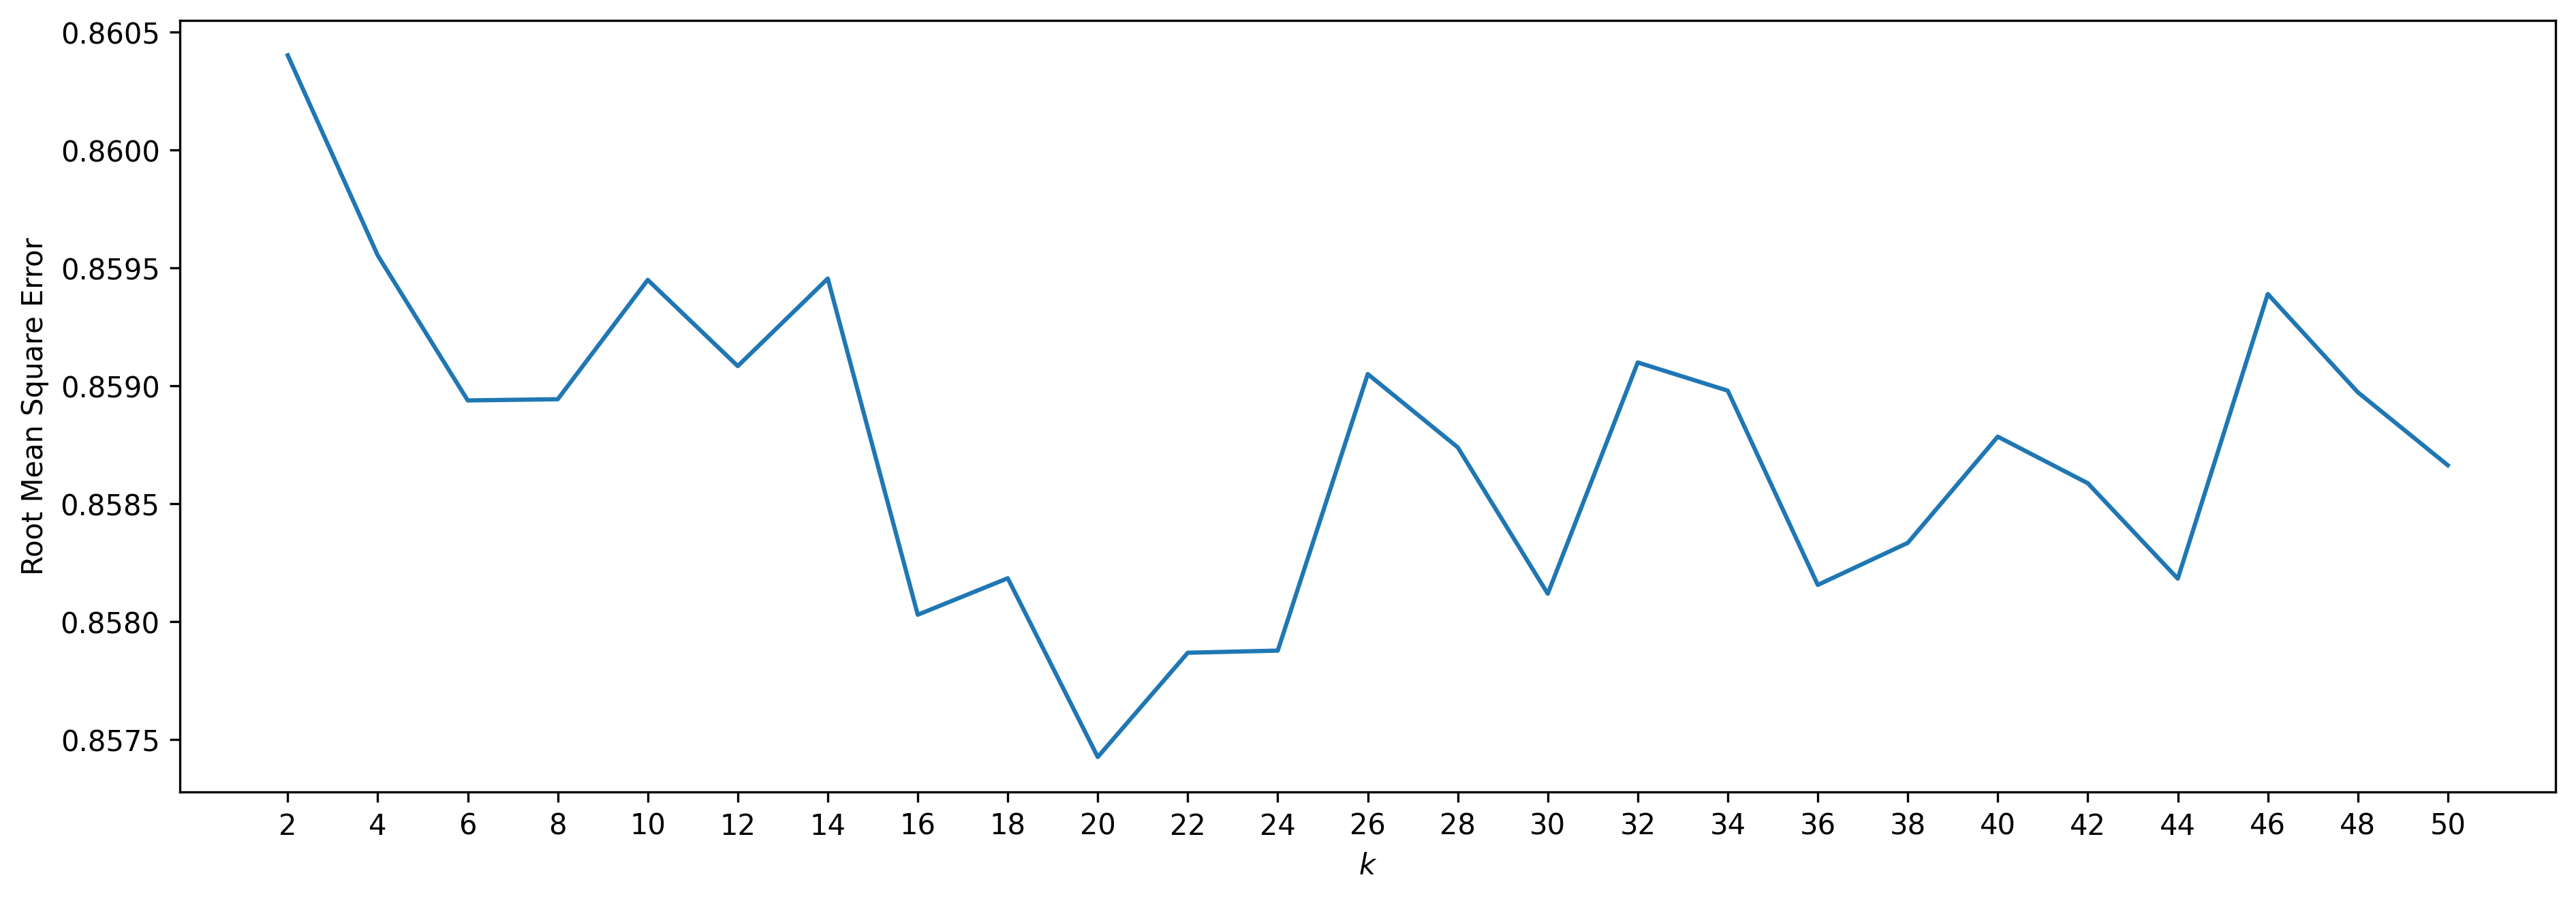

min mae= 0.6582724384771096 at k= 44
min rmse= 0.8574268443515687 at k= 20


In [ ]:
#MF with SVD on ratings dataset with popular trim
mae_26, rmse_26 = collaborative_filtering('SVD', 50, ratings_dataset, trim=popular)

### QUESTION 27


10
20
30
40
50


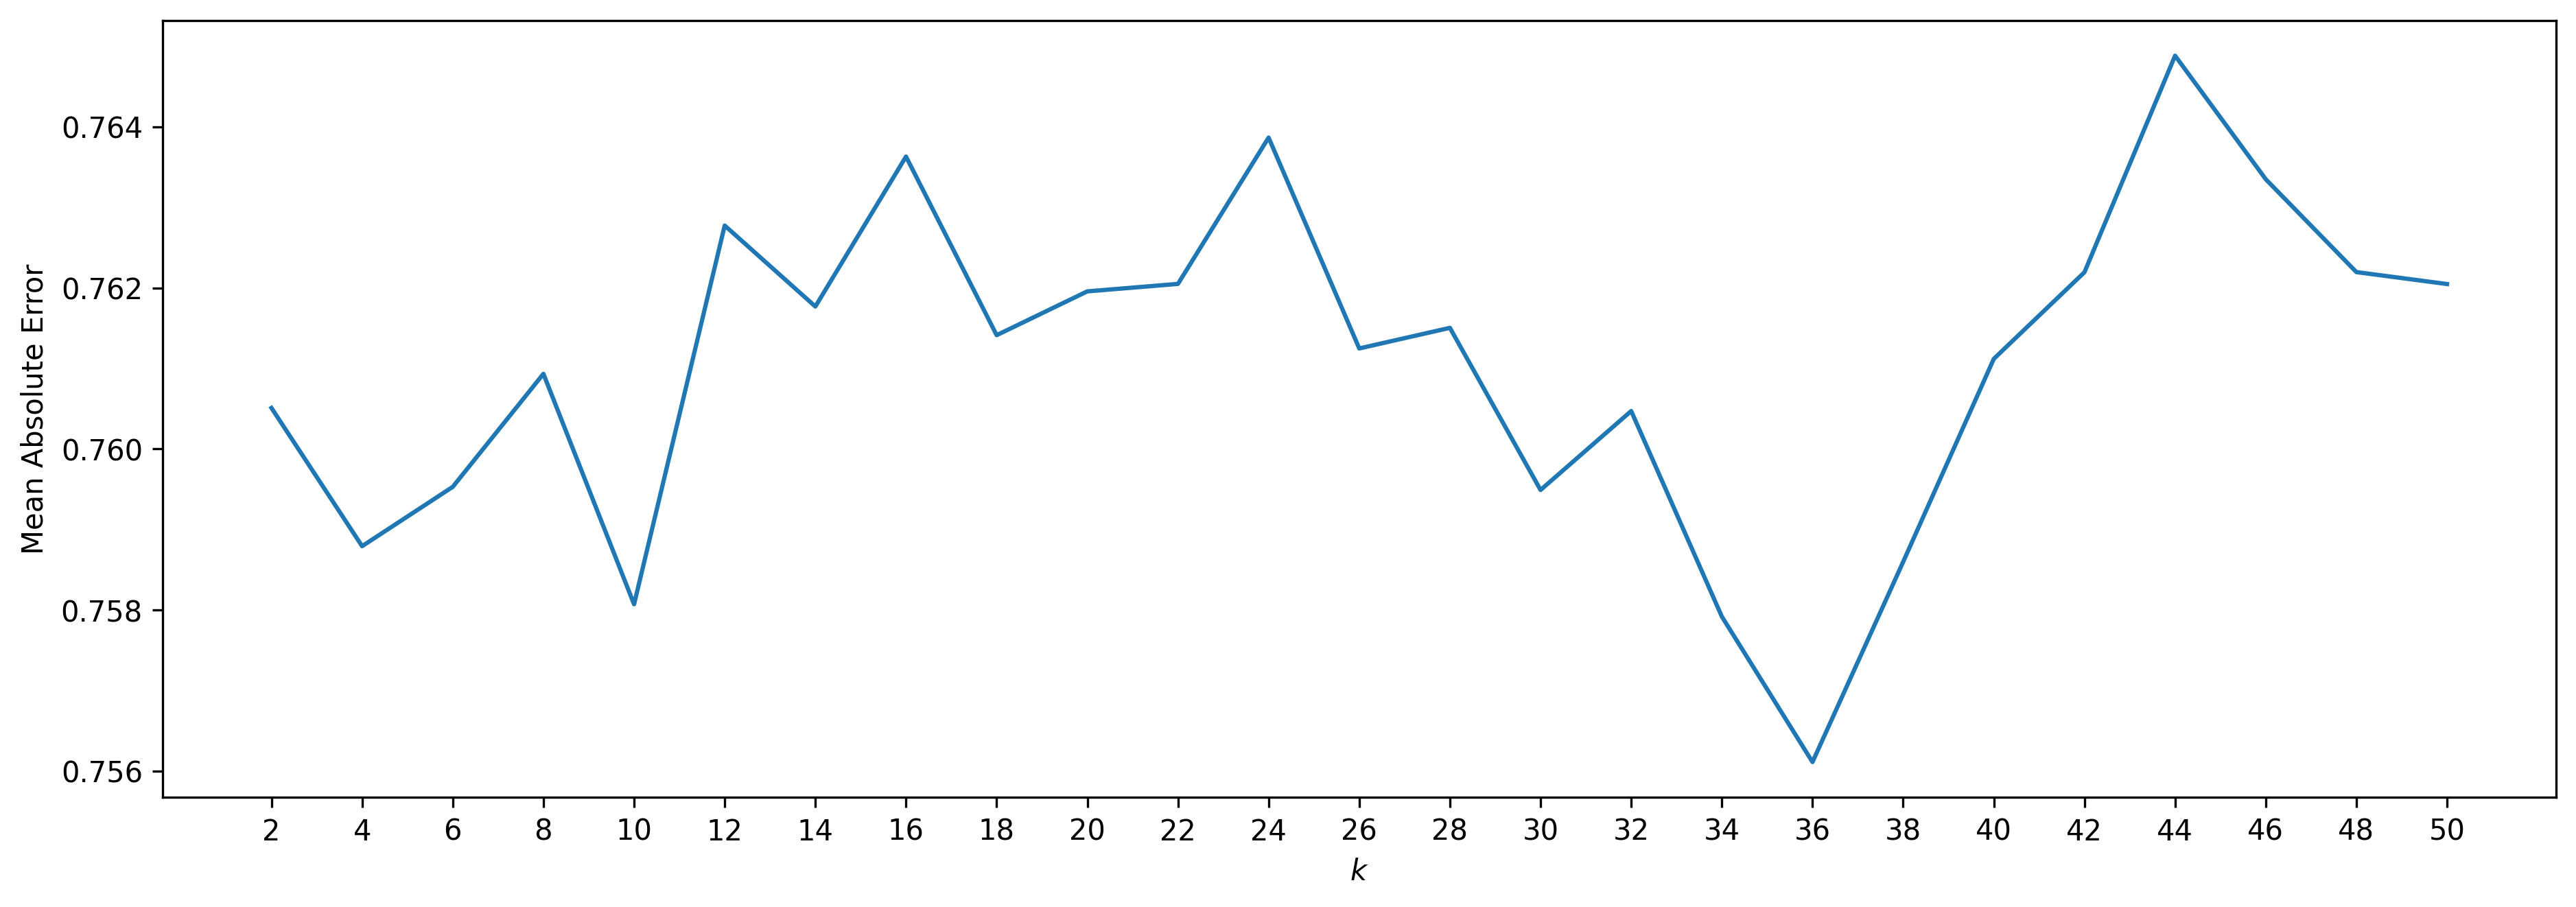

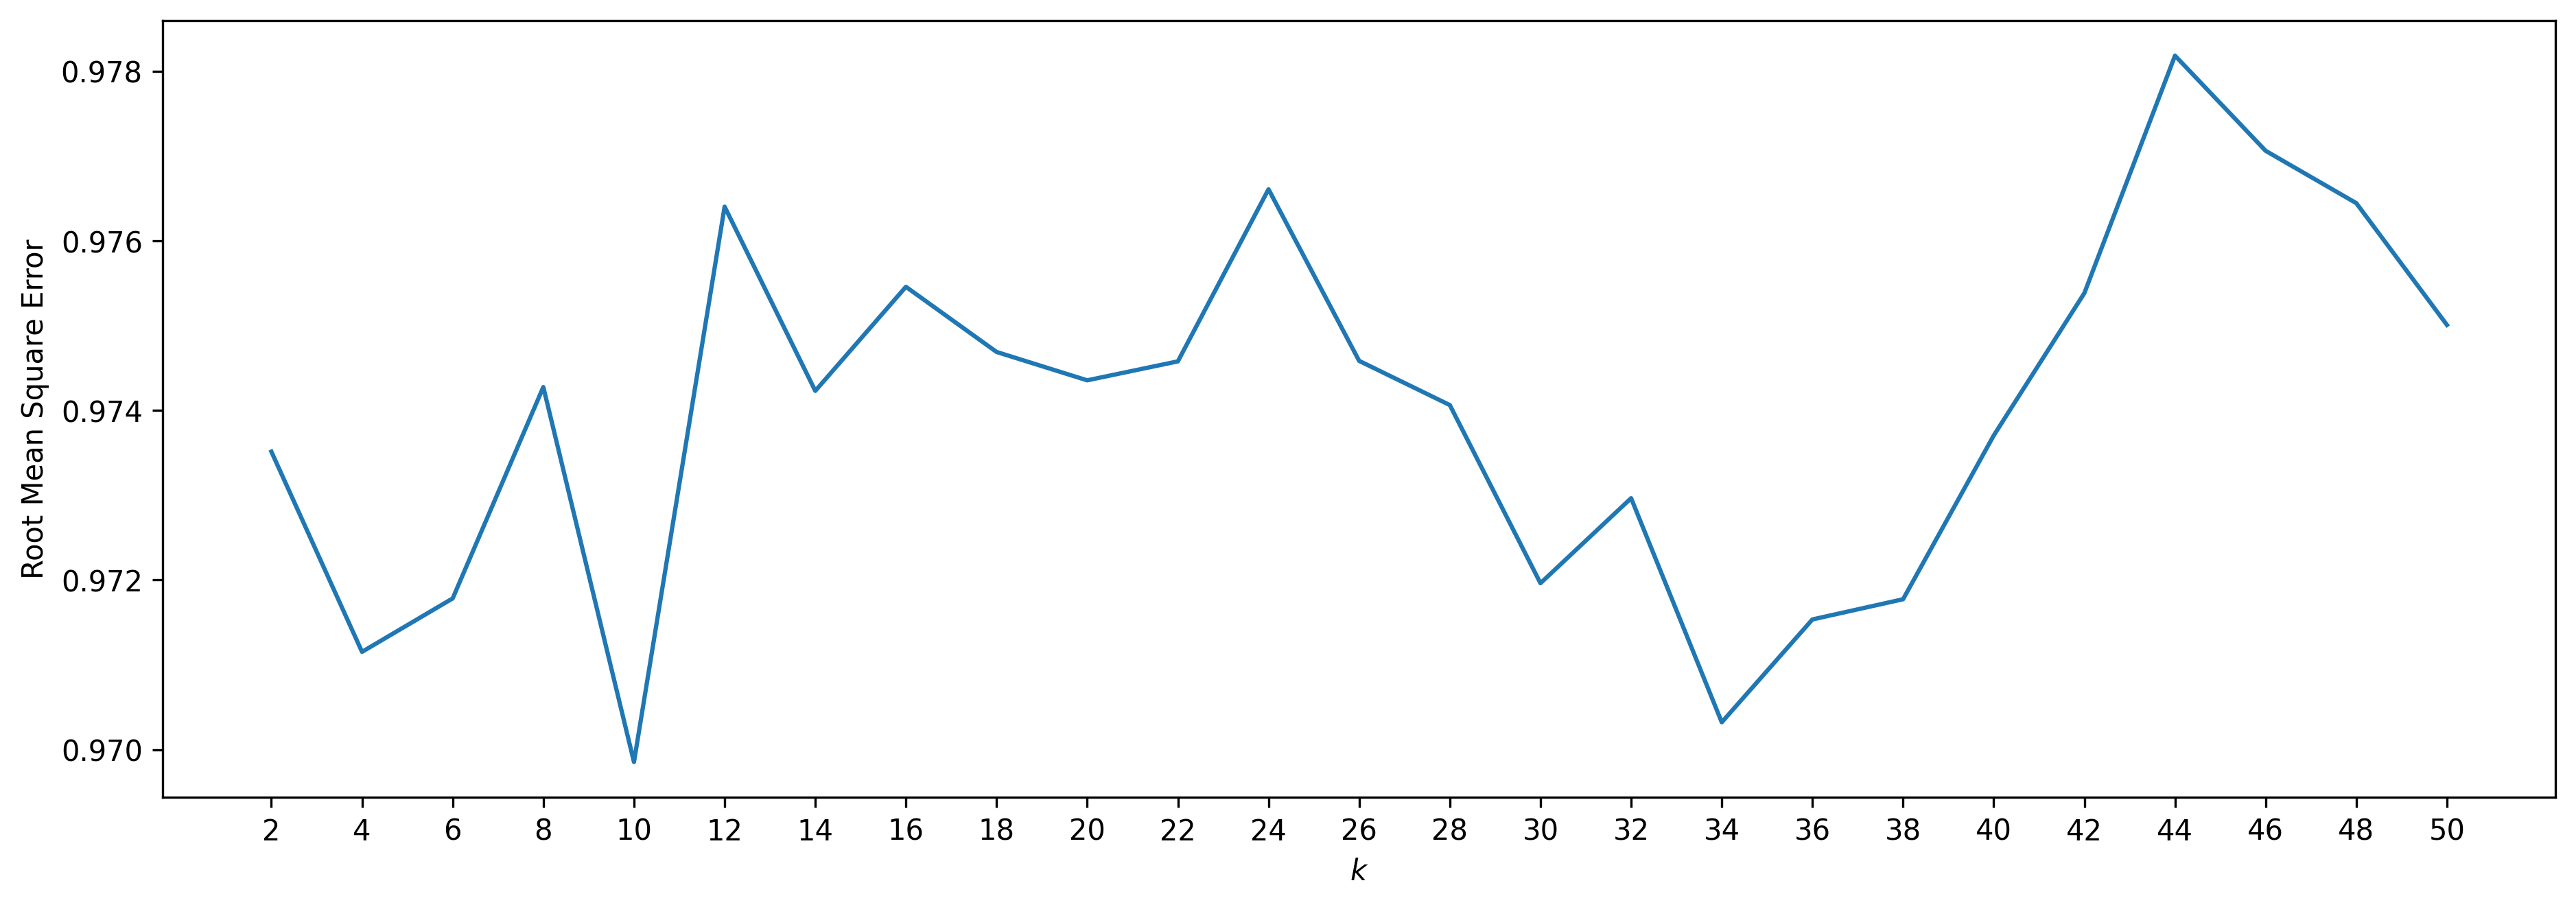

min mae= 0.7561137354337947 at k= 36
min rmse= 0.969853343922124 at k= 10


In [18]:
#MF with SVD on ratings dataset with unpopular trim
mae_27, rmse_27 = collaborative_filtering('SVD', 50, ratings_dataset, trim=unpopular)

### QUESTION 28

10
20
30
40
50


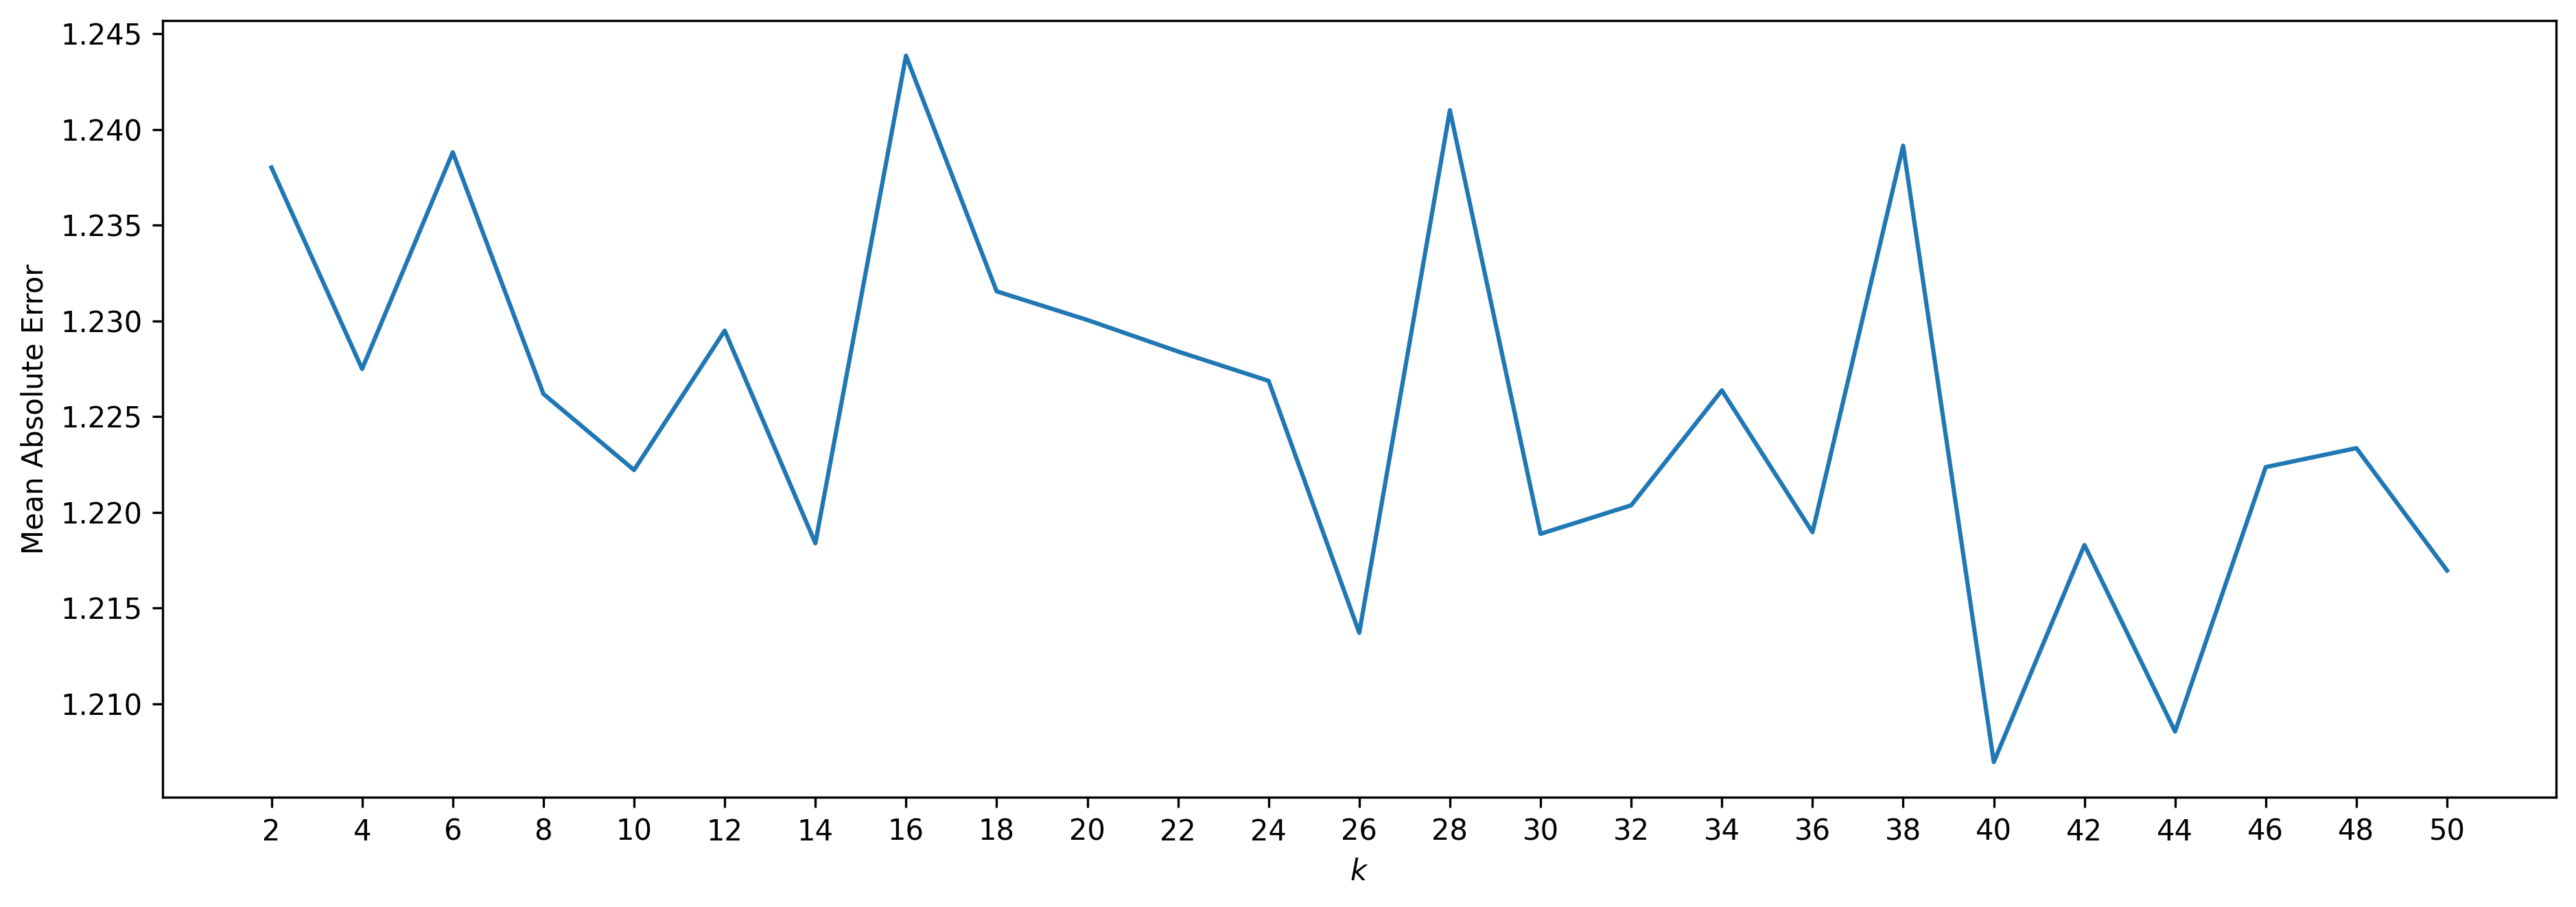

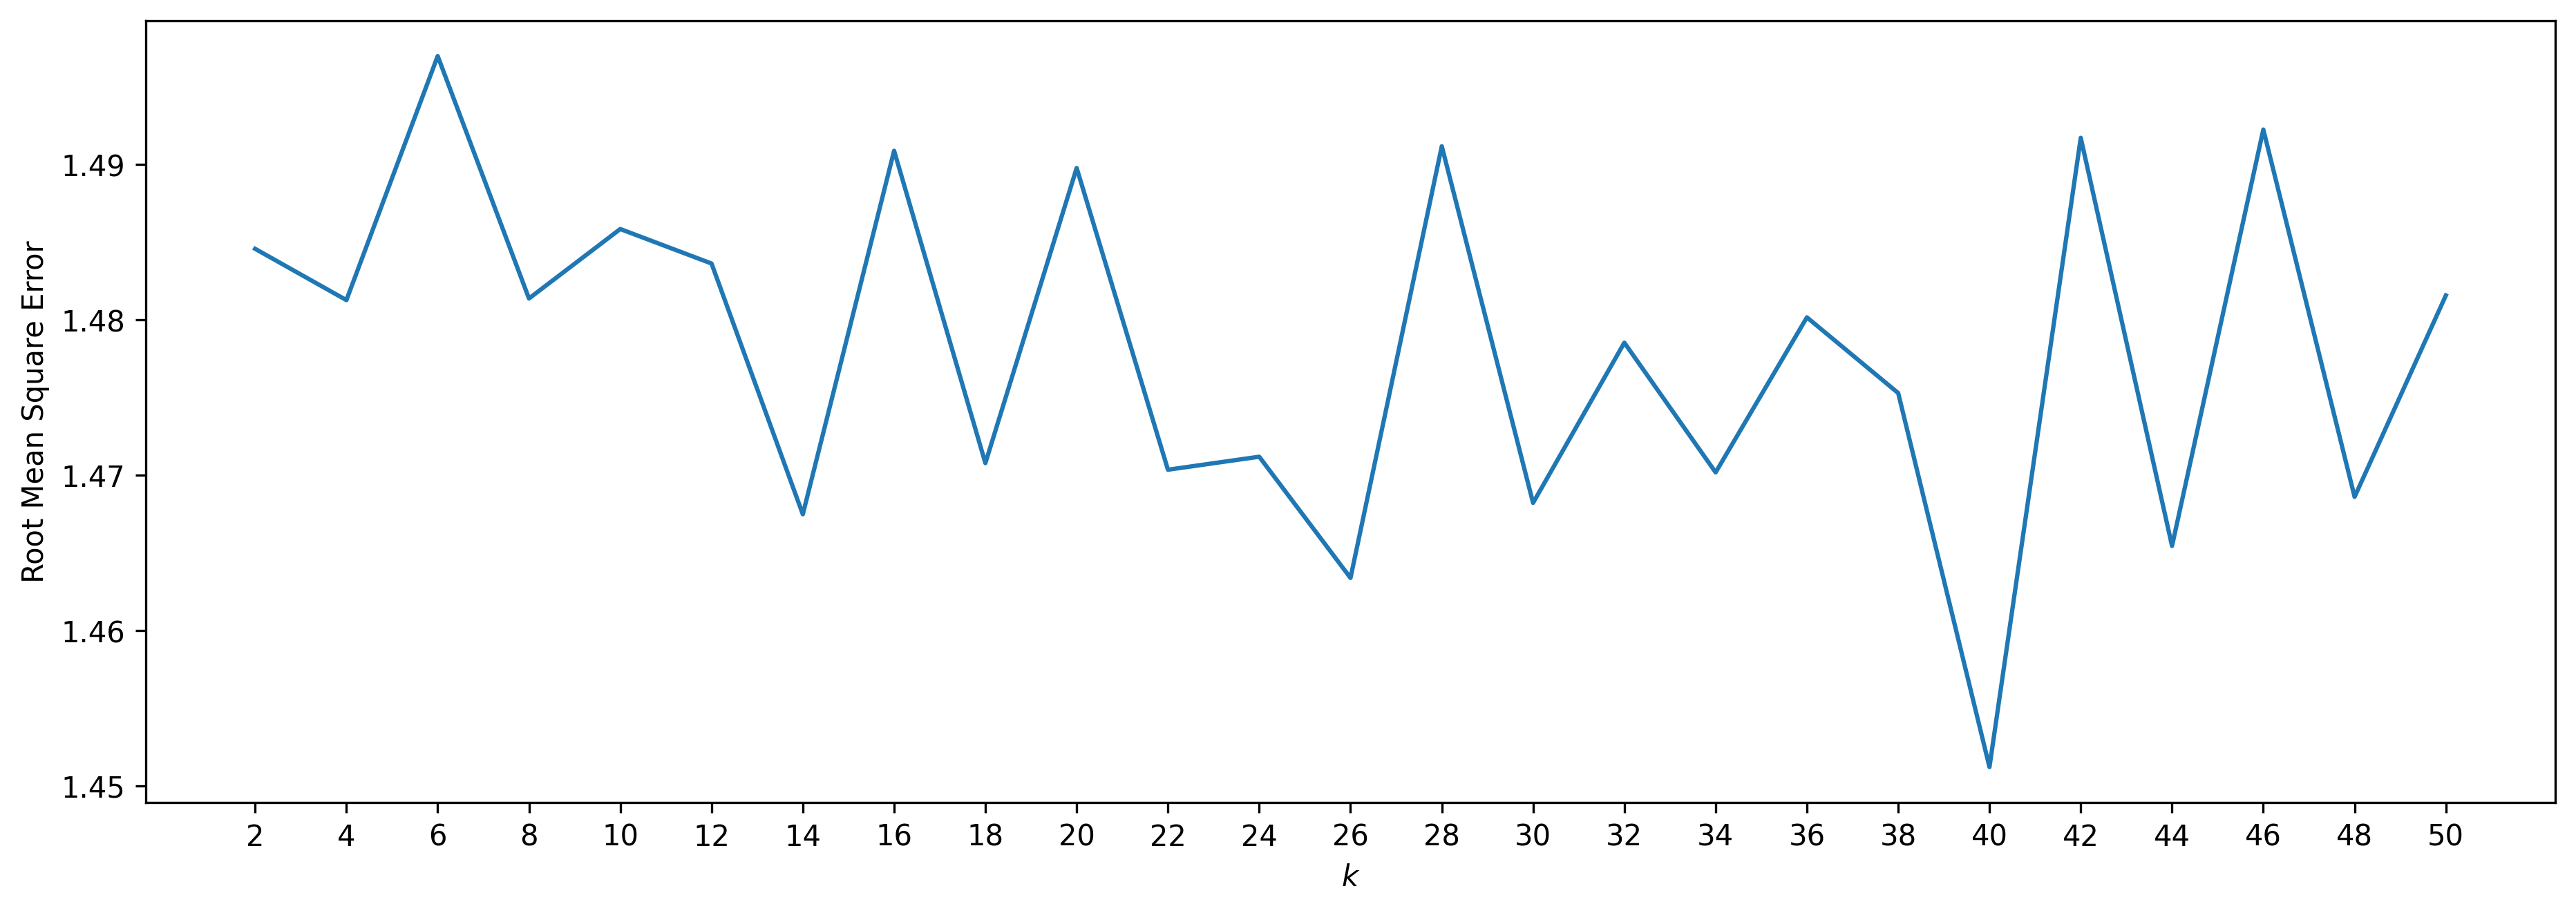

min mae= 1.2069505261362912 at k= 40
min rmse= 1.4512196447679404 at k= 40


In [19]:
#MF with SVD on ratings dataset with high-variance trim
mae_28, rmse_28 = collaborative_filtering('SVD', 50, ratings_dataset, trim=high_variance)

### QUESTION 29


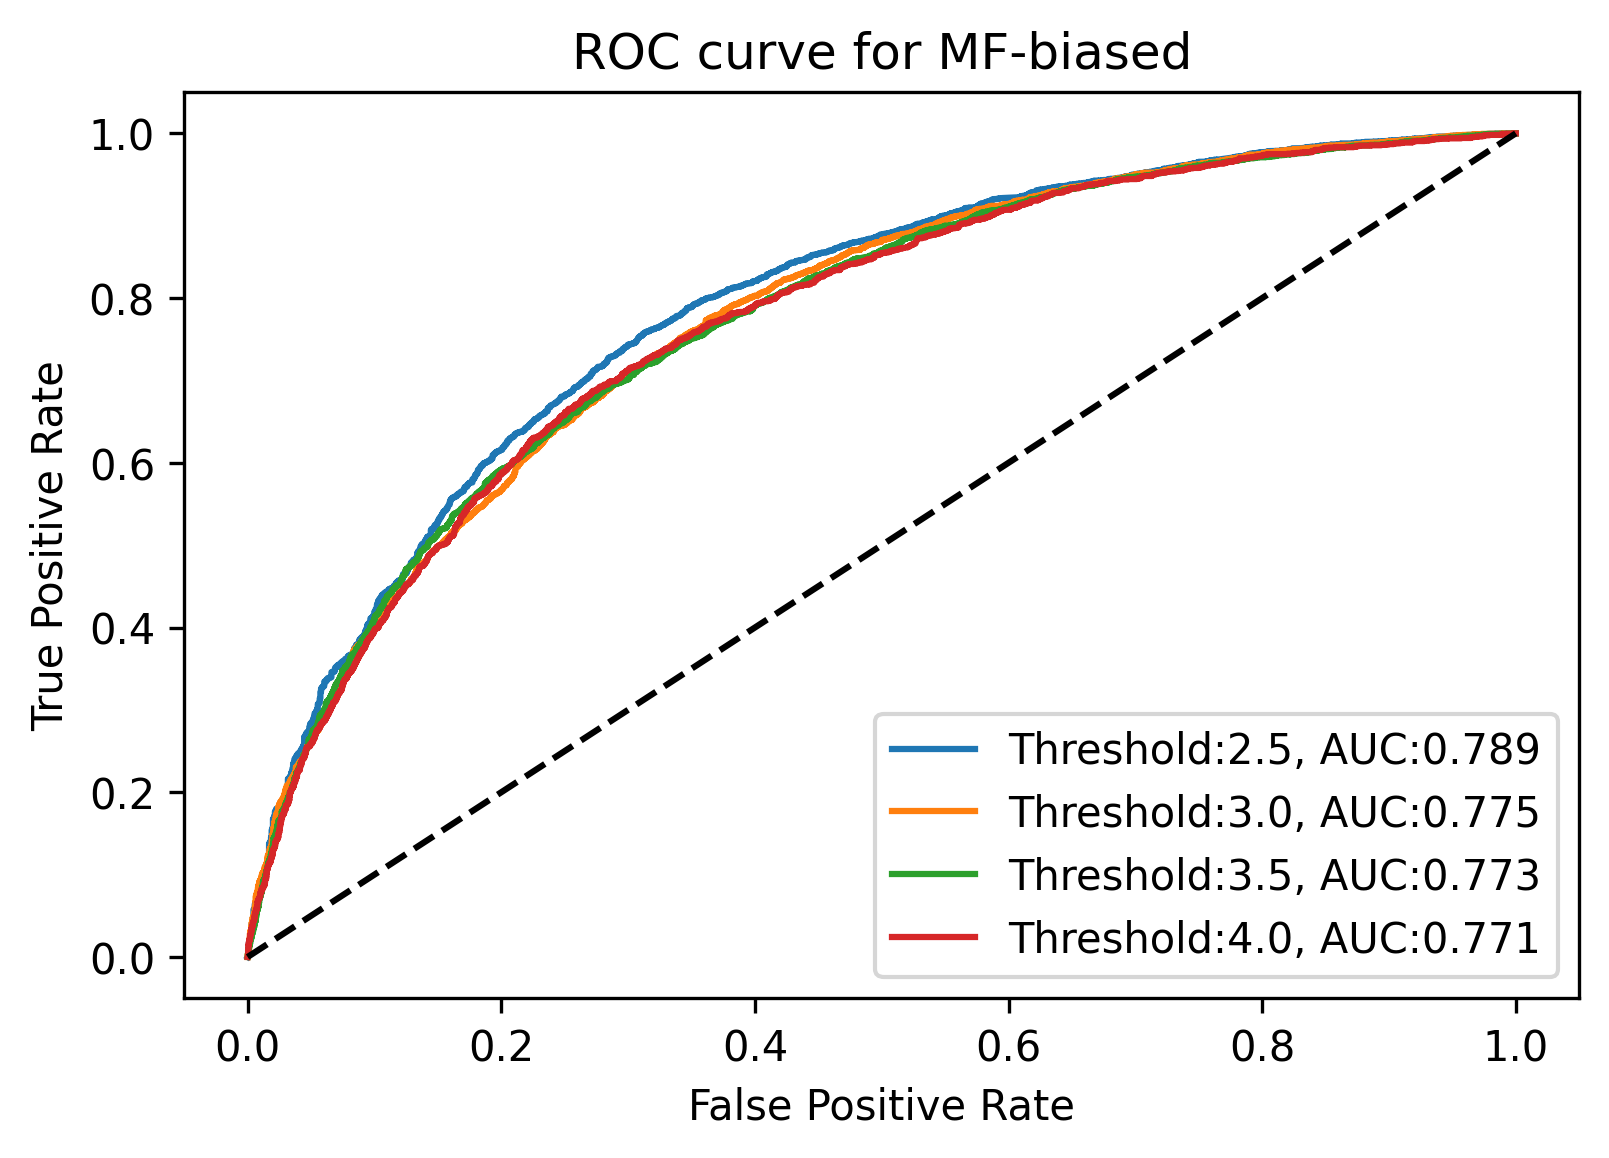

In [16]:
#AUC for MF with SVD on ratings dataset 
svd = SVD(32)
plot_roc(svd, ratings_dataset_df, 'MF-biased')

## Naive Collaborative Filter

In [ ]:
#Getting a dataset with the ratings specified as a function of the mean of all user ratings
ratings_dataset_naive = ratings_dataset_df.copy()
ratings_dataset_naive["predMean"] = np.zeros(len(ratings_dataset_naive), dtype=float)

for userId in np.unique(ratings_dataset_naive):
    ratings_dataset_naive.predMean[ratings_dataset_naive.userId==userId] = np.mean(ratings_dataset_naive.rating[ratings_dataset_naive.userId==userId])

G:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
from sklearn.model_selection import KFold

#designing a naive filter
def Naive_filter(data, trim=None):
    kf = KFold(n_splits=10)
    rmse = 0
    kf_count = 0
    for trainset, testset in kf.split(data):
        if trim is not None:
            testset = list(sorted(set(testset).intersection(trim)))
        if len(testset)>0:
            rmse += np.sqrt(np.mean((data.rating[testset]-data.predMean[testset])**2))
            kf_count += 1
    return rmse/kf_count

### Question 30

In [ ]:
#Naive filter on ratings dataset
rmse_30 = Naive_filter(ratings_dataset_naive)
print(rmse_30)

0.9341694523212525


### Question 31

In [ ]:
#Naive filter on ratings dataset with popular trim
rmse_31 = Naive_filter(ratings_dataset_naive, trim=list_pop)
print(rmse_31)

0.9646429133544488


### Question 32

In [ ]:
#Naive filter on ratings dataset with unpopular trim
rmse_32 = Naive_filter(ratings_dataset_naive, trim=list_unpop)
print(rmse_32)

0.9688908623797408


### Question 33

In [ ]:
#Naive filter on ratings dataset with high-variance trim
rmse_33 = Naive_filter(ratings_dataset_naive, trim=list_var)
print(rmse_33)

1.1382641890338359


### Question 34

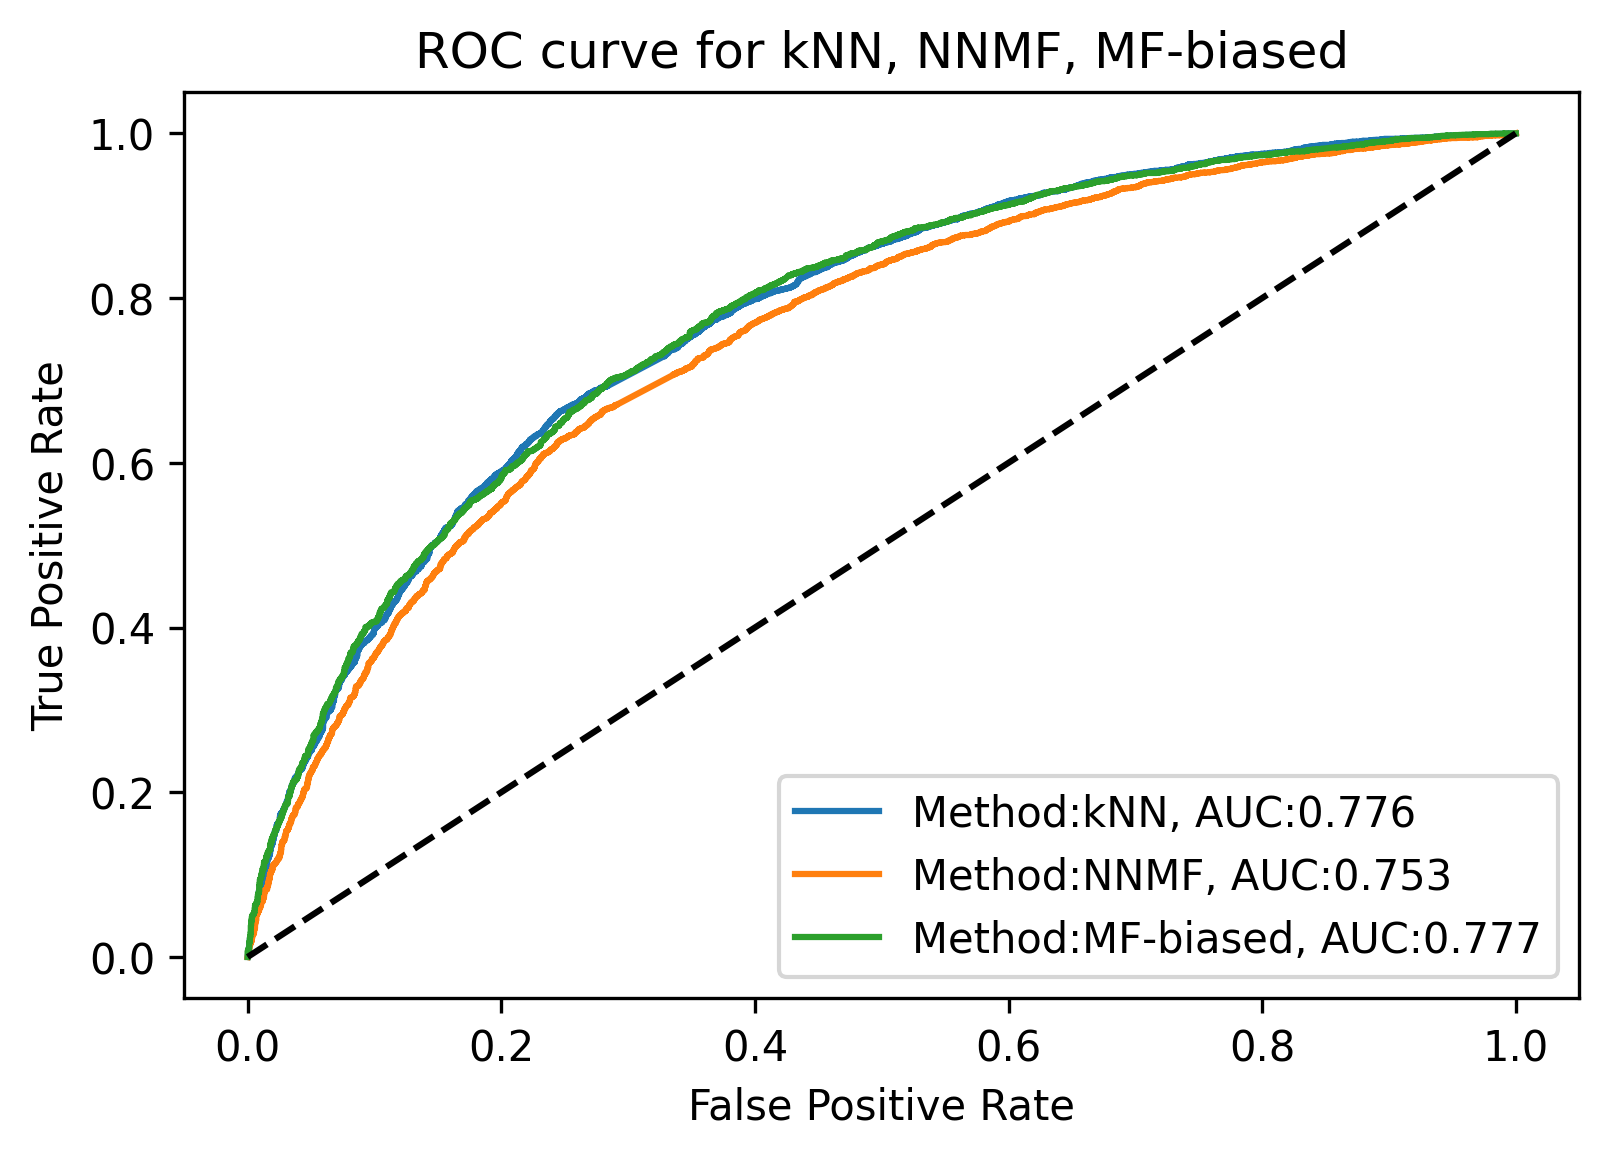

In [17]:
from surprise import SVD, NMF

#AUC for KNN, NMF and MF with SVD

m_list = ['kNN', 'NNMF', 'MF-biased']

plt.figure(dpi=300)

for method in m_list:
    ratings_dataset = Dataset.load_from_df(ratings_dataset_df[['userId', 'movieId', 'rating']], reader=reader)
    train, test = train_test_split(ratings_dataset, test_size=0.1, random_state=42)
    #K-Nearest neigbours
    if method == 'kNN':
        algo = KNNWithMeans(20, sim_options=sim_options, verbose=False)
    #Non Negative Matrix Factorization
    if method =='NNMF':
        algo = NMF(n_factors = 18)
    #Matrix Factorization with Support Vector Decomposition
    if method =='MF-biased':
        algo = SVD(32, biased=True)

    model = algo.fit(train)
    res = model.test(test)
    y_true = [pred.r_ui for pred in res] 
    val = 3
    y_true = [1 if y>val else 0 for y in y_true]
    y_score = [pred.est for pred in res]
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label='Method:%s, AUC:%.3f' % (method, roc_auc))

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC curve for kNN, NNMF, MF-biased')
plt.show()

## Ranking

### Question 35

In [19]:
#Calculating precision and recall
def calc_precision_recall(pred, t, threshold=3):
    precision = 0
    recall = 0
    user_count = 0
    pred_user_dict = defaultdict(list)
    for userId, movieId, rating, est, _ in pred:
        pred_user_dict[userId].append((movieId, rating, est))
  
    for user_idx in pred_user_dict.keys():
        list_tmp = np.array(pred_user_dict[user_idx])
        if len(list_tmp)>=t:
            G_set = set(list_tmp[:,0][list_tmp[:,1]>=threshold])
            S_set = set(list_tmp[:,0][np.argsort(list_tmp[:,2])[-t:]])
            if len(G_set)>0:
                precision += len(G_set.intersection(S_set))/len(S_set)
                recall += len(G_set.intersection(S_set))/len(G_set)
                user_count += 1
    precision = precision/user_count
    recall = recall/user_count
    return precision, recall

In [20]:
#Model for calculating precision and recall
def calc_model_precision_recall(method, dataset, threshold=3):
    t_max=25
    precision_list = np.zeros(t_max)
    recall_list = np.zeros(t_max)

    for t in range(1, t_max+1):
        kf = KFold(10)
        for train, test in kf.split(dataset):
            model = method.fit(train)
            pred = model.test(test)
            precision, recall = calc_precision_recall(pred, t, threshold=threshold)

            precision_list[t-1] += precision
            recall_list[t-1] += recall
        print('t=', t, ' is done.')

    precision_list = precision_list/10
    recall_list = recall_list/10
    return precision_list, recall_list

In [23]:
#Plotting function
def plot_curve(xs, ys, xlabel, ylabel, title):
    plt.figure(dpi=300)
    plt.plot(xs, ys)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

### Question 36

In [ ]:
#Precision and Recall for KNN
KNN_model = KNNWithMeans(20, sim_options={'name': 'pearson'}, verbose=False)
precision_KNN, recall_KNN = calc_model_precision_recall(KNN_model, ratings_dataset)

t= 1  is done.
t= 2  is done.
t= 3  is done.
t= 4  is done.
t= 5  is done.
t= 6  is done.
t= 7  is done.
t= 8  is done.
t= 9  is done.
t= 10  is done.
t= 11  is done.
t= 12  is done.
t= 13  is done.
t= 14  is done.
t= 15  is done.
t= 16  is done.
t= 17  is done.
t= 18  is done.
t= 19  is done.
t= 20  is done.
t= 21  is done.
t= 22  is done.
t= 23  is done.
t= 24  is done.
t= 25  is done.


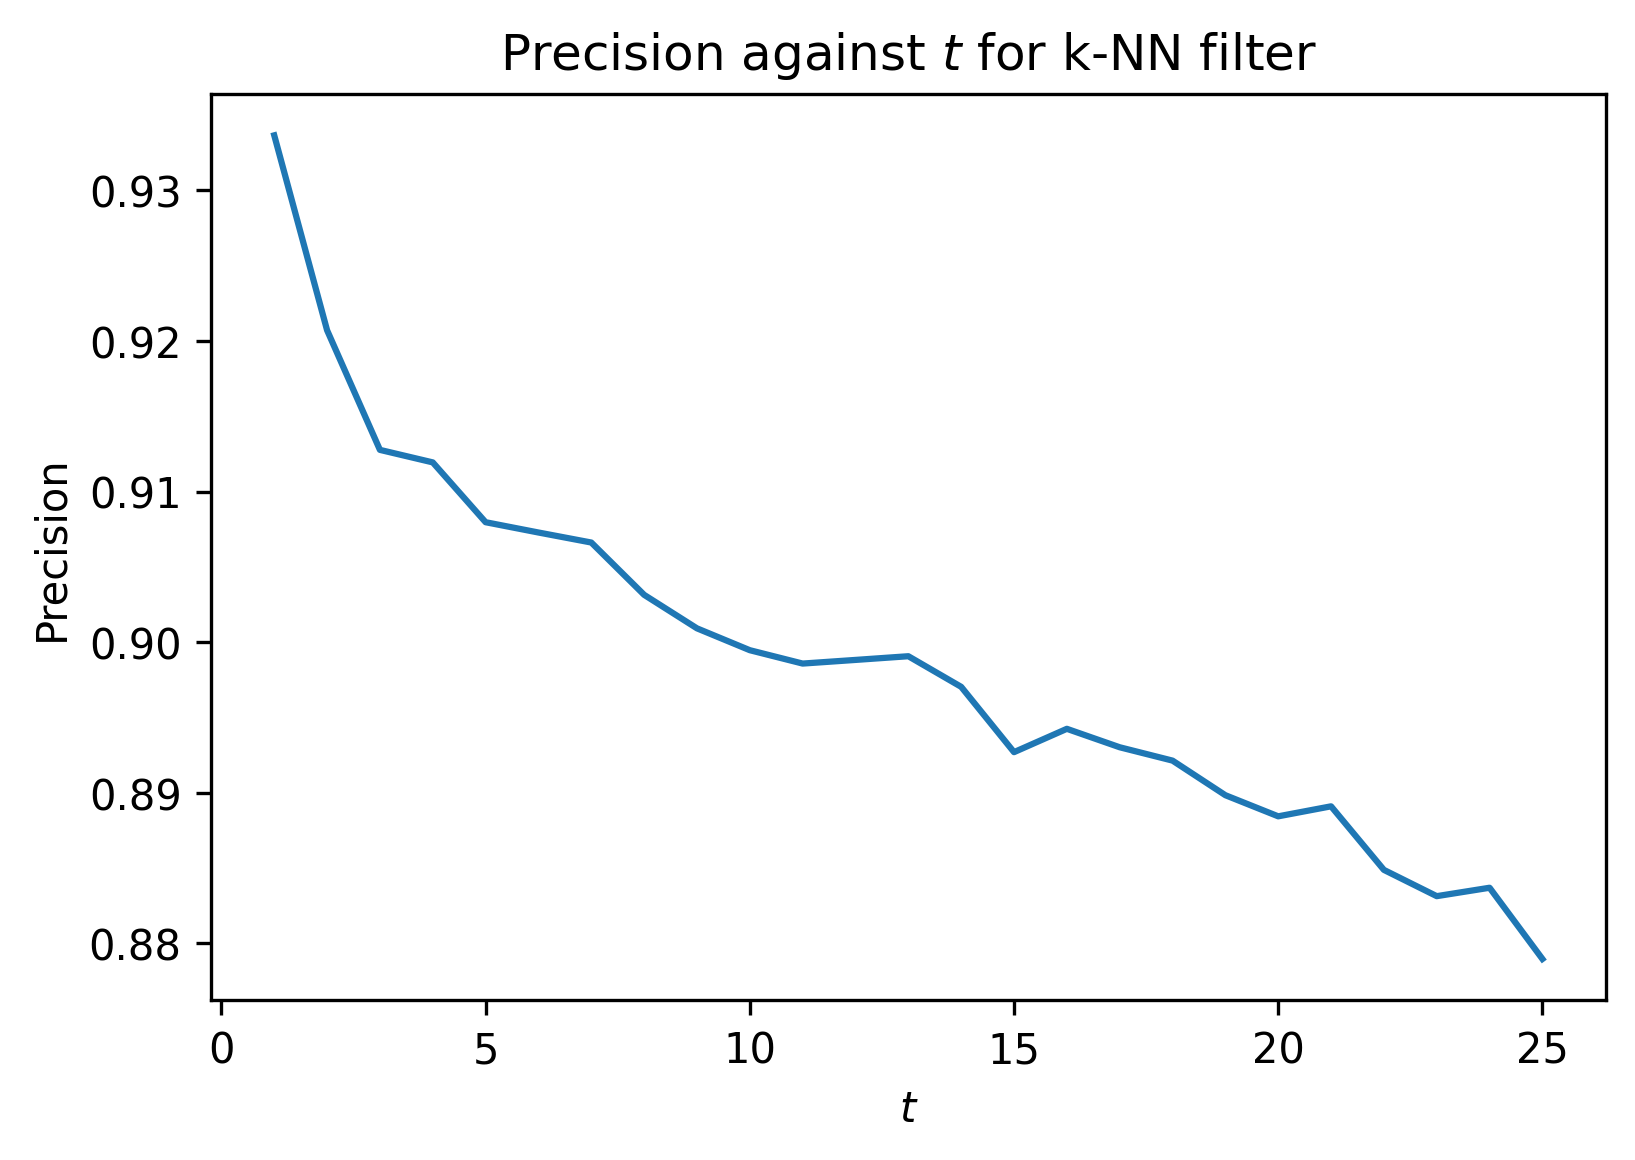

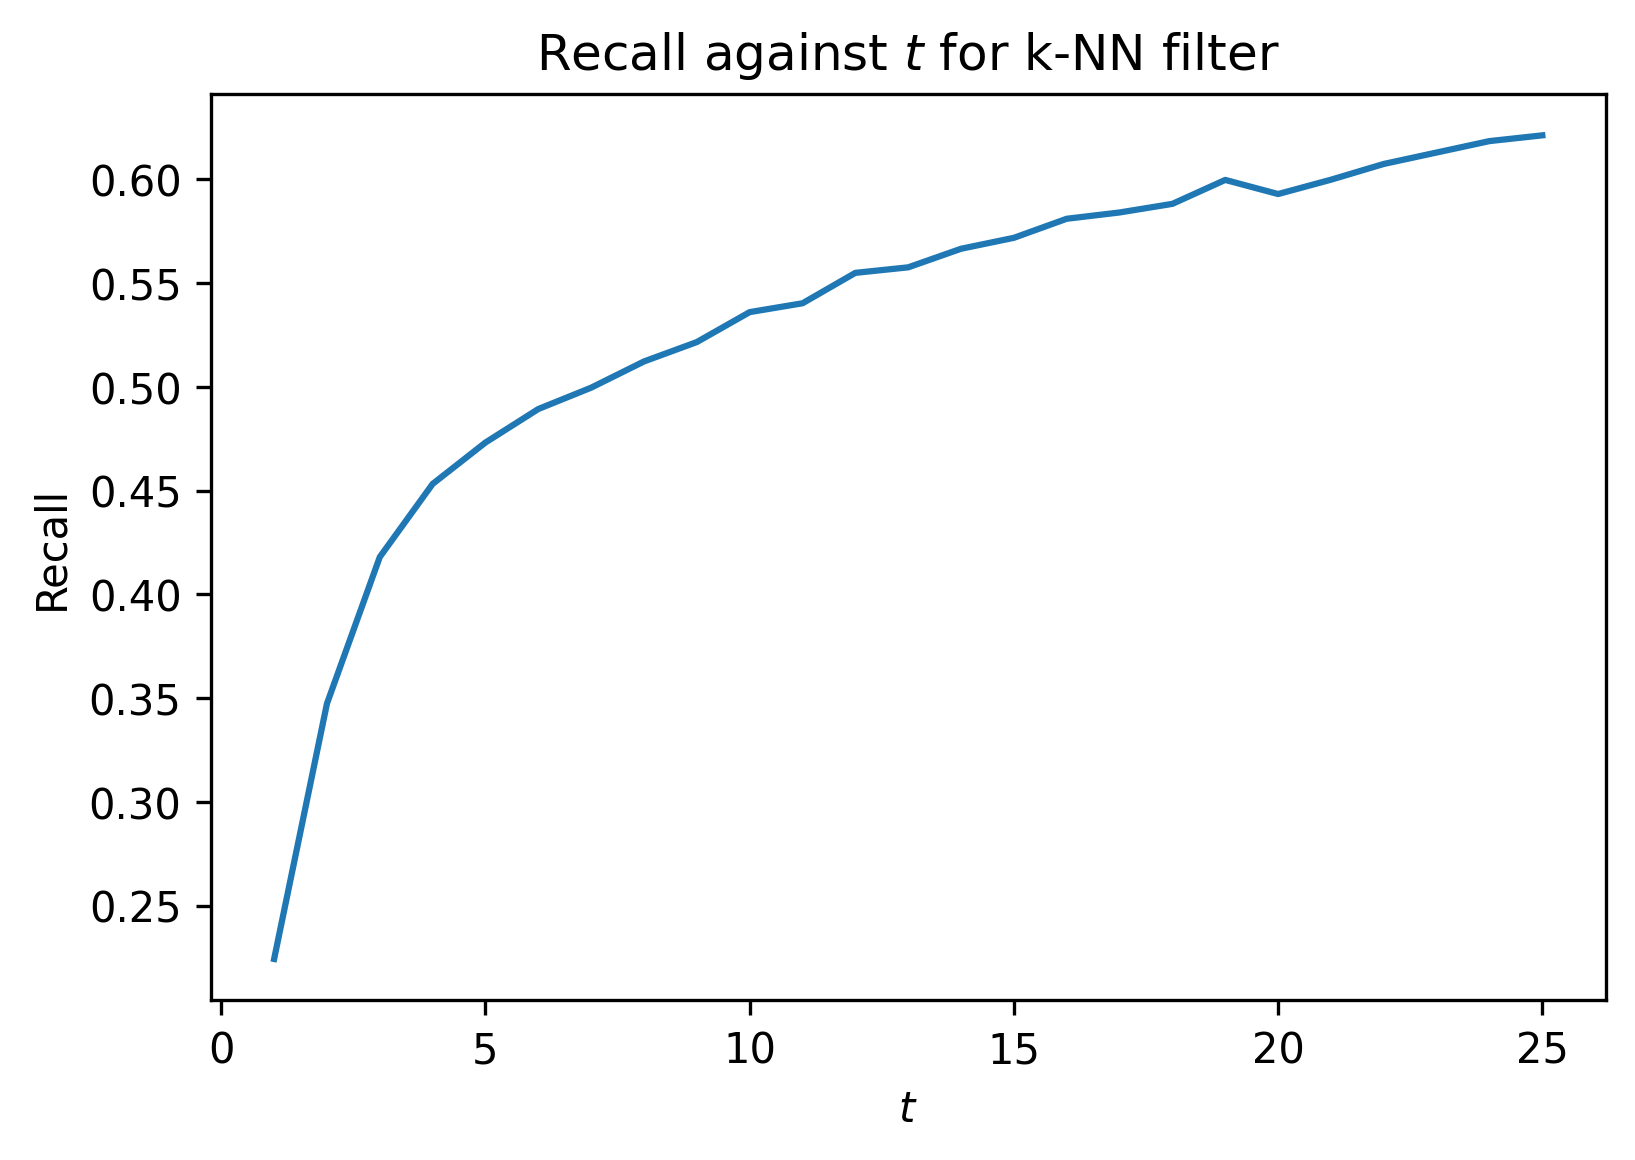

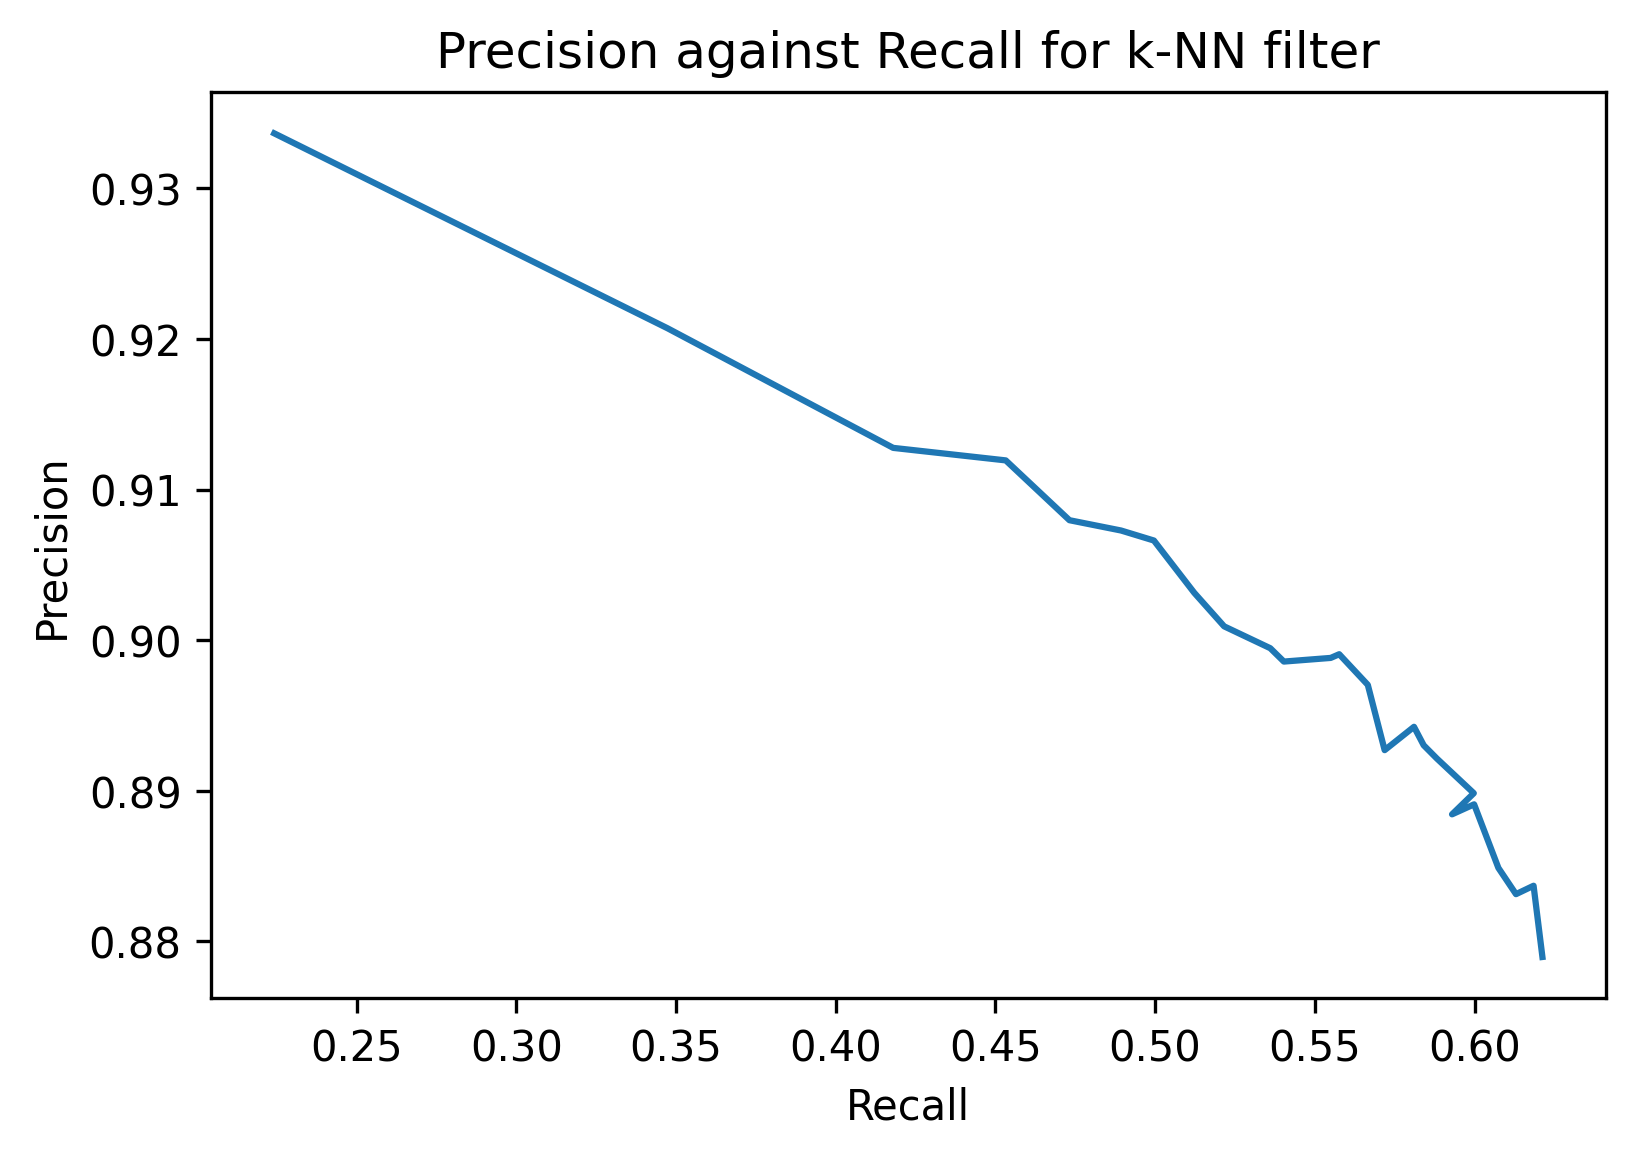

In [ ]:
##Precision and Recall Curves for KNN
plot_curve(np.arange(1,26), precision_KNN, '$t$', 'Precision', 'Precision against $t$ for k-NN filter')
plot_curve(np.arange(1,26), recall_KNN, '$t$', 'Recall', 'Recall against $t$ for k-NN filter')
plot_curve(recall_KNN, precision_KNN, 'Recall', 'Precision', 'Precision against Recall for k-NN filter')

### Question 37

In [ ]:
#Precision and Recall for NMF

from surprise import NMF
NMF_model = NMF(n_factors=18)
precision_NMF, recall_NMF = calc_model_precision_recall(NMF_model, ratings_dataset)

t= 1  is done.
t= 2  is done.
t= 3  is done.
t= 4  is done.
t= 5  is done.
t= 6  is done.
t= 7  is done.
t= 8  is done.
t= 9  is done.
t= 10  is done.
t= 11  is done.
t= 12  is done.
t= 13  is done.
t= 14  is done.
t= 15  is done.
t= 16  is done.
t= 17  is done.
t= 18  is done.
t= 19  is done.
t= 20  is done.
t= 21  is done.
t= 22  is done.
t= 23  is done.
t= 24  is done.
t= 25  is done.


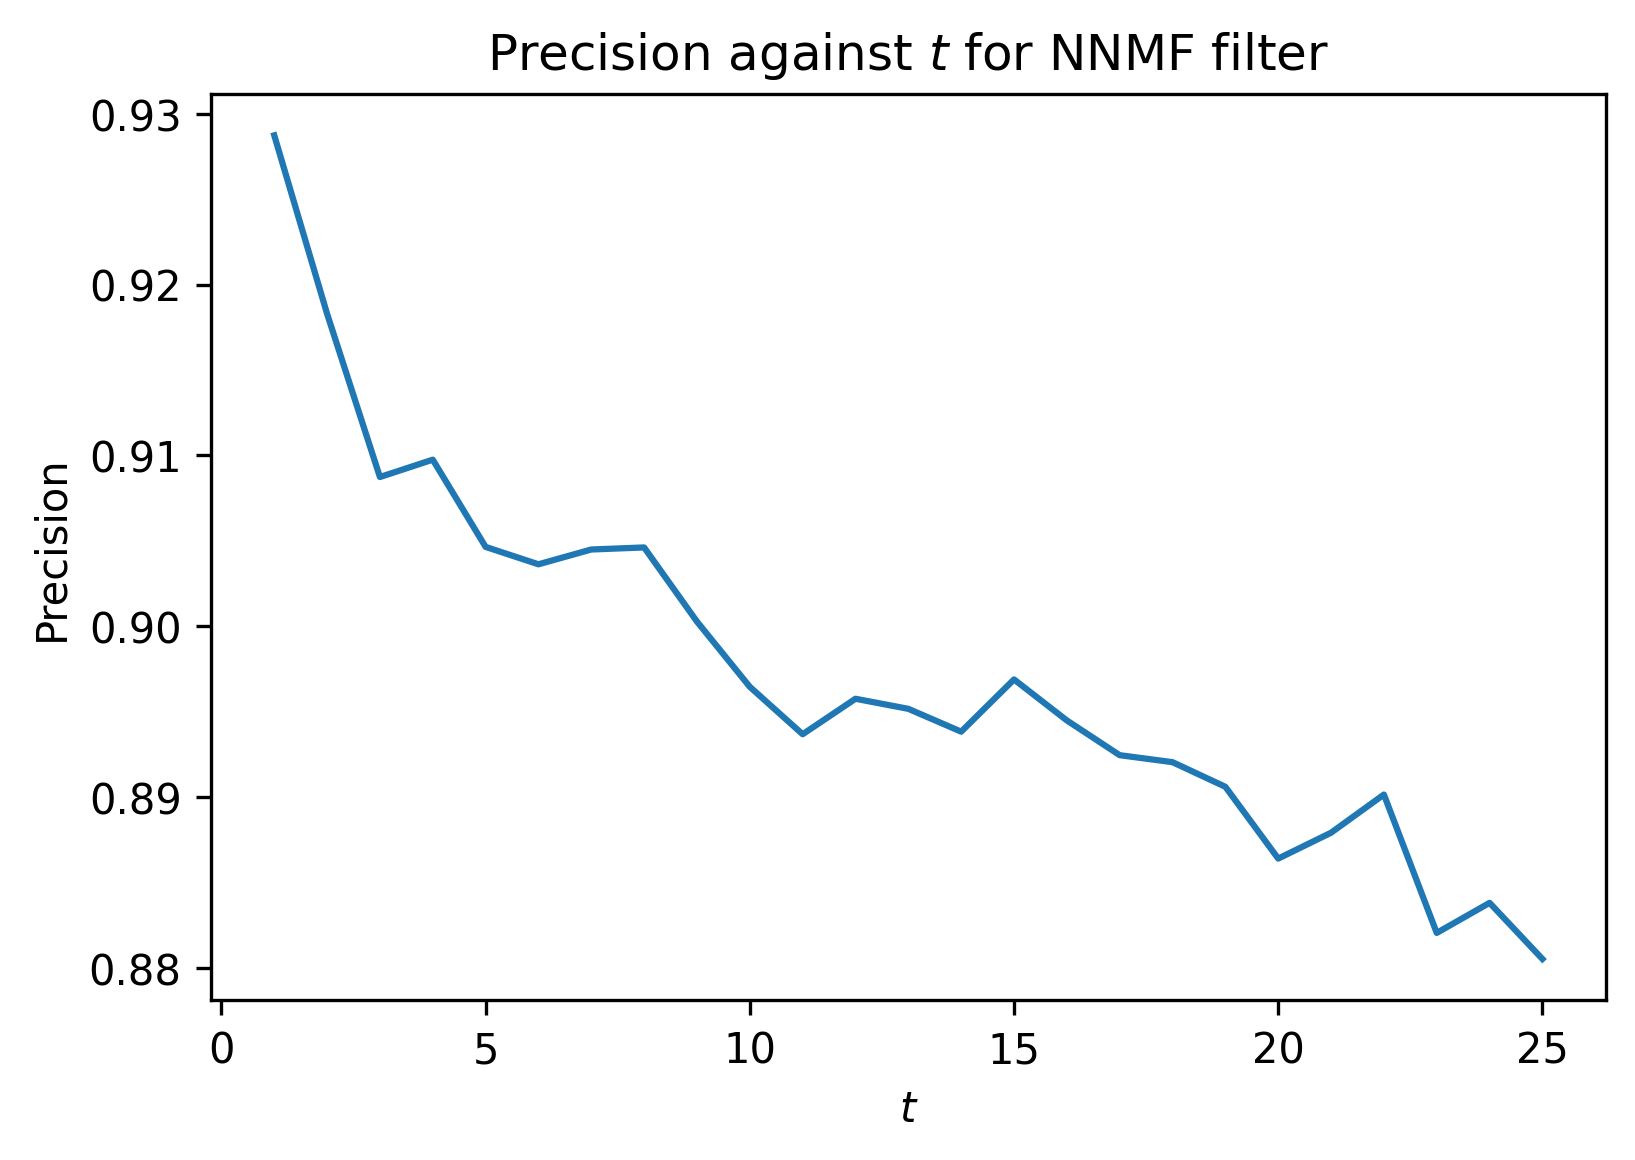

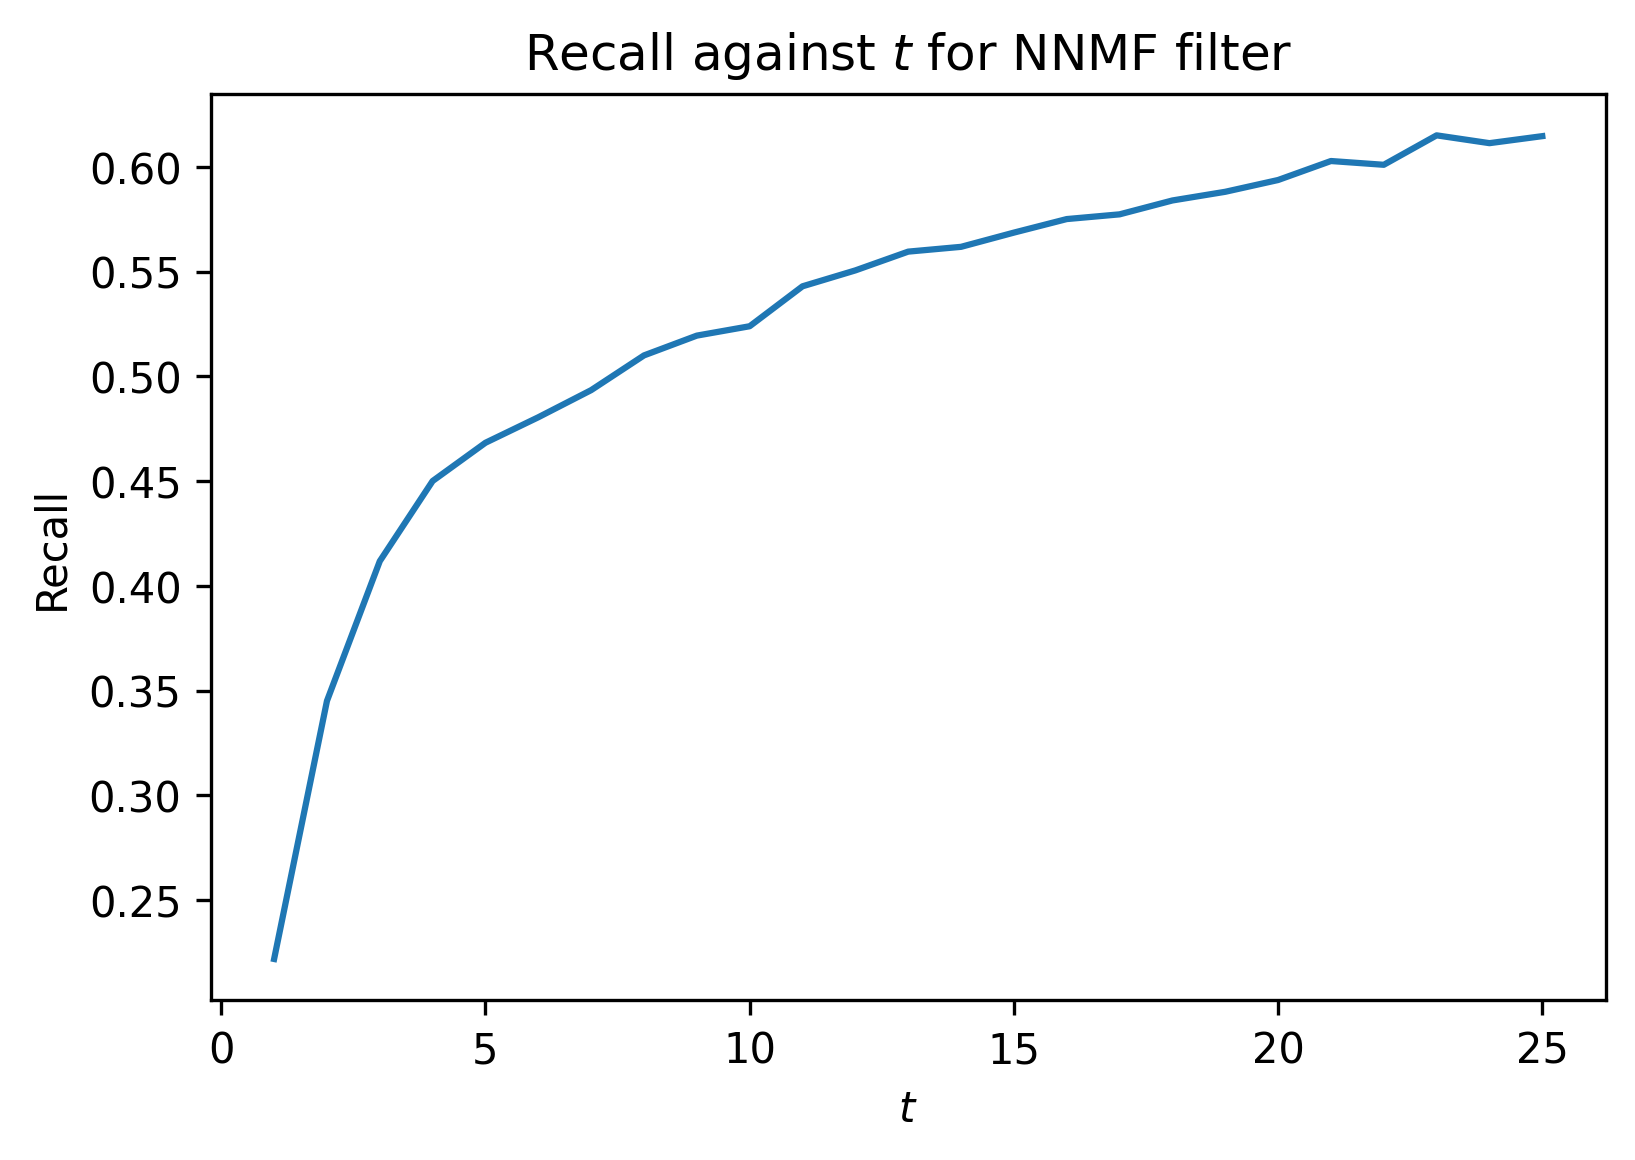

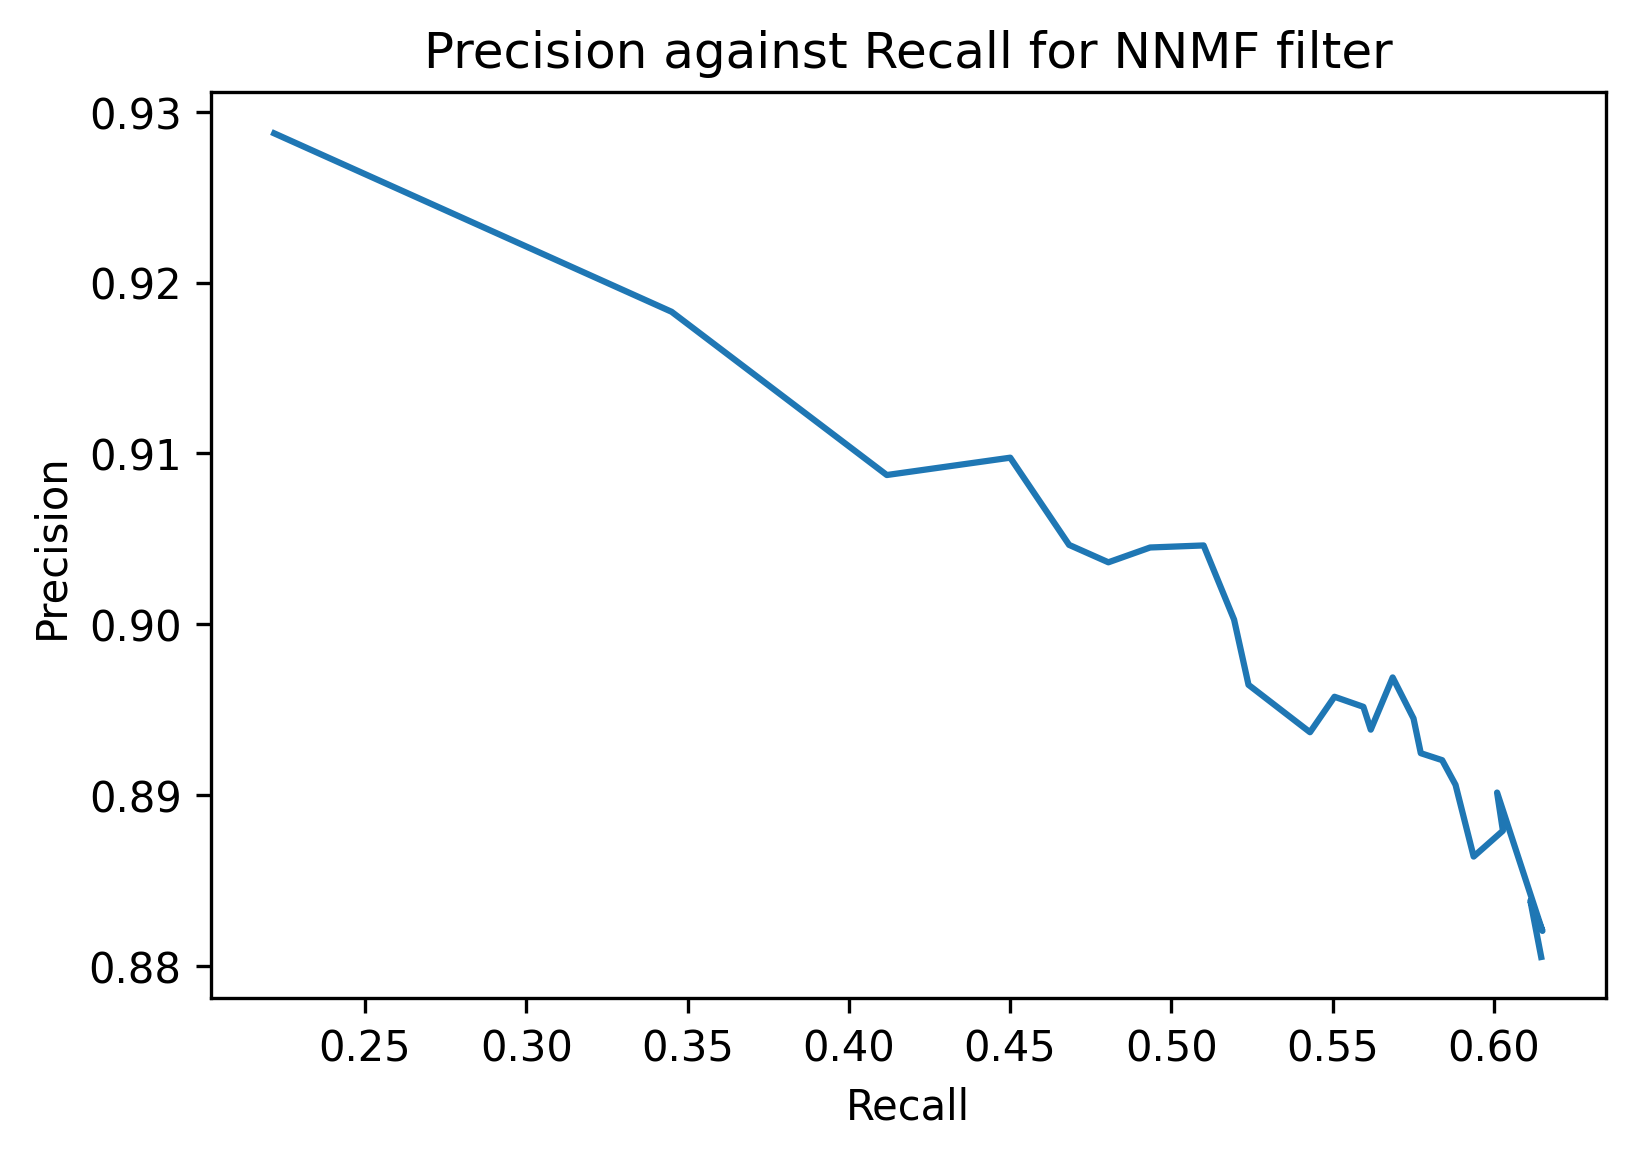

In [ ]:
#Precision and Recall Curves for NMF

plot_curve(np.arange(1,26), precision_NMF, '$t$', 'Precision', 'Precision against $t$ for NNMF filter')
plot_curve(np.arange(1,26), recall_NMF, '$t$', 'Recall', 'Recall against $t$ for NNMF filter')
plot_curve(recall_NMF, precision_NMF, 'Recall', 'Precision', 'Precision against Recall for NNMF filter')

### Question 38

In [21]:
#Precision and Recall for MF with SVD
from surprise import SVD
SVD_model = SVD(32)
precision_SVD, recall_SVD = calc_model_precision_recall(SVD_model, ratings_dataset)

t= 1  is done.
t= 2  is done.
t= 3  is done.
t= 4  is done.
t= 5  is done.
t= 6  is done.
t= 7  is done.
t= 8  is done.
t= 9  is done.
t= 10  is done.
t= 11  is done.
t= 12  is done.
t= 13  is done.
t= 14  is done.
t= 15  is done.
t= 16  is done.
t= 17  is done.
t= 18  is done.
t= 19  is done.
t= 20  is done.
t= 21  is done.
t= 22  is done.
t= 23  is done.
t= 24  is done.
t= 25  is done.


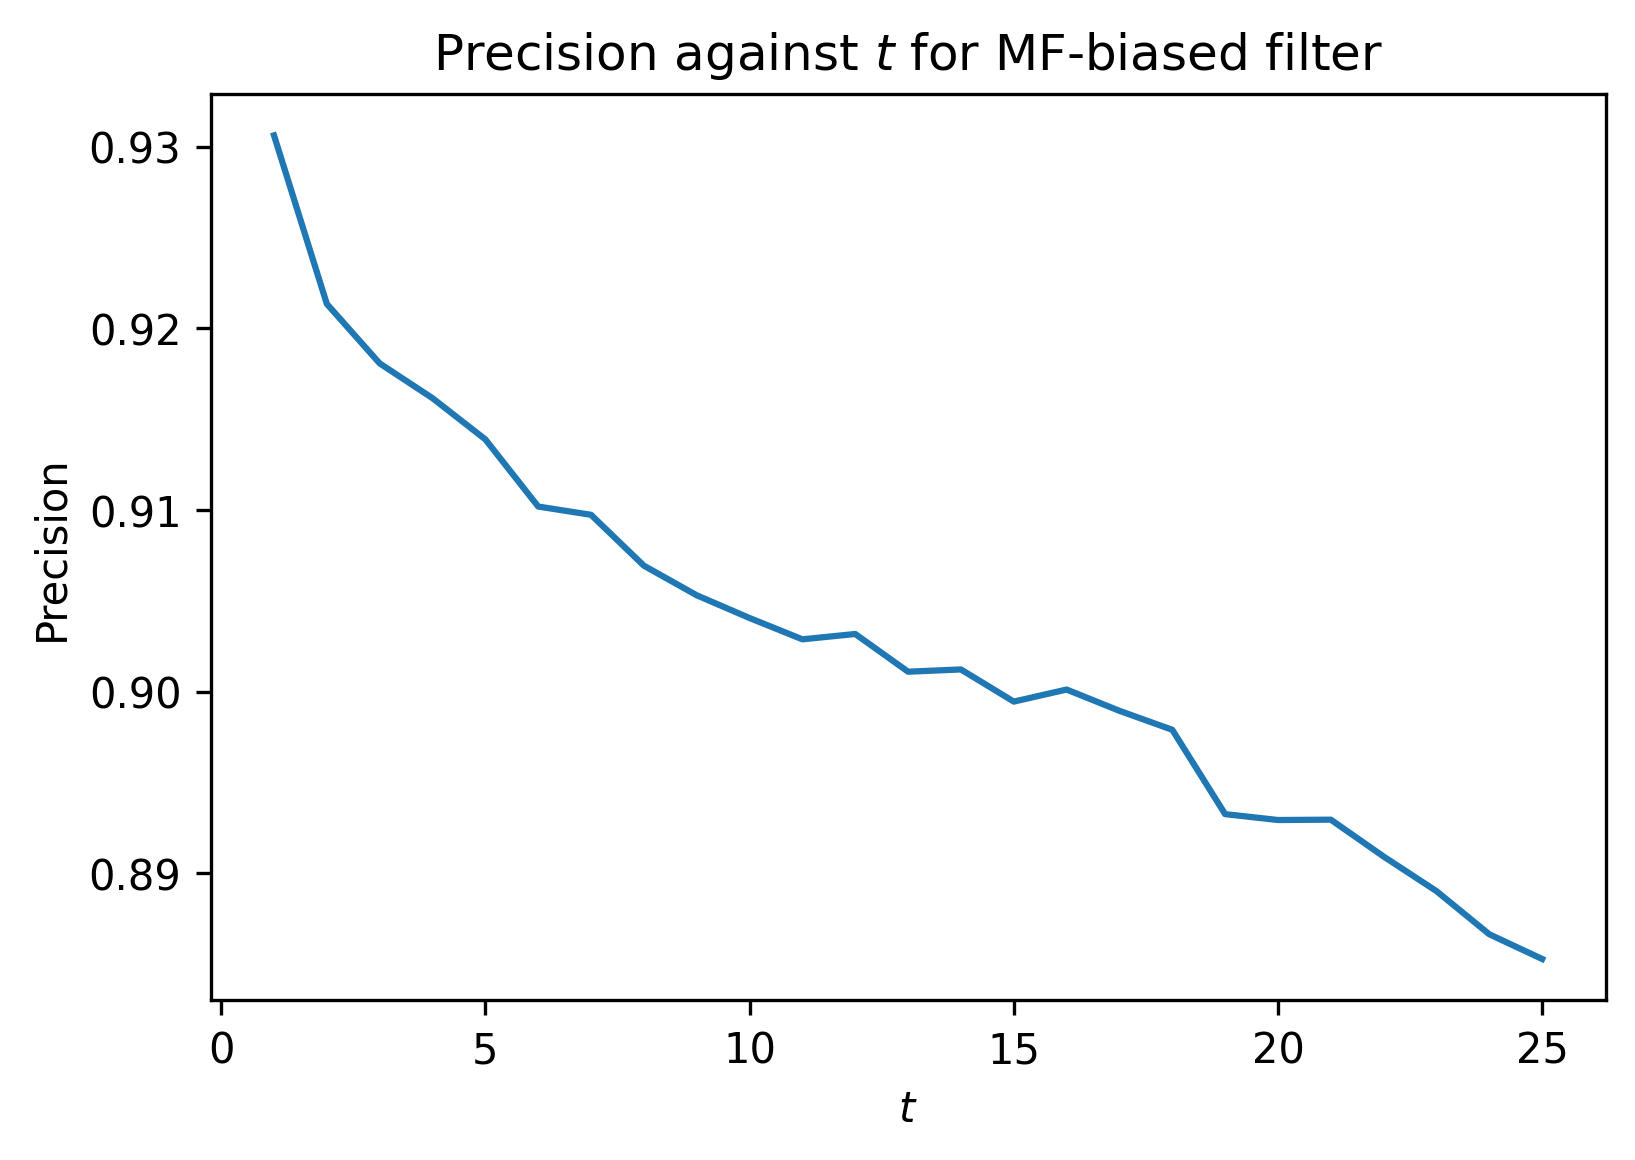

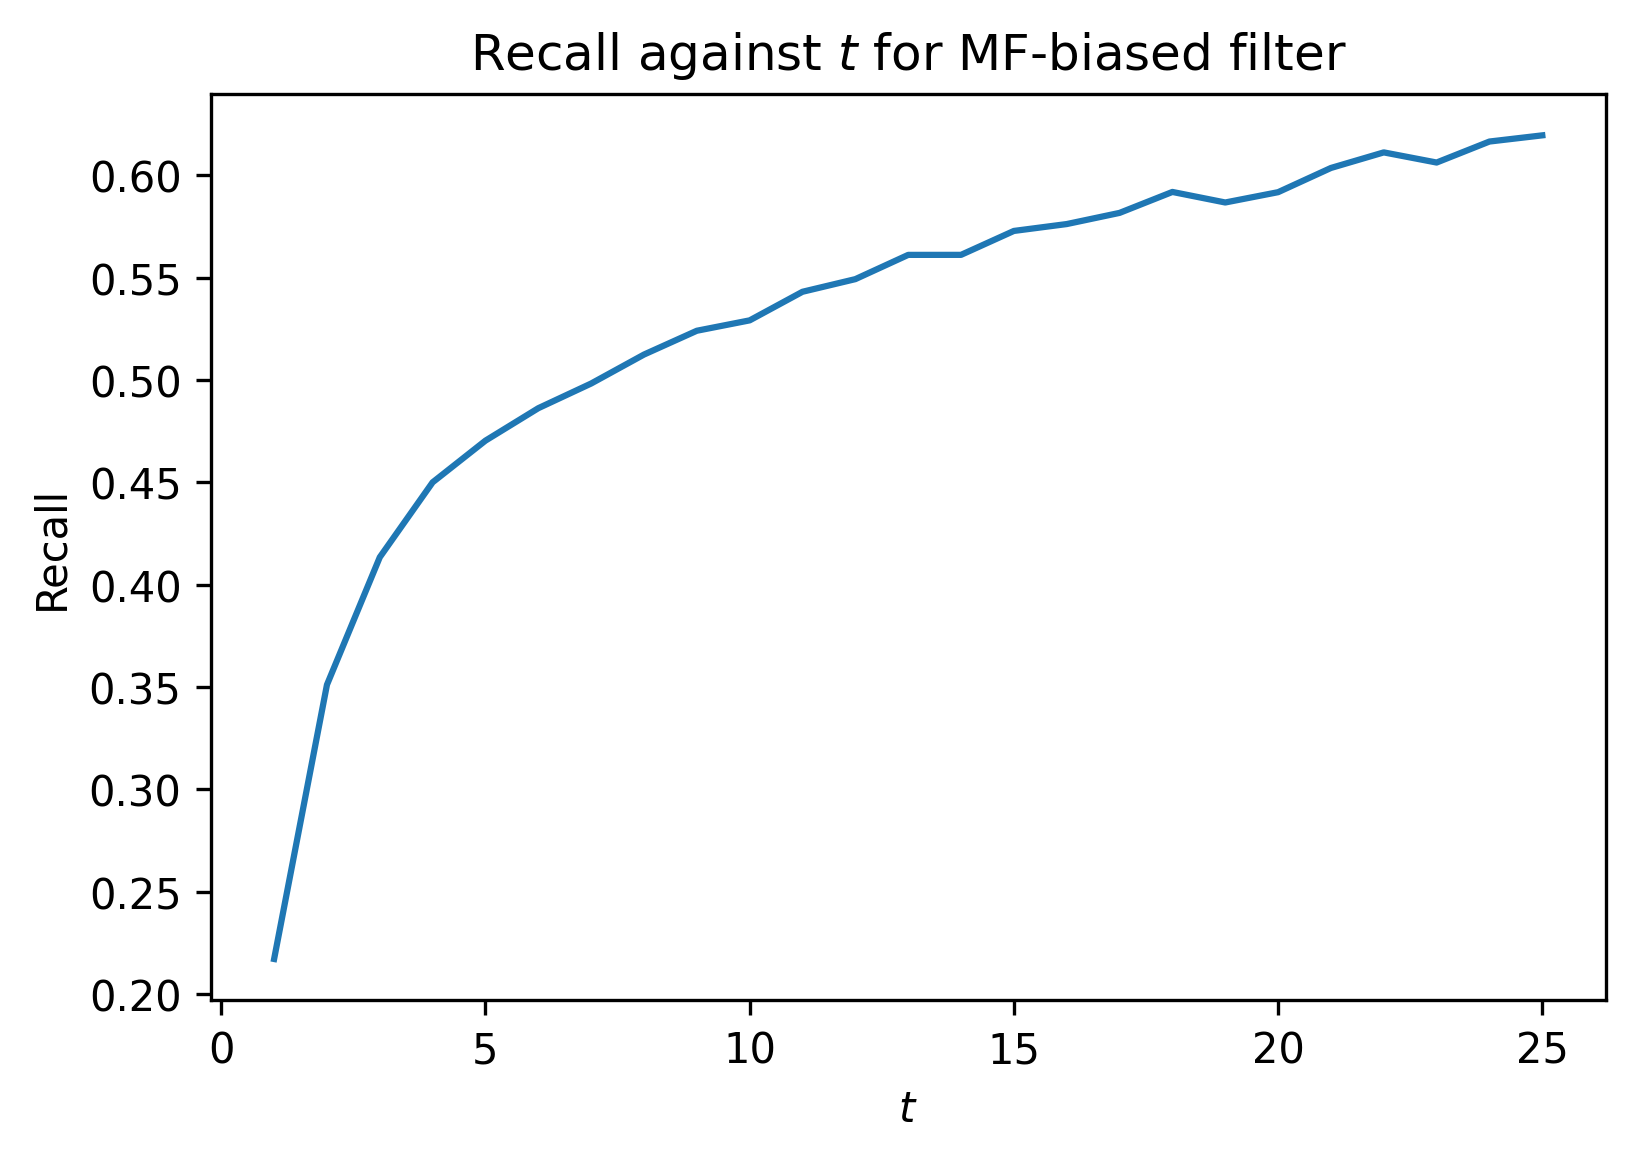

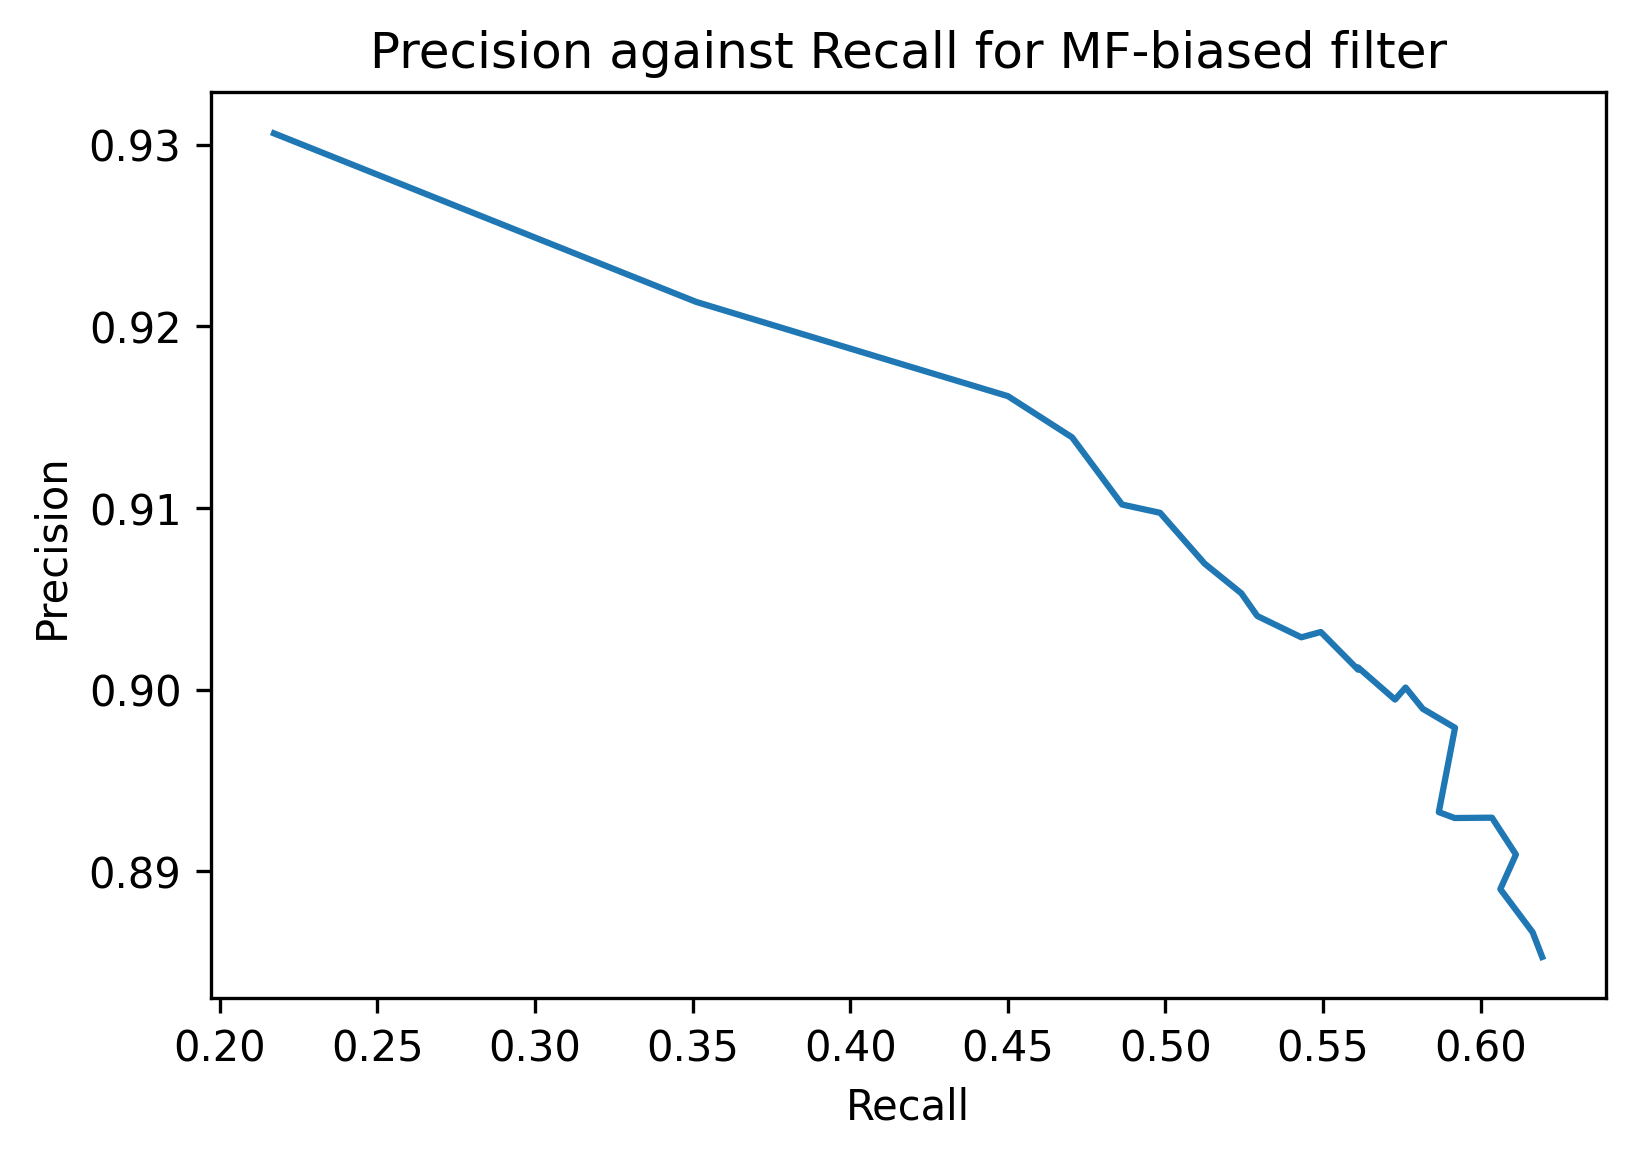

In [24]:
#Precision and Recall Curves for MF with SVD
plot_curve(np.arange(1,26), precision_SVD, '$t$', 'Precision', 'Precision against $t$ for MF-biased filter')
plot_curve(np.arange(1,26), recall_SVD, '$t$', 'Recall', 'Recall against $t$ for MF-biased filter')
plot_curve(recall_SVD, precision_SVD, 'Recall', 'Precision', 'Precision against Recall for MF-biased filter')

### Question 39

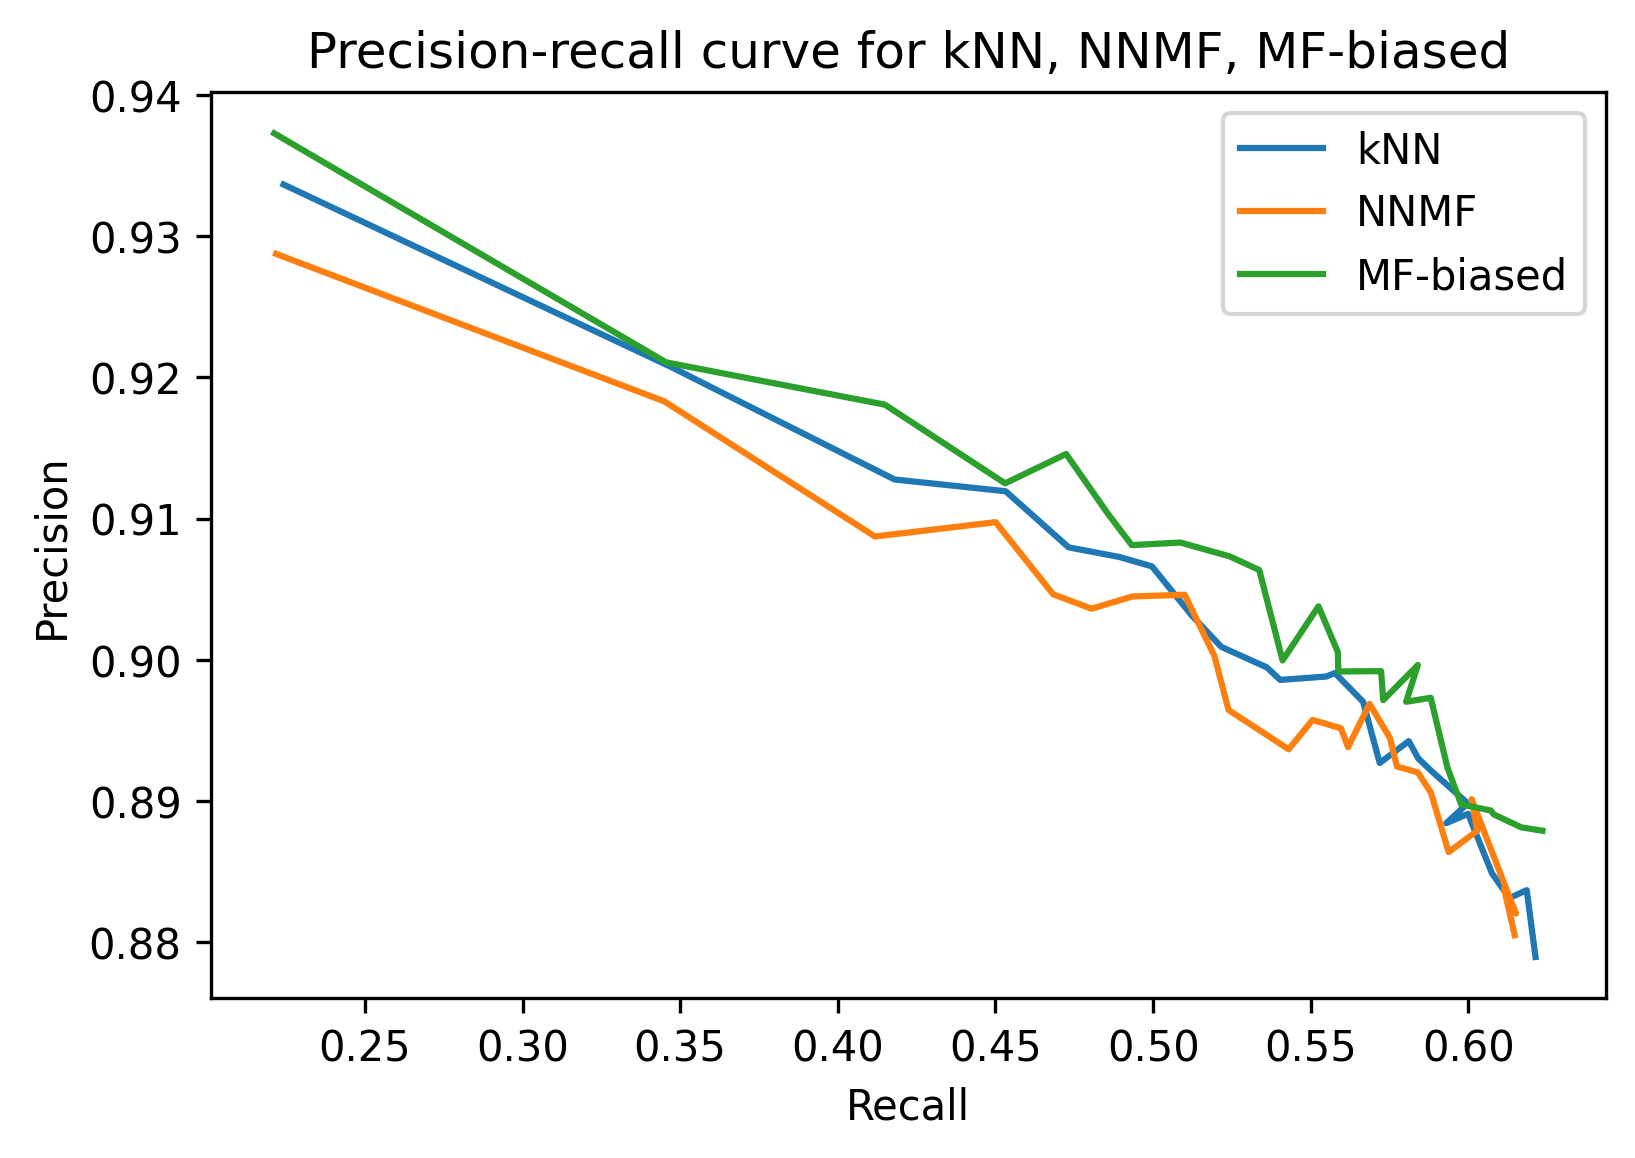

In [ ]:
#Precision and Recall Curves for SVD, NNMF and MF with SVD
plt.figure(dpi=300)
plt.plot(recall_KNN, precision_KNN, label='kNN')
plt.plot(recall_NMF, precision_NMF, label='NNMF')
plt.plot(recall_SVD, precision_SVD, label='MF-biased')
plt.legend()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve for kNN, NNMF, MF-biased')
plt.show()